# 03 Vanilla Policy Gradient with rewards to go as weights

#### 👉🏽 The policy network will have the following architecture:

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_lunar_lander/images/policy_network.svg?raw=True" width="300"/>

#### 👉🏽 And we will use the rewards-to-go to compute the weights in the policy gradient formula.

In [11]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🚀🌙

In [12]:
ENV_NAME = 'LunarLander-v2'

## Create agent and set hyperparameters

In [13]:
from src.vpg_agent import VPGAgent

agent = VPGAgent(
    env_name=ENV_NAME,
    learning_rate=3e-3,
    hidden_layers=[64],
    gradient_weights='rewards-to-go',
)

Policy network with 836 parameters
Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=4, bias=True)
)


## Tensorboard logger to see training metrics

In [14]:
from src.utils import get_agent_id
agent_id = get_agent_id(ENV_NAME)
print(f'agent_id = {agent_id}')

# tensorboard logger to see training curves
from src.utils import get_logger, get_model_path
logger = get_logger(env_name=ENV_NAME, agent_id=agent_id)

# path to save policy network weights and hyperparameters
model_path = get_model_path(env_name=ENV_NAME, agent_id=agent_id)

agent_id = 23


## Training 🏋️

In [15]:
agent.train(
    n_policy_updates=5000,
    batch_size=256,
    logger=logger,
    model_path=model_path,
)

epoch:   0 	 loss: -219.557 	 reward: -210.354
epoch:   1 	 loss: -198.102 	 reward: -178.642
epoch:   2 	 loss: -176.342 	 reward: -160.211
epoch:   3 	 loss: -165.565 	 reward: -153.454
epoch:   4 	 loss: -229.541 	 reward: -210.441
epoch:   5 	 loss: -182.263 	 reward: -162.529
epoch:   6 	 loss: -197.870 	 reward: -181.052
epoch:   7 	 loss: -223.961 	 reward: -211.405
epoch:   8 	 loss: -176.830 	 reward: -159.285
epoch:   9 	 loss: -220.593 	 reward: -194.883


100%|████████████████████████| 100/100 [00:03<00:00, 31.47it/s]


Best model! Average reward = -156.61, Success rate = 0.00%
epoch:  10 	 loss: -163.496 	 reward: -136.943
epoch:  11 	 loss: -136.275 	 reward: -125.193
epoch:  12 	 loss: -178.673 	 reward: -163.996
epoch:  13 	 loss: -156.057 	 reward: -133.095
epoch:  14 	 loss: -187.334 	 reward: -166.165
epoch:  15 	 loss: -166.904 	 reward: -153.786
epoch:  16 	 loss: -171.442 	 reward: -147.795
epoch:  17 	 loss: -164.764 	 reward: -154.427
epoch:  18 	 loss: -163.790 	 reward: -144.550
epoch:  19 	 loss: -188.326 	 reward: -171.990


100%|████████████████████████| 100/100 [00:03<00:00, 31.17it/s]


epoch:  20 	 loss: -187.428 	 reward: -165.605
epoch:  21 	 loss: -176.768 	 reward: -160.501
epoch:  22 	 loss: -152.036 	 reward: -128.415
epoch:  23 	 loss: -147.510 	 reward: -128.238
epoch:  24 	 loss: -196.918 	 reward: -170.067
epoch:  25 	 loss: -149.487 	 reward: -141.187
epoch:  26 	 loss: -176.416 	 reward: -150.956
epoch:  27 	 loss: -166.370 	 reward: -148.962
epoch:  28 	 loss: -143.317 	 reward: -116.716
epoch:  29 	 loss: -171.784 	 reward: -148.677


100%|████████████████████████| 100/100 [00:03<00:00, 28.26it/s]


Best model! Average reward = -136.70, Success rate = 0.00%
epoch:  30 	 loss: -190.818 	 reward: -161.031
epoch:  31 	 loss: -166.440 	 reward: -154.863
epoch:  32 	 loss: -184.824 	 reward: -146.858
epoch:  33 	 loss: -150.537 	 reward: -139.159
epoch:  34 	 loss: -167.144 	 reward: -131.680
epoch:  35 	 loss: -169.192 	 reward: -147.883
epoch:  36 	 loss: -192.295 	 reward: -179.450
epoch:  37 	 loss: -187.964 	 reward: -164.123
epoch:  38 	 loss: -179.720 	 reward: -149.952
epoch:  39 	 loss: -69.607 	 reward: -110.525


100%|████████████████████████| 100/100 [00:03<00:00, 29.32it/s]


epoch:  40 	 loss: -171.644 	 reward: -138.530
epoch:  41 	 loss: -142.865 	 reward: -118.218
epoch:  42 	 loss: -149.591 	 reward: -132.745
epoch:  43 	 loss: -128.302 	 reward: -108.745
epoch:  44 	 loss: -186.743 	 reward: -162.469
epoch:  45 	 loss: -142.649 	 reward: -125.990
epoch:  46 	 loss: -116.474 	 reward: -102.643
epoch:  47 	 loss: -141.348 	 reward: -126.178
epoch:  48 	 loss: -149.578 	 reward: -125.679
epoch:  49 	 loss: -178.115 	 reward: -148.610


100%|████████████████████████| 100/100 [00:03<00:00, 32.03it/s]


epoch:  50 	 loss: -156.960 	 reward: -132.879
epoch:  51 	 loss: -184.666 	 reward: -157.439
epoch:  52 	 loss: -168.074 	 reward: -145.044
epoch:  53 	 loss: -150.242 	 reward: -135.804
epoch:  54 	 loss: -155.842 	 reward: -135.469
epoch:  55 	 loss: -139.772 	 reward: -120.471
epoch:  56 	 loss: -134.192 	 reward: -111.368
epoch:  57 	 loss: -152.492 	 reward: -138.562
epoch:  58 	 loss: -139.870 	 reward: -122.757
epoch:  59 	 loss: -127.655 	 reward: -110.529


100%|████████████████████████| 100/100 [00:03<00:00, 30.99it/s]


Best model! Average reward = -119.17, Success rate = 0.00%
epoch:  60 	 loss: -134.873 	 reward: -119.553
epoch:  61 	 loss: -150.093 	 reward: -132.687
epoch:  62 	 loss: -160.913 	 reward: -134.385
epoch:  63 	 loss: -137.451 	 reward: -122.856
epoch:  64 	 loss: -140.499 	 reward: -121.146
epoch:  65 	 loss: -165.276 	 reward: -136.004
epoch:  66 	 loss: -143.463 	 reward: -119.217
epoch:  67 	 loss: -139.739 	 reward: -121.398
epoch:  68 	 loss: -134.697 	 reward: -111.977
epoch:  69 	 loss: -164.112 	 reward: -144.815


100%|████████████████████████| 100/100 [00:03<00:00, 33.00it/s]


epoch:  70 	 loss: -117.935 	 reward: -109.225
epoch:  71 	 loss: -126.283 	 reward: -109.009
epoch:  72 	 loss: -133.018 	 reward: -112.331
epoch:  73 	 loss: -125.244 	 reward: -114.278
epoch:  74 	 loss: -137.788 	 reward: -116.136
epoch:  75 	 loss: -153.858 	 reward: -127.871
epoch:  76 	 loss: -136.969 	 reward: -126.438
epoch:  77 	 loss: -135.320 	 reward: -120.993
epoch:  78 	 loss: -142.210 	 reward: -126.824
epoch:  79 	 loss: -119.013 	 reward: -110.635


100%|████████████████████████| 100/100 [00:02<00:00, 33.34it/s]


Best model! Average reward = -116.39, Success rate = 0.00%
epoch:  80 	 loss: -123.181 	 reward: -116.297
epoch:  81 	 loss: -139.398 	 reward: -119.570
epoch:  82 	 loss: -133.832 	 reward: -111.223
epoch:  83 	 loss: -124.224 	 reward: -103.455
epoch:  84 	 loss: -130.580 	 reward: -117.157
epoch:  85 	 loss: -131.770 	 reward: -114.511
epoch:  86 	 loss: -119.795 	 reward: -103.106
epoch:  87 	 loss: -149.123 	 reward: -125.657
epoch:  88 	 loss: -143.734 	 reward: -128.275
epoch:  89 	 loss: -138.628 	 reward: -123.674


100%|████████████████████████| 100/100 [00:03<00:00, 31.84it/s]


Best model! Average reward = -113.02, Success rate = 0.00%
epoch:  90 	 loss: -114.478 	 reward: -101.750
epoch:  91 	 loss: -124.309 	 reward: -110.738
epoch:  92 	 loss: -137.103 	 reward: -114.593
epoch:  93 	 loss: -120.997 	 reward: -107.041
epoch:  94 	 loss: -122.621 	 reward: -107.560
epoch:  95 	 loss: -158.480 	 reward: -138.908
epoch:  96 	 loss: -125.532 	 reward: -107.148
epoch:  97 	 loss: -144.413 	 reward: -119.509
epoch:  98 	 loss: -131.348 	 reward: -110.117
epoch:  99 	 loss: -141.334 	 reward: -117.303


100%|████████████████████████| 100/100 [00:03<00:00, 32.63it/s]


Best model! Average reward = -110.67, Success rate = 0.00%
epoch: 100 	 loss: -109.116 	 reward: -91.959
epoch: 101 	 loss: -113.062 	 reward: -95.356
epoch: 102 	 loss: -118.466 	 reward: -106.104
epoch: 103 	 loss: -124.029 	 reward: -106.027
epoch: 104 	 loss: -127.184 	 reward: -107.966
epoch: 105 	 loss: -118.652 	 reward: -99.388
epoch: 106 	 loss: -115.893 	 reward: -101.239
epoch: 107 	 loss: -106.692 	 reward: -96.675
epoch: 108 	 loss: -126.215 	 reward: -113.253
epoch: 109 	 loss: -135.307 	 reward: -125.736


100%|████████████████████████| 100/100 [00:02<00:00, 33.95it/s]


epoch: 110 	 loss: -127.300 	 reward: -115.988
epoch: 111 	 loss: -128.772 	 reward: -112.439
epoch: 112 	 loss: -121.824 	 reward: -111.147
epoch: 113 	 loss: -143.642 	 reward: -127.134
epoch: 114 	 loss: -135.784 	 reward: -126.008
epoch: 115 	 loss: -125.461 	 reward: -108.621
epoch: 116 	 loss: -117.597 	 reward: -104.257
epoch: 117 	 loss: -121.028 	 reward: -107.794
epoch: 118 	 loss: -141.988 	 reward: -125.661
epoch: 119 	 loss: -135.509 	 reward: -112.724


100%|████████████████████████| 100/100 [00:02<00:00, 33.47it/s]


Best model! Average reward = -105.65, Success rate = 0.00%
epoch: 120 	 loss: -120.141 	 reward: -103.282
epoch: 121 	 loss: -107.372 	 reward: -92.941
epoch: 122 	 loss: -139.265 	 reward: -117.615
epoch: 123 	 loss: -119.078 	 reward: -100.287
epoch: 124 	 loss: -122.917 	 reward: -106.950
epoch: 125 	 loss: -117.221 	 reward: -101.914
epoch: 126 	 loss: -133.541 	 reward: -111.379
epoch: 127 	 loss: -115.641 	 reward: -98.883
epoch: 128 	 loss: -127.975 	 reward: -110.978
epoch: 129 	 loss: -116.198 	 reward: -99.210


100%|████████████████████████| 100/100 [00:03<00:00, 32.46it/s]


epoch: 130 	 loss: -131.473 	 reward: -112.659
epoch: 131 	 loss: -109.927 	 reward: -100.413
epoch: 132 	 loss: -110.367 	 reward: -99.602
epoch: 133 	 loss: -112.060 	 reward: -96.053
epoch: 134 	 loss: -121.636 	 reward: -102.617
epoch: 135 	 loss: -129.475 	 reward: -110.322
epoch: 136 	 loss: -114.535 	 reward: -95.676
epoch: 137 	 loss: -129.447 	 reward: -110.180
epoch: 138 	 loss: -111.420 	 reward: -95.516
epoch: 139 	 loss: -113.617 	 reward: -101.709


100%|████████████████████████| 100/100 [00:03<00:00, 32.69it/s]


Best model! Average reward = -101.84, Success rate = 0.00%
epoch: 140 	 loss: -104.342 	 reward: -94.153
epoch: 141 	 loss: -122.950 	 reward: -102.663
epoch: 142 	 loss: -128.600 	 reward: -117.097
epoch: 143 	 loss: -124.936 	 reward: -104.135
epoch: 144 	 loss: -112.981 	 reward: -95.399
epoch: 145 	 loss: -108.327 	 reward: -95.502
epoch: 146 	 loss: -116.164 	 reward: -95.406
epoch: 147 	 loss: -111.353 	 reward: -100.008
epoch: 148 	 loss: -109.661 	 reward: -99.321
epoch: 149 	 loss: -103.843 	 reward: -95.859


100%|████████████████████████| 100/100 [00:03<00:00, 33.09it/s]


Best model! Average reward = -94.63, Success rate = 0.00%
epoch: 150 	 loss: -112.251 	 reward: -97.808
epoch: 151 	 loss: -112.029 	 reward: -99.993
epoch: 152 	 loss: -112.818 	 reward: -101.096
epoch: 153 	 loss: -111.838 	 reward: -95.039
epoch: 154 	 loss: -110.159 	 reward: -91.432
epoch: 155 	 loss: -120.005 	 reward: -104.882
epoch: 156 	 loss: -98.426 	 reward: -82.852
epoch: 157 	 loss: -110.559 	 reward: -94.534
epoch: 158 	 loss: -120.966 	 reward: -104.311
epoch: 159 	 loss: -116.819 	 reward: -103.293


100%|████████████████████████| 100/100 [00:03<00:00, 32.17it/s]


epoch: 160 	 loss: -112.346 	 reward: -103.080
epoch: 161 	 loss: -111.904 	 reward: -98.929
epoch: 162 	 loss: -121.404 	 reward: -110.007
epoch: 163 	 loss: -95.215 	 reward: -92.467
epoch: 164 	 loss: -84.752 	 reward: -77.402
epoch: 165 	 loss: -123.662 	 reward: -108.350
epoch: 166 	 loss: -109.098 	 reward: -97.660
epoch: 167 	 loss: -113.831 	 reward: -104.847
epoch: 168 	 loss: -114.813 	 reward: -97.101
epoch: 169 	 loss: -104.466 	 reward: -94.123


100%|████████████████████████| 100/100 [00:03<00:00, 31.07it/s]


epoch: 170 	 loss: -97.607 	 reward: -82.836
epoch: 171 	 loss: -110.481 	 reward: -96.796
epoch: 172 	 loss: -102.742 	 reward: -95.272
epoch: 173 	 loss: -118.020 	 reward: -101.497
epoch: 174 	 loss: -121.320 	 reward: -99.461
epoch: 175 	 loss: -111.885 	 reward: -97.606
epoch: 176 	 loss: -105.047 	 reward: -90.008
epoch: 177 	 loss: -117.315 	 reward: -100.264
epoch: 178 	 loss: -114.216 	 reward: -93.035
epoch: 179 	 loss: -111.155 	 reward: -100.207


100%|████████████████████████| 100/100 [00:03<00:00, 31.11it/s]


Best model! Average reward = -86.05, Success rate = 0.00%
epoch: 180 	 loss: -106.024 	 reward: -92.306
epoch: 181 	 loss: -90.994 	 reward: -78.679
epoch: 182 	 loss: -120.105 	 reward: -97.359
epoch: 183 	 loss: -98.048 	 reward: -87.635
epoch: 184 	 loss: -97.698 	 reward: -84.041
epoch: 185 	 loss: -99.326 	 reward: -85.241
epoch: 186 	 loss: -105.049 	 reward: -87.273
epoch: 187 	 loss: -95.352 	 reward: -79.222
epoch: 188 	 loss: -99.838 	 reward: -83.713
epoch: 189 	 loss: -98.737 	 reward: -86.793


100%|████████████████████████| 100/100 [00:03<00:00, 28.37it/s]


epoch: 190 	 loss: -99.840 	 reward: -85.623
epoch: 191 	 loss: -99.706 	 reward: -82.780
epoch: 192 	 loss: -104.297 	 reward: -89.094
epoch: 193 	 loss: -109.616 	 reward: -95.207
epoch: 194 	 loss: -65.817 	 reward: -75.079
epoch: 195 	 loss: -86.985 	 reward: -75.157
epoch: 196 	 loss: -90.602 	 reward: -73.554
epoch: 197 	 loss: -94.297 	 reward: -75.116
epoch: 198 	 loss: -108.912 	 reward: -88.727
epoch: 199 	 loss: -96.815 	 reward: -83.476


100%|████████████████████████| 100/100 [00:03<00:00, 29.32it/s]


Best model! Average reward = -78.10, Success rate = 0.00%
epoch: 200 	 loss: -78.567 	 reward: -64.935
epoch: 201 	 loss: -97.411 	 reward: -85.050
epoch: 202 	 loss: -98.645 	 reward: -80.667
epoch: 203 	 loss: -86.026 	 reward: -76.704
epoch: 204 	 loss: -99.303 	 reward: -82.654
epoch: 205 	 loss: -91.553 	 reward: -74.015
epoch: 206 	 loss: -87.875 	 reward: -74.973
epoch: 207 	 loss: -99.770 	 reward: -80.607
epoch: 208 	 loss: -93.663 	 reward: -76.688
epoch: 209 	 loss: -86.178 	 reward: -73.597


100%|████████████████████████| 100/100 [00:03<00:00, 25.75it/s]


Best model! Average reward = -63.62, Success rate = 0.00%
epoch: 210 	 loss: -79.322 	 reward: -66.691
epoch: 211 	 loss: -96.714 	 reward: -76.354
epoch: 212 	 loss: -86.432 	 reward: -72.146
epoch: 213 	 loss: -42.231 	 reward: -35.476
epoch: 214 	 loss: -98.041 	 reward: -75.296
epoch: 215 	 loss: -83.144 	 reward: -71.708
epoch: 216 	 loss: -86.345 	 reward: -71.080
epoch: 217 	 loss: -93.499 	 reward: -75.140
epoch: 218 	 loss: -76.436 	 reward: -64.371
epoch: 219 	 loss: -82.675 	 reward: -64.264


100%|████████████████████████| 100/100 [00:06<00:00, 16.45it/s]


Best model! Average reward = -53.17, Success rate = 1.00%
epoch: 220 	 loss: -70.221 	 reward: -56.698
epoch: 221 	 loss: -65.809 	 reward: -52.655
epoch: 222 	 loss: -78.812 	 reward: -65.400
epoch: 223 	 loss: -68.370 	 reward: -49.881
epoch: 224 	 loss: -74.199 	 reward: -55.921
epoch: 225 	 loss: -98.237 	 reward: -83.460
epoch: 226 	 loss: -60.625 	 reward: -48.953
epoch: 227 	 loss: -77.113 	 reward: -56.380
epoch: 228 	 loss: -56.763 	 reward: -47.428
epoch: 229 	 loss: -63.521 	 reward: -44.670


100%|████████████████████████| 100/100 [00:07<00:00, 13.87it/s]


Best model! Average reward = -46.79, Success rate = 2.00%
epoch: 230 	 loss: -68.544 	 reward: -56.109
epoch: 231 	 loss: -59.820 	 reward: -51.651
epoch: 232 	 loss: -72.147 	 reward: -53.715
epoch: 233 	 loss: -46.231 	 reward: -32.235
epoch: 234 	 loss: -71.686 	 reward: -55.488
epoch: 235 	 loss: -43.502 	 reward: -24.701
epoch: 236 	 loss: -68.891 	 reward: -45.832
epoch: 237 	 loss: -49.367 	 reward: -30.873
epoch: 238 	 loss: -61.555 	 reward: -41.112
epoch: 239 	 loss: -59.752 	 reward: -41.647


100%|████████████████████████| 100/100 [00:05<00:00, 19.44it/s]


Best model! Average reward = -46.12, Success rate = 0.00%
epoch: 240 	 loss: -48.241 	 reward: -22.796
epoch: 241 	 loss: -68.803 	 reward: -51.785
epoch: 242 	 loss: -50.920 	 reward: -38.855
epoch: 243 	 loss: -70.190 	 reward: -40.535
epoch: 244 	 loss: -54.766 	 reward: -35.570
epoch: 245 	 loss: -52.199 	 reward: -25.752
epoch: 246 	 loss: -76.374 	 reward: -56.105
epoch: 247 	 loss: -67.657 	 reward: -47.787
epoch: 248 	 loss: -62.028 	 reward: -43.697
epoch: 249 	 loss: -58.098 	 reward: -28.316


100%|████████████████████████| 100/100 [00:05<00:00, 17.44it/s]


Best model! Average reward = -30.36, Success rate = 0.00%
epoch: 250 	 loss: -39.463 	 reward: -27.401
epoch: 251 	 loss: -66.128 	 reward: -28.781
epoch: 252 	 loss: -45.368 	 reward: -29.701
epoch: 253 	 loss: -66.783 	 reward: -33.506
epoch: 254 	 loss: -37.094 	 reward: -22.571
epoch: 255 	 loss: -38.091 	 reward: -14.098
epoch: 256 	 loss: -77.023 	 reward: -54.055
epoch: 257 	 loss: -52.857 	 reward: -33.060
epoch: 258 	 loss: -39.483 	 reward: -29.031
epoch: 259 	 loss: -63.498 	 reward: -14.135


100%|████████████████████████| 100/100 [00:21<00:00,  4.55it/s]


epoch: 260 	 loss: -64.397 	 reward: -35.851
epoch: 261 	 loss: -56.149 	 reward: -22.085
epoch: 262 	 loss: -69.457 	 reward: -98.090
epoch: 263 	 loss: -78.586 	 reward: -48.058
epoch: 264 	 loss: -46.170 	 reward: -24.184
epoch: 265 	 loss: -61.476 	 reward: -31.560
epoch: 266 	 loss: -21.459 	 reward: 0.353
epoch: 267 	 loss: -51.209 	 reward: -32.658
epoch: 268 	 loss: -64.365 	 reward: -48.677
epoch: 269 	 loss: -70.350 	 reward: -28.283


100%|████████████████████████| 100/100 [00:30<00:00,  3.25it/s]


Best model! Average reward = -20.05, Success rate = 7.00%
epoch: 270 	 loss: -65.350 	 reward: -52.565
epoch: 271 	 loss: -54.716 	 reward: -16.198
epoch: 272 	 loss: -50.467 	 reward: -9.880
epoch: 273 	 loss: -18.448 	 reward: 24.472
epoch: 274 	 loss: -77.637 	 reward: -41.531
epoch: 275 	 loss: -37.702 	 reward: -18.470
epoch: 276 	 loss: -75.711 	 reward: -53.060
epoch: 277 	 loss: -27.301 	 reward: -2.622
epoch: 278 	 loss: -51.644 	 reward: -9.206
epoch: 279 	 loss: -59.590 	 reward: -31.784


100%|████████████████████████| 100/100 [00:17<00:00,  5.84it/s]


Best model! Average reward = -18.86, Success rate = 1.00%
epoch: 280 	 loss: -65.742 	 reward: -16.060
epoch: 281 	 loss: -35.574 	 reward: -20.381
epoch: 282 	 loss: -39.918 	 reward: -31.217
epoch: 283 	 loss: -61.760 	 reward: -38.388
epoch: 284 	 loss: -28.791 	 reward: -9.984
epoch: 285 	 loss: -54.607 	 reward: -14.526
epoch: 286 	 loss: -87.111 	 reward: -26.645
epoch: 287 	 loss: -34.379 	 reward: -5.601
epoch: 288 	 loss: -46.217 	 reward: -25.070
epoch: 289 	 loss: -34.794 	 reward: -1.112


100%|████████████████████████| 100/100 [00:10<00:00,  9.17it/s]


epoch: 290 	 loss: -30.401 	 reward: -10.347
epoch: 291 	 loss: -30.424 	 reward: -10.913
epoch: 292 	 loss: -35.199 	 reward: -10.616
epoch: 293 	 loss: -20.336 	 reward: -4.613
epoch: 294 	 loss: -58.902 	 reward: -11.011
epoch: 295 	 loss: -57.456 	 reward: -20.068
epoch: 296 	 loss: -46.553 	 reward: -5.153
epoch: 297 	 loss: -39.585 	 reward: -16.791
epoch: 298 	 loss: -49.626 	 reward: -19.352
epoch: 299 	 loss: -49.427 	 reward: -10.641


100%|████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


Best model! Average reward = -18.41, Success rate = 4.00%
epoch: 300 	 loss: -50.016 	 reward: -23.173
epoch: 301 	 loss: -31.563 	 reward: -5.673
epoch: 302 	 loss: -20.255 	 reward: -1.112
epoch: 303 	 loss: -35.451 	 reward: -14.558
epoch: 304 	 loss: -19.446 	 reward: 2.011
epoch: 305 	 loss: -35.641 	 reward: -13.697
epoch: 306 	 loss: -65.087 	 reward: -36.692
epoch: 307 	 loss: -24.576 	 reward: -2.012
epoch: 308 	 loss: -76.808 	 reward: -23.094
epoch: 309 	 loss: -42.082 	 reward: 30.617


100%|████████████████████████| 100/100 [00:19<00:00,  5.11it/s]


Best model! Average reward = -11.46, Success rate = 2.00%
epoch: 310 	 loss: -35.219 	 reward: -1.980
epoch: 311 	 loss: -103.785 	 reward: -31.994
epoch: 312 	 loss: -81.607 	 reward: -7.872
epoch: 313 	 loss: -52.835 	 reward: 3.603
epoch: 314 	 loss: -33.299 	 reward: 16.455
epoch: 315 	 loss: -22.533 	 reward: 13.336
epoch: 316 	 loss: -33.930 	 reward: -10.282
epoch: 317 	 loss: -72.699 	 reward: -10.028
epoch: 318 	 loss: -75.305 	 reward: -22.918
epoch: 319 	 loss: -36.304 	 reward: -16.364


100%|████████████████████████| 100/100 [00:20<00:00,  4.79it/s]


Best model! Average reward = -0.49, Success rate = 5.00%
epoch: 320 	 loss: -63.702 	 reward: -20.016
epoch: 321 	 loss: -36.979 	 reward: -5.657
epoch: 322 	 loss: -43.341 	 reward: -11.863
epoch: 323 	 loss: -32.003 	 reward: -3.881
epoch: 324 	 loss: -17.224 	 reward: 6.816
epoch: 325 	 loss: -18.010 	 reward: 7.407
epoch: 326 	 loss: -36.393 	 reward: 0.945
epoch: 327 	 loss: -36.602 	 reward: 9.197
epoch: 328 	 loss: -60.348 	 reward: 12.152
epoch: 329 	 loss: -58.459 	 reward: -24.762


100%|████████████████████████| 100/100 [00:31<00:00,  3.21it/s]


epoch: 330 	 loss: -168.674 	 reward: -41.925
epoch: 331 	 loss: -55.486 	 reward: -2.793
epoch: 332 	 loss: -16.903 	 reward: 15.309
epoch: 333 	 loss: -67.610 	 reward: 2.249
epoch: 334 	 loss: -48.088 	 reward: -16.751
epoch: 335 	 loss: -29.628 	 reward: 23.665
epoch: 336 	 loss: -28.306 	 reward: -8.093
epoch: 337 	 loss: -64.501 	 reward: 6.023
epoch: 338 	 loss: -39.952 	 reward: -9.622
epoch: 339 	 loss: -34.607 	 reward: 5.142


100%|████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


epoch: 340 	 loss: -34.233 	 reward: 7.630
epoch: 341 	 loss: -16.046 	 reward: 14.633
epoch: 342 	 loss: -42.166 	 reward: -2.805
epoch: 343 	 loss: -55.451 	 reward: -0.964
epoch: 344 	 loss: -28.851 	 reward: 12.640
epoch: 345 	 loss: -198.478 	 reward: -81.423
epoch: 346 	 loss: -50.173 	 reward: -18.755
epoch: 347 	 loss: -46.644 	 reward: 4.468
epoch: 348 	 loss: -32.574 	 reward: 7.753
epoch: 349 	 loss: -23.336 	 reward: 19.035


100%|████████████████████████| 100/100 [00:16<00:00,  5.90it/s]


Best model! Average reward = 1.55, Success rate = 1.00%
epoch: 350 	 loss: -27.738 	 reward: 11.136
epoch: 351 	 loss: -37.785 	 reward: -5.005
epoch: 352 	 loss: -41.396 	 reward: 12.382
epoch: 353 	 loss: -72.071 	 reward: -18.803
epoch: 354 	 loss: -27.512 	 reward: -4.505
epoch: 355 	 loss: -38.175 	 reward: 12.809
epoch: 356 	 loss: -56.970 	 reward: 13.254
epoch: 357 	 loss: -46.317 	 reward: 5.337
epoch: 358 	 loss: -50.396 	 reward: 1.810
epoch: 359 	 loss: -34.978 	 reward: 14.574


100%|████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


Best model! Average reward = 11.09, Success rate = 3.00%
epoch: 360 	 loss: -10.933 	 reward: 12.510
epoch: 361 	 loss: -22.405 	 reward: 9.941
epoch: 362 	 loss: -20.896 	 reward: -8.471
epoch: 363 	 loss: -43.296 	 reward: 5.092
epoch: 364 	 loss: -13.341 	 reward: 6.783
epoch: 365 	 loss: -12.907 	 reward: 31.529
epoch: 366 	 loss: -35.351 	 reward: -0.090
epoch: 367 	 loss: -17.603 	 reward: 12.865
epoch: 368 	 loss: -10.849 	 reward: 15.779
epoch: 369 	 loss: -125.138 	 reward: -27.619


100%|████████████████████████| 100/100 [00:24<00:00,  4.09it/s]


epoch: 370 	 loss: -47.152 	 reward: -0.049
epoch: 371 	 loss: -35.493 	 reward: 1.908
epoch: 372 	 loss: -43.916 	 reward: -1.546
epoch: 373 	 loss: -26.861 	 reward: 3.921
epoch: 374 	 loss: -15.311 	 reward: 11.971
epoch: 375 	 loss: -16.907 	 reward: 4.097
epoch: 376 	 loss: -130.179 	 reward: 4.184
epoch: 377 	 loss: -29.888 	 reward: 13.002
epoch: 378 	 loss: -22.699 	 reward: 15.900
epoch: 379 	 loss: -19.529 	 reward: 3.739


100%|████████████████████████| 100/100 [00:07<00:00, 13.48it/s]


epoch: 380 	 loss: -20.608 	 reward: 7.109
epoch: 381 	 loss: -21.679 	 reward: 7.637
epoch: 382 	 loss: -22.102 	 reward: 1.067
epoch: 383 	 loss: -19.716 	 reward: 5.057
epoch: 384 	 loss: -13.621 	 reward: 11.749
epoch: 385 	 loss: -11.748 	 reward: 8.260
epoch: 386 	 loss: -21.819 	 reward: -1.311
epoch: 387 	 loss: -23.114 	 reward: 7.849
epoch: 388 	 loss: -16.637 	 reward: 13.378
epoch: 389 	 loss: -19.459 	 reward: 7.244


100%|████████████████████████| 100/100 [00:12<00:00,  7.93it/s]


epoch: 390 	 loss: 7.303 	 reward: 12.105
epoch: 391 	 loss: -28.178 	 reward: 4.757
epoch: 392 	 loss: -40.172 	 reward: -3.397
epoch: 393 	 loss: -27.429 	 reward: -5.674
epoch: 394 	 loss: -27.305 	 reward: -7.403
epoch: 395 	 loss: -18.354 	 reward: 7.985
epoch: 396 	 loss: -27.328 	 reward: 0.615
epoch: 397 	 loss: -10.141 	 reward: 19.231
epoch: 398 	 loss: 14.022 	 reward: 38.335
epoch: 399 	 loss: -25.247 	 reward: 14.458


100%|████████████████████████| 100/100 [00:46<00:00,  2.13it/s]


epoch: 400 	 loss: 2.810 	 reward: 31.057
epoch: 401 	 loss: -13.815 	 reward: 7.760
epoch: 402 	 loss: 40.770 	 reward: 66.229
epoch: 403 	 loss: 19.323 	 reward: 92.801
epoch: 404 	 loss: -14.956 	 reward: 37.017
epoch: 405 	 loss: -23.056 	 reward: 20.902
epoch: 406 	 loss: -12.458 	 reward: 19.272
epoch: 407 	 loss: 0.376 	 reward: 31.506
epoch: 408 	 loss: -12.196 	 reward: 11.561
epoch: 409 	 loss: -1.572 	 reward: 26.403


100%|████████████████████████| 100/100 [00:19<00:00,  5.12it/s]


epoch: 410 	 loss: -27.639 	 reward: -4.414
epoch: 411 	 loss: -48.210 	 reward: -15.113
epoch: 412 	 loss: -21.887 	 reward: 15.108
epoch: 413 	 loss: 26.374 	 reward: 55.087
epoch: 414 	 loss: -2.234 	 reward: 28.327
epoch: 415 	 loss: -31.233 	 reward: 5.926
epoch: 416 	 loss: -17.048 	 reward: -1.023
epoch: 417 	 loss: 43.445 	 reward: 71.723
epoch: 418 	 loss: -48.030 	 reward: -6.945
epoch: 419 	 loss: -18.155 	 reward: 27.023


100%|████████████████████████| 100/100 [00:14<00:00,  6.87it/s]


Best model! Average reward = 30.77, Success rate = 8.00%
epoch: 420 	 loss: 7.853 	 reward: 38.597
epoch: 421 	 loss: 26.684 	 reward: 38.948
epoch: 422 	 loss: 47.840 	 reward: 79.083
epoch: 423 	 loss: -67.598 	 reward: 6.210
epoch: 424 	 loss: -8.034 	 reward: 29.579
epoch: 425 	 loss: -8.410 	 reward: 22.295
epoch: 426 	 loss: 14.246 	 reward: 28.210
epoch: 427 	 loss: 9.526 	 reward: 36.310
epoch: 428 	 loss: -47.765 	 reward: -6.579
epoch: 429 	 loss: -30.001 	 reward: 28.013


100%|████████████████████████| 100/100 [00:34<00:00,  2.88it/s]


Best model! Average reward = 38.84, Success rate = 13.00%
epoch: 430 	 loss: 13.104 	 reward: 42.013
epoch: 431 	 loss: 30.795 	 reward: 37.978
epoch: 432 	 loss: -9.090 	 reward: 27.429
epoch: 433 	 loss: 12.816 	 reward: 57.212
epoch: 434 	 loss: 7.900 	 reward: 46.274
epoch: 435 	 loss: 85.242 	 reward: 145.697
epoch: 436 	 loss: -11.091 	 reward: 26.145
epoch: 437 	 loss: -81.693 	 reward: 2.889
epoch: 438 	 loss: 19.379 	 reward: 43.506
epoch: 439 	 loss: -16.441 	 reward: 34.492


100%|████████████████████████| 100/100 [00:54<00:00,  1.84it/s]


epoch: 440 	 loss: -13.970 	 reward: 24.233
epoch: 441 	 loss: 55.505 	 reward: 98.400
epoch: 442 	 loss: 10.133 	 reward: 47.395
epoch: 443 	 loss: 46.799 	 reward: 67.346
epoch: 444 	 loss: -0.889 	 reward: 20.744
epoch: 445 	 loss: 36.637 	 reward: 69.793
epoch: 446 	 loss: -82.832 	 reward: -6.030
epoch: 447 	 loss: 40.605 	 reward: 65.461
epoch: 448 	 loss: -81.666 	 reward: -4.332
epoch: 449 	 loss: 4.704 	 reward: 45.304


100%|████████████████████████| 100/100 [00:21<00:00,  4.66it/s]


Best model! Average reward = 39.74, Success rate = 11.00%
epoch: 450 	 loss: 7.557 	 reward: 30.766
epoch: 451 	 loss: -45.977 	 reward: 11.240
epoch: 452 	 loss: 13.033 	 reward: 36.954
epoch: 453 	 loss: -69.201 	 reward: -5.873
epoch: 454 	 loss: 9.969 	 reward: 42.411
epoch: 455 	 loss: -27.267 	 reward: 5.545
epoch: 456 	 loss: -24.324 	 reward: 9.351
epoch: 457 	 loss: -15.363 	 reward: 17.611
epoch: 458 	 loss: -64.052 	 reward: -9.431
epoch: 459 	 loss: -5.092 	 reward: 25.417


100%|████████████████████████| 100/100 [00:10<00:00,  9.60it/s]


epoch: 460 	 loss: -20.856 	 reward: -0.225
epoch: 461 	 loss: -12.635 	 reward: 20.460
epoch: 462 	 loss: -30.519 	 reward: 11.749
epoch: 463 	 loss: 1.234 	 reward: 30.418
epoch: 464 	 loss: -16.973 	 reward: 9.302
epoch: 465 	 loss: 8.399 	 reward: 23.227
epoch: 466 	 loss: -13.594 	 reward: 13.153
epoch: 467 	 loss: -6.064 	 reward: 20.868
epoch: 468 	 loss: 15.188 	 reward: 32.196
epoch: 469 	 loss: 12.144 	 reward: 30.726


100%|████████████████████████| 100/100 [00:07<00:00, 13.12it/s]


epoch: 470 	 loss: -2.421 	 reward: 23.405
epoch: 471 	 loss: 40.873 	 reward: 51.463
epoch: 472 	 loss: 12.101 	 reward: 24.530
epoch: 473 	 loss: -6.025 	 reward: 24.776
epoch: 474 	 loss: -4.858 	 reward: 23.790
epoch: 475 	 loss: 16.408 	 reward: 36.238
epoch: 476 	 loss: 19.090 	 reward: 27.805
epoch: 477 	 loss: 21.641 	 reward: 36.636
epoch: 478 	 loss: 37.096 	 reward: 60.832
epoch: 479 	 loss: 22.970 	 reward: 40.695


100%|████████████████████████| 100/100 [00:09<00:00, 10.13it/s]


epoch: 480 	 loss: -6.627 	 reward: 22.677
epoch: 481 	 loss: 14.503 	 reward: 32.555
epoch: 482 	 loss: -3.667 	 reward: 28.872
epoch: 483 	 loss: 19.605 	 reward: 44.008
epoch: 484 	 loss: -11.519 	 reward: 23.439
epoch: 485 	 loss: -21.738 	 reward: 6.859
epoch: 486 	 loss: 22.626 	 reward: 37.301
epoch: 487 	 loss: -7.737 	 reward: 29.197
epoch: 488 	 loss: -16.198 	 reward: 22.513
epoch: 489 	 loss: 27.382 	 reward: 41.558


100%|████████████████████████| 100/100 [00:17<00:00,  5.59it/s]


Best model! Average reward = 47.16, Success rate = 16.00%
epoch: 490 	 loss: -5.299 	 reward: 29.030
epoch: 491 	 loss: -5.238 	 reward: 29.051
epoch: 492 	 loss: 46.552 	 reward: 69.925
epoch: 493 	 loss: -7.174 	 reward: 14.812
epoch: 494 	 loss: -20.260 	 reward: 35.927
epoch: 495 	 loss: 18.510 	 reward: 47.406
epoch: 496 	 loss: 17.847 	 reward: 67.203
epoch: 497 	 loss: -26.359 	 reward: 55.568
epoch: 498 	 loss: 20.996 	 reward: 53.213
epoch: 499 	 loss: -69.435 	 reward: -39.683


100%|████████████████████████| 100/100 [00:45<00:00,  2.20it/s]


epoch: 500 	 loss: 31.120 	 reward: 87.978
epoch: 501 	 loss: 56.745 	 reward: 97.182
epoch: 502 	 loss: -133.920 	 reward: -59.128
epoch: 503 	 loss: -14.082 	 reward: 15.697
epoch: 504 	 loss: -20.418 	 reward: -6.038
epoch: 505 	 loss: -20.637 	 reward: 15.448
epoch: 506 	 loss: 55.532 	 reward: 170.106
epoch: 507 	 loss: -8.276 	 reward: 48.040
epoch: 508 	 loss: -76.451 	 reward: -14.369
epoch: 509 	 loss: -72.234 	 reward: -53.824


100%|████████████████████████| 100/100 [01:27<00:00,  1.15it/s]


epoch: 510 	 loss: -27.162 	 reward: -3.649
epoch: 511 	 loss: -22.639 	 reward: 4.268
epoch: 512 	 loss: -71.474 	 reward: -44.273
epoch: 513 	 loss: -22.937 	 reward: 7.020
epoch: 514 	 loss: -41.279 	 reward: -37.515
epoch: 515 	 loss: -47.415 	 reward: 8.424
epoch: 516 	 loss: -17.546 	 reward: 17.181
epoch: 517 	 loss: 6.479 	 reward: 72.011
epoch: 518 	 loss: -62.057 	 reward: -20.277
epoch: 519 	 loss: -63.100 	 reward: -40.981


100%|████████████████████████| 100/100 [01:41<00:00,  1.01s/it]


epoch: 520 	 loss: -168.165 	 reward: -113.278
epoch: 521 	 loss: 55.436 	 reward: 134.932
epoch: 522 	 loss: 46.962 	 reward: 137.857
epoch: 523 	 loss: -64.406 	 reward: -8.647
epoch: 524 	 loss: -50.249 	 reward: 12.952
epoch: 525 	 loss: 14.860 	 reward: 62.727
epoch: 526 	 loss: 3.548 	 reward: 92.366
epoch: 527 	 loss: -8.524 	 reward: 28.773
epoch: 528 	 loss: 41.258 	 reward: 113.935
epoch: 529 	 loss: 38.141 	 reward: 68.437


100%|████████████████████████| 100/100 [01:52<00:00,  1.12s/it]


Best model! Average reward = 59.62, Success rate = 50.00%
epoch: 530 	 loss: -39.274 	 reward: -0.765
epoch: 531 	 loss: -33.201 	 reward: 20.477
epoch: 532 	 loss: 8.016 	 reward: 93.901
epoch: 533 	 loss: -1.784 	 reward: 31.685
epoch: 534 	 loss: 46.927 	 reward: 134.003
epoch: 535 	 loss: 34.518 	 reward: 90.134
epoch: 536 	 loss: -155.587 	 reward: -132.174
epoch: 537 	 loss: 70.427 	 reward: 99.922
epoch: 538 	 loss: -161.115 	 reward: -165.385
epoch: 539 	 loss: -9.699 	 reward: 36.201


100%|████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


epoch: 540 	 loss: 47.209 	 reward: 78.300
epoch: 541 	 loss: -40.926 	 reward: 2.421
epoch: 542 	 loss: 52.161 	 reward: 95.743
epoch: 543 	 loss: 26.732 	 reward: 38.067
epoch: 544 	 loss: 54.024 	 reward: 96.037
epoch: 545 	 loss: -48.120 	 reward: -30.421
epoch: 546 	 loss: -20.872 	 reward: 4.239
epoch: 547 	 loss: -24.722 	 reward: 27.336
epoch: 548 	 loss: -109.535 	 reward: -81.364
epoch: 549 	 loss: -31.073 	 reward: -1.491


100%|████████████████████████| 100/100 [01:50<00:00,  1.11s/it]


epoch: 550 	 loss: -120.486 	 reward: -92.358
epoch: 551 	 loss: 41.677 	 reward: 91.427
epoch: 552 	 loss: 8.537 	 reward: 82.816
epoch: 553 	 loss: -93.324 	 reward: -19.325
epoch: 554 	 loss: 5.572 	 reward: 85.325
epoch: 555 	 loss: -124.267 	 reward: -72.895
epoch: 556 	 loss: 38.924 	 reward: 125.248
epoch: 557 	 loss: -2.986 	 reward: 69.358
epoch: 558 	 loss: -6.641 	 reward: 16.778
epoch: 559 	 loss: -213.578 	 reward: -129.898


100%|████████████████████████| 100/100 [01:02<00:00,  1.59it/s]


Best model! Average reward = 74.03, Success rate = 50.00%
epoch: 560 	 loss: 60.340 	 reward: 78.899
epoch: 561 	 loss: 3.088 	 reward: 38.282
epoch: 562 	 loss: 2.332 	 reward: 54.574
epoch: 563 	 loss: -43.376 	 reward: 93.000
epoch: 564 	 loss: -44.184 	 reward: -14.386
epoch: 565 	 loss: -37.822 	 reward: 2.611
epoch: 566 	 loss: 25.405 	 reward: 73.039
epoch: 567 	 loss: -12.438 	 reward: 42.264
epoch: 568 	 loss: 16.214 	 reward: 63.738
epoch: 569 	 loss: 41.201 	 reward: 61.128


100%|████████████████████████| 100/100 [00:16<00:00,  5.93it/s]


epoch: 570 	 loss: 31.270 	 reward: 57.179
epoch: 571 	 loss: -1.385 	 reward: 36.352
epoch: 572 	 loss: -13.376 	 reward: 18.646
epoch: 573 	 loss: 21.038 	 reward: 45.762
epoch: 574 	 loss: 12.333 	 reward: 44.689
epoch: 575 	 loss: -12.612 	 reward: 21.851
epoch: 576 	 loss: -35.114 	 reward: 9.806
epoch: 577 	 loss: 13.585 	 reward: 29.962
epoch: 578 	 loss: 10.567 	 reward: 44.557
epoch: 579 	 loss: 4.144 	 reward: 32.279


100%|████████████████████████| 100/100 [00:06<00:00, 15.50it/s]


epoch: 580 	 loss: -0.721 	 reward: 31.556
epoch: 581 	 loss: -0.836 	 reward: 28.618
epoch: 582 	 loss: 18.173 	 reward: 38.217
epoch: 583 	 loss: -49.087 	 reward: 4.227
epoch: 584 	 loss: -1.361 	 reward: 33.404
epoch: 585 	 loss: -5.849 	 reward: 27.543
epoch: 586 	 loss: -8.232 	 reward: 20.860
epoch: 587 	 loss: -9.903 	 reward: 16.491
epoch: 588 	 loss: -0.733 	 reward: 37.250
epoch: 589 	 loss: 18.580 	 reward: 46.943


100%|████████████████████████| 100/100 [00:30<00:00,  3.30it/s]


epoch: 590 	 loss: -33.563 	 reward: 46.542
epoch: 591 	 loss: -4.056 	 reward: 28.932
epoch: 592 	 loss: -42.748 	 reward: 10.702
epoch: 593 	 loss: -9.656 	 reward: 28.509
epoch: 594 	 loss: 12.999 	 reward: 44.726
epoch: 595 	 loss: -2.625 	 reward: 27.193
epoch: 596 	 loss: -66.077 	 reward: 4.695
epoch: 597 	 loss: 45.220 	 reward: 58.311
epoch: 598 	 loss: 12.294 	 reward: 46.741
epoch: 599 	 loss: 30.627 	 reward: 64.481


100%|████████████████████████| 100/100 [00:15<00:00,  6.32it/s]


epoch: 600 	 loss: -3.618 	 reward: 38.906
epoch: 601 	 loss: -1.347 	 reward: 37.231
epoch: 602 	 loss: -19.801 	 reward: 37.852
epoch: 603 	 loss: 23.303 	 reward: 60.359
epoch: 604 	 loss: 35.957 	 reward: 65.931
epoch: 605 	 loss: -5.060 	 reward: 29.509
epoch: 606 	 loss: 34.996 	 reward: 58.054
epoch: 607 	 loss: 37.391 	 reward: 64.756
epoch: 608 	 loss: 56.123 	 reward: 91.715
epoch: 609 	 loss: -60.208 	 reward: 15.969


100%|████████████████████████| 100/100 [00:51<00:00,  1.93it/s]


epoch: 610 	 loss: 7.835 	 reward: 60.222
epoch: 611 	 loss: 69.820 	 reward: 108.022
epoch: 612 	 loss: -16.490 	 reward: 29.868
epoch: 613 	 loss: -21.249 	 reward: 15.208
epoch: 614 	 loss: -32.337 	 reward: 63.041
epoch: 615 	 loss: 31.315 	 reward: 87.001
epoch: 616 	 loss: 44.180 	 reward: 111.990
epoch: 617 	 loss: 10.316 	 reward: 62.719
epoch: 618 	 loss: 38.234 	 reward: 124.293
epoch: 619 	 loss: -22.980 	 reward: 70.921


100%|████████████████████████| 100/100 [01:13<00:00,  1.35it/s]


epoch: 620 	 loss: 55.322 	 reward: 102.046
epoch: 621 	 loss: 65.952 	 reward: 164.045
epoch: 622 	 loss: -58.630 	 reward: 6.081
epoch: 623 	 loss: 29.831 	 reward: 146.095
epoch: 624 	 loss: 43.237 	 reward: 85.500
epoch: 625 	 loss: -16.127 	 reward: 51.586
epoch: 626 	 loss: 49.037 	 reward: 108.511
epoch: 627 	 loss: -1.776 	 reward: 33.523
epoch: 628 	 loss: -104.705 	 reward: -35.065
epoch: 629 	 loss: -11.646 	 reward: 61.971


100%|████████████████████████| 100/100 [00:27<00:00,  3.70it/s]


epoch: 630 	 loss: 39.520 	 reward: 70.247
epoch: 631 	 loss: 63.444 	 reward: 133.645
epoch: 632 	 loss: 76.871 	 reward: 139.600
epoch: 633 	 loss: 42.841 	 reward: 83.765
epoch: 634 	 loss: 38.392 	 reward: 77.070
epoch: 635 	 loss: 23.303 	 reward: 56.665
epoch: 636 	 loss: 21.593 	 reward: 53.728
epoch: 637 	 loss: 18.675 	 reward: 103.128
epoch: 638 	 loss: 10.766 	 reward: 54.648
epoch: 639 	 loss: -7.491 	 reward: 55.906


100%|████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


epoch: 640 	 loss: -57.222 	 reward: -11.683
epoch: 641 	 loss: 30.871 	 reward: 72.939
epoch: 642 	 loss: 20.844 	 reward: 90.372
epoch: 643 	 loss: 17.200 	 reward: 93.695
epoch: 644 	 loss: 41.898 	 reward: 127.361
epoch: 645 	 loss: -55.739 	 reward: -13.247
epoch: 646 	 loss: 23.299 	 reward: 99.730
epoch: 647 	 loss: -10.705 	 reward: 46.242
epoch: 648 	 loss: 20.853 	 reward: 126.514
epoch: 649 	 loss: -8.969 	 reward: 49.607


100%|████████████████████████| 100/100 [03:07<00:00,  1.88s/it]


epoch: 650 	 loss: -69.935 	 reward: -28.737
epoch: 651 	 loss: 6.655 	 reward: 73.903
epoch: 652 	 loss: -6.083 	 reward: 19.968
epoch: 653 	 loss: -74.924 	 reward: -24.430
epoch: 654 	 loss: -37.556 	 reward: 28.209
epoch: 655 	 loss: 36.261 	 reward: 103.617
epoch: 656 	 loss: 43.667 	 reward: 137.062
epoch: 657 	 loss: 28.929 	 reward: 107.960
epoch: 658 	 loss: 44.631 	 reward: 139.326
epoch: 659 	 loss: 34.872 	 reward: 122.040


100%|████████████████████████| 100/100 [02:43<00:00,  1.63s/it]


Best model! Average reward = 83.55, Success rate = 64.00%
epoch: 660 	 loss: -94.440 	 reward: -57.709
epoch: 661 	 loss: -10.508 	 reward: 69.522
epoch: 662 	 loss: 8.213 	 reward: 63.019
epoch: 663 	 loss: 14.940 	 reward: 119.889
epoch: 664 	 loss: 23.930 	 reward: 89.593
epoch: 665 	 loss: 47.487 	 reward: 101.648
epoch: 666 	 loss: -43.150 	 reward: 27.597
epoch: 667 	 loss: 58.764 	 reward: 160.522
epoch: 668 	 loss: 1.990 	 reward: 49.413
epoch: 669 	 loss: 38.493 	 reward: 109.309


100%|████████████████████████| 100/100 [01:12<00:00,  1.38it/s]


Best model! Average reward = 90.30, Success rate = 58.00%
epoch: 670 	 loss: 78.672 	 reward: 154.014
epoch: 671 	 loss: 28.444 	 reward: 86.888
epoch: 672 	 loss: 72.048 	 reward: 127.302
epoch: 673 	 loss: -9.289 	 reward: 72.564
epoch: 674 	 loss: 58.139 	 reward: 118.407
epoch: 675 	 loss: -15.920 	 reward: 44.936
epoch: 676 	 loss: 54.358 	 reward: 124.937
epoch: 677 	 loss: 85.225 	 reward: 178.703
epoch: 678 	 loss: 56.991 	 reward: 109.154
epoch: 679 	 loss: 51.127 	 reward: 102.091


100%|████████████████████████| 100/100 [01:04<00:00,  1.54it/s]


epoch: 680 	 loss: -33.723 	 reward: 17.756
epoch: 681 	 loss: 43.565 	 reward: 115.858
epoch: 682 	 loss: -6.914 	 reward: 86.522
epoch: 683 	 loss: 82.579 	 reward: 162.528
epoch: 684 	 loss: 63.577 	 reward: 135.338
epoch: 685 	 loss: 21.176 	 reward: 88.989
epoch: 686 	 loss: -55.634 	 reward: 20.906
epoch: 687 	 loss: -3.441 	 reward: 67.973
epoch: 688 	 loss: 85.754 	 reward: 166.867
epoch: 689 	 loss: -16.946 	 reward: 68.284


100%|████████████████████████| 100/100 [01:26<00:00,  1.16it/s]


epoch: 690 	 loss: -5.668 	 reward: 59.161
epoch: 691 	 loss: 57.778 	 reward: 135.072
epoch: 692 	 loss: -73.607 	 reward: 15.977
epoch: 693 	 loss: 61.062 	 reward: 143.998
epoch: 694 	 loss: -10.263 	 reward: 90.821
epoch: 695 	 loss: -49.662 	 reward: -5.674
epoch: 696 	 loss: 67.410 	 reward: 130.101
epoch: 697 	 loss: -14.665 	 reward: 22.803
epoch: 698 	 loss: 34.098 	 reward: 39.590
epoch: 699 	 loss: 47.301 	 reward: 78.616


100%|████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


epoch: 700 	 loss: 1.944 	 reward: 42.935
epoch: 701 	 loss: -58.420 	 reward: -51.772
epoch: 702 	 loss: 73.039 	 reward: 161.922
epoch: 703 	 loss: 72.389 	 reward: 98.491
epoch: 704 	 loss: 13.789 	 reward: 34.855
epoch: 705 	 loss: 22.082 	 reward: 28.860
epoch: 706 	 loss: 37.938 	 reward: 64.808
epoch: 707 	 loss: 44.379 	 reward: 81.263
epoch: 708 	 loss: 71.985 	 reward: 90.049
epoch: 709 	 loss: 103.611 	 reward: 185.590


100%|████████████████████████| 100/100 [01:03<00:00,  1.57it/s]


epoch: 710 	 loss: 65.133 	 reward: 121.245
epoch: 711 	 loss: 54.468 	 reward: 85.135
epoch: 712 	 loss: 78.423 	 reward: 149.664
epoch: 713 	 loss: 74.618 	 reward: 151.772
epoch: 714 	 loss: 2.434 	 reward: 34.195
epoch: 715 	 loss: 46.828 	 reward: 86.845
epoch: 716 	 loss: 43.806 	 reward: 72.934
epoch: 717 	 loss: 51.037 	 reward: 107.377
epoch: 718 	 loss: 0.934 	 reward: 62.050
epoch: 719 	 loss: 59.821 	 reward: 105.119


100%|████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


epoch: 720 	 loss: 77.646 	 reward: 146.313
epoch: 721 	 loss: 10.606 	 reward: 33.211
epoch: 722 	 loss: -17.854 	 reward: -7.262
epoch: 723 	 loss: 28.945 	 reward: 56.420
epoch: 724 	 loss: -0.576 	 reward: 35.832
epoch: 725 	 loss: 68.990 	 reward: 114.960
epoch: 726 	 loss: 1.833 	 reward: 32.776
epoch: 727 	 loss: 24.241 	 reward: 41.104
epoch: 728 	 loss: 7.852 	 reward: 26.035
epoch: 729 	 loss: -38.513 	 reward: 2.140


100%|████████████████████████| 100/100 [00:25<00:00,  3.91it/s]


epoch: 730 	 loss: 0.734 	 reward: 32.837
epoch: 731 	 loss: -20.839 	 reward: 37.901
epoch: 732 	 loss: -3.487 	 reward: 12.376
epoch: 733 	 loss: -10.460 	 reward: 16.288
epoch: 734 	 loss: -7.002 	 reward: 19.893
epoch: 735 	 loss: 55.571 	 reward: 103.996
epoch: 736 	 loss: -30.486 	 reward: 2.173
epoch: 737 	 loss: 26.955 	 reward: 88.170
epoch: 738 	 loss: 2.761 	 reward: 38.613
epoch: 739 	 loss: 29.342 	 reward: 60.231


100%|████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


epoch: 740 	 loss: -49.912 	 reward: 8.392
epoch: 741 	 loss: 31.627 	 reward: 151.001
epoch: 742 	 loss: 34.574 	 reward: 73.054
epoch: 743 	 loss: 45.665 	 reward: 94.240
epoch: 744 	 loss: -15.579 	 reward: 29.809
epoch: 745 	 loss: 75.759 	 reward: 139.740
epoch: 746 	 loss: 3.360 	 reward: 66.780
epoch: 747 	 loss: 27.947 	 reward: 136.047
epoch: 748 	 loss: 35.259 	 reward: 108.699
epoch: 749 	 loss: 28.284 	 reward: 88.579


100%|████████████████████████| 100/100 [00:38<00:00,  2.62it/s]


epoch: 750 	 loss: 56.338 	 reward: 123.795
epoch: 751 	 loss: 20.460 	 reward: 71.986
epoch: 752 	 loss: 29.955 	 reward: 74.133
epoch: 753 	 loss: -85.658 	 reward: -17.130
epoch: 754 	 loss: 60.782 	 reward: 158.805
epoch: 755 	 loss: 11.588 	 reward: 102.468
epoch: 756 	 loss: 58.404 	 reward: 136.114
epoch: 757 	 loss: 72.707 	 reward: 164.257
epoch: 758 	 loss: 8.363 	 reward: 66.089
epoch: 759 	 loss: 46.446 	 reward: 110.047


100%|████████████████████████| 100/100 [00:47<00:00,  2.09it/s]


epoch: 760 	 loss: -9.038 	 reward: 55.706
epoch: 761 	 loss: 31.241 	 reward: 60.695
epoch: 762 	 loss: -49.299 	 reward: 22.382
epoch: 763 	 loss: 73.247 	 reward: 151.092
epoch: 764 	 loss: -59.087 	 reward: 2.592
epoch: 765 	 loss: 63.104 	 reward: 155.766
epoch: 766 	 loss: 1.086 	 reward: 77.738
epoch: 767 	 loss: 15.480 	 reward: 62.607
epoch: 768 	 loss: 54.152 	 reward: 135.243
epoch: 769 	 loss: 26.302 	 reward: 132.233


100%|████████████████████████| 100/100 [00:59<00:00,  1.69it/s]


epoch: 770 	 loss: 51.251 	 reward: 64.471
epoch: 771 	 loss: 57.957 	 reward: 108.558
epoch: 772 	 loss: -4.282 	 reward: 55.496
epoch: 773 	 loss: 69.305 	 reward: 128.209
epoch: 774 	 loss: -41.676 	 reward: 4.061
epoch: 775 	 loss: -40.277 	 reward: -6.654
epoch: 776 	 loss: 44.597 	 reward: 98.736
epoch: 777 	 loss: -4.805 	 reward: 45.769
epoch: 778 	 loss: 59.794 	 reward: 75.427
epoch: 779 	 loss: -9.549 	 reward: 7.319


100%|████████████████████████| 100/100 [00:57<00:00,  1.74it/s]


epoch: 780 	 loss: 26.806 	 reward: 50.187
epoch: 781 	 loss: -3.073 	 reward: 59.443
epoch: 782 	 loss: 18.346 	 reward: 45.034
epoch: 783 	 loss: -1.558 	 reward: 73.381
epoch: 784 	 loss: 10.141 	 reward: 78.488
epoch: 785 	 loss: 23.112 	 reward: 55.630
epoch: 786 	 loss: 87.979 	 reward: 146.729
epoch: 787 	 loss: 52.811 	 reward: 97.775
epoch: 788 	 loss: -20.526 	 reward: 41.719
epoch: 789 	 loss: 39.573 	 reward: 61.033


100%|████████████████████████| 100/100 [00:49<00:00,  2.04it/s]


epoch: 790 	 loss: -59.894 	 reward: -15.530
epoch: 791 	 loss: 17.887 	 reward: 53.402
epoch: 792 	 loss: 13.061 	 reward: 62.197
epoch: 793 	 loss: 34.951 	 reward: 95.886
epoch: 794 	 loss: 16.031 	 reward: 88.983
epoch: 795 	 loss: -10.442 	 reward: 94.529
epoch: 796 	 loss: -49.530 	 reward: -25.042
epoch: 797 	 loss: 18.257 	 reward: 65.686
epoch: 798 	 loss: 6.012 	 reward: 42.894
epoch: 799 	 loss: 9.525 	 reward: 66.703


100%|████████████████████████| 100/100 [00:36<00:00,  2.75it/s]


epoch: 800 	 loss: -32.101 	 reward: 4.432
epoch: 801 	 loss: -6.739 	 reward: 20.370
epoch: 802 	 loss: 1.236 	 reward: 28.705
epoch: 803 	 loss: 22.954 	 reward: 92.018
epoch: 804 	 loss: 33.500 	 reward: 122.612
epoch: 805 	 loss: -1.317 	 reward: 48.592
epoch: 806 	 loss: 39.924 	 reward: 93.697
epoch: 807 	 loss: 71.614 	 reward: 118.980
epoch: 808 	 loss: 1.657 	 reward: 98.530
epoch: 809 	 loss: 55.061 	 reward: 60.977


100%|████████████████████████| 100/100 [00:40<00:00,  2.49it/s]


epoch: 810 	 loss: 29.582 	 reward: 73.187
epoch: 811 	 loss: 9.370 	 reward: 44.837
epoch: 812 	 loss: 26.716 	 reward: 69.117
epoch: 813 	 loss: 1.673 	 reward: 93.324
epoch: 814 	 loss: 49.054 	 reward: 175.562
epoch: 815 	 loss: 1.431 	 reward: 5.262
epoch: 816 	 loss: 4.948 	 reward: 57.379
epoch: 817 	 loss: 17.626 	 reward: 53.959
epoch: 818 	 loss: 73.591 	 reward: 113.759
epoch: 819 	 loss: 10.506 	 reward: 47.179


100%|████████████████████████| 100/100 [00:33<00:00,  2.95it/s]


epoch: 820 	 loss: 11.181 	 reward: 35.008
epoch: 821 	 loss: -18.447 	 reward: 17.510
epoch: 822 	 loss: 24.121 	 reward: 93.598
epoch: 823 	 loss: 74.202 	 reward: 122.531
epoch: 824 	 loss: 27.130 	 reward: 23.215
epoch: 825 	 loss: 13.115 	 reward: 59.766
epoch: 826 	 loss: -2.221 	 reward: 41.595
epoch: 827 	 loss: 5.460 	 reward: 64.930
epoch: 828 	 loss: 4.341 	 reward: 107.462
epoch: 829 	 loss: -8.046 	 reward: 83.666


100%|████████████████████████| 100/100 [01:19<00:00,  1.25it/s]


epoch: 830 	 loss: -23.333 	 reward: 42.104
epoch: 831 	 loss: -7.409 	 reward: 112.790
epoch: 832 	 loss: 76.752 	 reward: 171.774
epoch: 833 	 loss: 11.068 	 reward: 83.581
epoch: 834 	 loss: -41.244 	 reward: 42.758
epoch: 835 	 loss: 24.049 	 reward: 93.223
epoch: 836 	 loss: 11.883 	 reward: 95.226
epoch: 837 	 loss: 48.447 	 reward: 129.449
epoch: 838 	 loss: -43.121 	 reward: -14.981
epoch: 839 	 loss: 31.621 	 reward: 73.244


100%|████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


epoch: 840 	 loss: -26.913 	 reward: 39.513
epoch: 841 	 loss: -73.425 	 reward: -35.400
epoch: 842 	 loss: -42.859 	 reward: -8.028
epoch: 843 	 loss: -28.784 	 reward: 15.219
epoch: 844 	 loss: -21.143 	 reward: 56.740
epoch: 845 	 loss: -25.380 	 reward: 71.526
epoch: 846 	 loss: -48.633 	 reward: 25.675
epoch: 847 	 loss: -47.746 	 reward: -1.764
epoch: 848 	 loss: -25.160 	 reward: 28.827
epoch: 849 	 loss: -6.101 	 reward: 100.715


100%|████████████████████████| 100/100 [01:34<00:00,  1.06it/s]


epoch: 850 	 loss: 7.462 	 reward: 75.830
epoch: 851 	 loss: -24.274 	 reward: 36.122
epoch: 852 	 loss: -11.914 	 reward: 71.125
epoch: 853 	 loss: -8.141 	 reward: 80.470
epoch: 854 	 loss: -29.522 	 reward: 31.377
epoch: 855 	 loss: 44.286 	 reward: 73.007
epoch: 856 	 loss: -53.263 	 reward: -25.456
epoch: 857 	 loss: -1.339 	 reward: 57.473
epoch: 858 	 loss: -21.029 	 reward: 22.220
epoch: 859 	 loss: -33.837 	 reward: 34.936


100%|████████████████████████| 100/100 [01:38<00:00,  1.02it/s]


epoch: 860 	 loss: 18.114 	 reward: 78.386
epoch: 861 	 loss: -55.852 	 reward: -9.502
epoch: 862 	 loss: 32.131 	 reward: 96.401
epoch: 863 	 loss: 31.677 	 reward: 123.804
epoch: 864 	 loss: -15.821 	 reward: 26.850
epoch: 865 	 loss: -45.806 	 reward: 16.778
epoch: 866 	 loss: -34.277 	 reward: 62.896
epoch: 867 	 loss: 30.117 	 reward: 118.657
epoch: 868 	 loss: 41.431 	 reward: 68.819
epoch: 869 	 loss: -12.041 	 reward: 6.702


100%|████████████████████████| 100/100 [01:10<00:00,  1.42it/s]


epoch: 870 	 loss: 43.242 	 reward: 149.727
epoch: 871 	 loss: 21.870 	 reward: 81.823
epoch: 872 	 loss: -25.959 	 reward: 8.691
epoch: 873 	 loss: -9.437 	 reward: 41.464
epoch: 874 	 loss: -23.841 	 reward: 22.677
epoch: 875 	 loss: 4.135 	 reward: 65.793
epoch: 876 	 loss: -5.161 	 reward: 32.110
epoch: 877 	 loss: -4.531 	 reward: 106.463
epoch: 878 	 loss: 31.098 	 reward: 117.178
epoch: 879 	 loss: -30.894 	 reward: 17.062


100%|████████████████████████| 100/100 [02:23<00:00,  1.44s/it]


epoch: 880 	 loss: 2.949 	 reward: 9.952
epoch: 881 	 loss: 5.477 	 reward: 44.275
epoch: 882 	 loss: -6.832 	 reward: 11.290
epoch: 883 	 loss: 29.600 	 reward: 114.859
epoch: 884 	 loss: 30.301 	 reward: 114.778
epoch: 885 	 loss: 0.671 	 reward: 87.851
epoch: 886 	 loss: 9.563 	 reward: 58.717
epoch: 887 	 loss: 7.814 	 reward: 64.489
epoch: 888 	 loss: 20.407 	 reward: 143.624
epoch: 889 	 loss: -96.526 	 reward: -18.347


100%|████████████████████████| 100/100 [03:08<00:00,  1.88s/it]


epoch: 890 	 loss: 15.865 	 reward: 52.019
epoch: 891 	 loss: 29.507 	 reward: 91.444
epoch: 892 	 loss: 58.082 	 reward: 173.824
epoch: 893 	 loss: -15.072 	 reward: 71.843
epoch: 894 	 loss: -10.833 	 reward: 75.795
epoch: 895 	 loss: 9.827 	 reward: 93.443
epoch: 896 	 loss: -3.111 	 reward: 74.916
epoch: 897 	 loss: -0.859 	 reward: 42.461
epoch: 898 	 loss: 10.015 	 reward: 95.302
epoch: 899 	 loss: 81.604 	 reward: 181.831


100%|████████████████████████| 100/100 [03:05<00:00,  1.85s/it]


epoch: 900 	 loss: 24.637 	 reward: 104.586
epoch: 901 	 loss: 93.654 	 reward: 202.293
epoch: 902 	 loss: -44.384 	 reward: 41.264
epoch: 903 	 loss: 20.928 	 reward: 117.980
epoch: 904 	 loss: 27.772 	 reward: 121.185
epoch: 905 	 loss: 24.667 	 reward: 80.928
epoch: 906 	 loss: 77.095 	 reward: 164.961
epoch: 907 	 loss: 57.986 	 reward: 113.238
epoch: 908 	 loss: 26.055 	 reward: 102.116
epoch: 909 	 loss: 38.050 	 reward: 150.373


100%|████████████████████████| 100/100 [01:45<00:00,  1.06s/it]


Best model! Average reward = 115.88, Success rate = 65.00%
epoch: 910 	 loss: 19.017 	 reward: 106.045
epoch: 911 	 loss: 9.966 	 reward: 41.892
epoch: 912 	 loss: 76.377 	 reward: 186.305
epoch: 913 	 loss: -66.207 	 reward: -31.222
epoch: 914 	 loss: 31.388 	 reward: 118.398
epoch: 915 	 loss: 82.906 	 reward: 135.623
epoch: 916 	 loss: 15.407 	 reward: 103.021
epoch: 917 	 loss: 4.781 	 reward: 60.132
epoch: 918 	 loss: 26.792 	 reward: 102.835
epoch: 919 	 loss: 17.672 	 reward: 128.308


100%|████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


epoch: 920 	 loss: 59.200 	 reward: 150.738
epoch: 921 	 loss: 41.853 	 reward: 102.422
epoch: 922 	 loss: 64.170 	 reward: 124.824
epoch: 923 	 loss: 44.290 	 reward: 127.441
epoch: 924 	 loss: 64.949 	 reward: 169.816
epoch: 925 	 loss: 25.704 	 reward: 63.650
epoch: 926 	 loss: 46.659 	 reward: 158.896
epoch: 927 	 loss: 20.618 	 reward: 59.430
epoch: 928 	 loss: 16.585 	 reward: 94.663
epoch: 929 	 loss: 10.361 	 reward: 110.426


100%|████████████████████████| 100/100 [01:14<00:00,  1.35it/s]


epoch: 930 	 loss: -35.677 	 reward: 47.803
epoch: 931 	 loss: 76.014 	 reward: 154.781
epoch: 932 	 loss: 16.777 	 reward: 117.514
epoch: 933 	 loss: 59.393 	 reward: 104.768
epoch: 934 	 loss: 51.797 	 reward: 117.552
epoch: 935 	 loss: -87.003 	 reward: -9.389
epoch: 936 	 loss: -51.822 	 reward: 12.780
epoch: 937 	 loss: 57.658 	 reward: 146.222
epoch: 938 	 loss: 57.393 	 reward: 151.111
epoch: 939 	 loss: 21.642 	 reward: 98.366


100%|████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


epoch: 940 	 loss: -35.132 	 reward: 41.337
epoch: 941 	 loss: 44.713 	 reward: 132.282
epoch: 942 	 loss: 69.321 	 reward: 182.342
epoch: 943 	 loss: 28.800 	 reward: 79.801
epoch: 944 	 loss: -49.797 	 reward: 3.394
epoch: 945 	 loss: -16.190 	 reward: 51.765
epoch: 946 	 loss: 27.849 	 reward: 79.421
epoch: 947 	 loss: -74.808 	 reward: -27.685
epoch: 948 	 loss: 66.470 	 reward: 169.619
epoch: 949 	 loss: 12.553 	 reward: 86.851


100%|████████████████████████| 100/100 [00:33<00:00,  3.03it/s]


epoch: 950 	 loss: 75.094 	 reward: 135.662
epoch: 951 	 loss: 11.161 	 reward: 77.905
epoch: 952 	 loss: 1.970 	 reward: 54.677
epoch: 953 	 loss: 6.458 	 reward: 63.181
epoch: 954 	 loss: -10.494 	 reward: 45.843
epoch: 955 	 loss: 35.702 	 reward: 94.062
epoch: 956 	 loss: -21.470 	 reward: 40.914
epoch: 957 	 loss: 47.550 	 reward: 137.487
epoch: 958 	 loss: -21.803 	 reward: 39.797
epoch: 959 	 loss: 3.462 	 reward: 78.820


100%|████████████████████████| 100/100 [00:28<00:00,  3.45it/s]


epoch: 960 	 loss: 1.682 	 reward: 62.981
epoch: 961 	 loss: -10.250 	 reward: 60.483
epoch: 962 	 loss: 3.226 	 reward: 97.893
epoch: 963 	 loss: 34.312 	 reward: 150.792
epoch: 964 	 loss: 38.701 	 reward: 114.101
epoch: 965 	 loss: -12.940 	 reward: 48.124
epoch: 966 	 loss: -9.362 	 reward: 42.407
epoch: 967 	 loss: -19.816 	 reward: 45.424
epoch: 968 	 loss: 49.092 	 reward: 110.042
epoch: 969 	 loss: -17.386 	 reward: 64.239


100%|████████████████████████| 100/100 [00:28<00:00,  3.46it/s]


epoch: 970 	 loss: -16.518 	 reward: 71.334
epoch: 971 	 loss: 16.261 	 reward: 96.340
epoch: 972 	 loss: -0.525 	 reward: 91.587
epoch: 973 	 loss: -4.085 	 reward: 57.522
epoch: 974 	 loss: -53.961 	 reward: -3.633
epoch: 975 	 loss: -83.713 	 reward: -5.726
epoch: 976 	 loss: -69.689 	 reward: 5.555
epoch: 977 	 loss: 5.876 	 reward: 83.852
epoch: 978 	 loss: -7.260 	 reward: 42.271
epoch: 979 	 loss: 26.397 	 reward: 83.173


100%|████████████████████████| 100/100 [00:23<00:00,  4.25it/s]


epoch: 980 	 loss: -13.917 	 reward: 46.630
epoch: 981 	 loss: 65.376 	 reward: 142.407
epoch: 982 	 loss: 6.291 	 reward: 80.849
epoch: 983 	 loss: -32.724 	 reward: 33.934
epoch: 984 	 loss: -19.723 	 reward: 42.826
epoch: 985 	 loss: 30.338 	 reward: 90.429
epoch: 986 	 loss: 47.790 	 reward: 101.706
epoch: 987 	 loss: 11.713 	 reward: 64.258
epoch: 988 	 loss: -30.354 	 reward: 36.390
epoch: 989 	 loss: -8.166 	 reward: 57.591


100%|████████████████████████| 100/100 [00:15<00:00,  6.58it/s]


epoch: 990 	 loss: -36.287 	 reward: 38.399
epoch: 991 	 loss: 12.424 	 reward: 69.918
epoch: 992 	 loss: -30.581 	 reward: 12.074
epoch: 993 	 loss: 20.893 	 reward: 95.151
epoch: 994 	 loss: 21.506 	 reward: 67.492
epoch: 995 	 loss: -22.911 	 reward: 11.664
epoch: 996 	 loss: -5.777 	 reward: 30.240
epoch: 997 	 loss: -38.546 	 reward: 19.047
epoch: 998 	 loss: -14.484 	 reward: 21.745
epoch: 999 	 loss: 7.780 	 reward: 43.944


100%|████████████████████████| 100/100 [00:10<00:00,  9.37it/s]


epoch: 1000 	 loss: -26.539 	 reward: 15.254
epoch: 1001 	 loss: 21.880 	 reward: 57.320
epoch: 1002 	 loss: 1.952 	 reward: 35.428
epoch: 1003 	 loss: 31.882 	 reward: 107.609
epoch: 1004 	 loss: 19.517 	 reward: 51.779
epoch: 1005 	 loss: 14.851 	 reward: 29.038
epoch: 1006 	 loss: -23.149 	 reward: 19.310
epoch: 1007 	 loss: -0.836 	 reward: 23.627
epoch: 1008 	 loss: 15.916 	 reward: 30.564
epoch: 1009 	 loss: 22.923 	 reward: 49.069


100%|████████████████████████| 100/100 [00:12<00:00,  8.25it/s]


epoch: 1010 	 loss: 5.156 	 reward: 29.580
epoch: 1011 	 loss: 66.216 	 reward: 149.802
epoch: 1012 	 loss: 15.954 	 reward: 35.997
epoch: 1013 	 loss: 27.768 	 reward: 58.775
epoch: 1014 	 loss: 13.321 	 reward: 44.282
epoch: 1015 	 loss: 28.863 	 reward: 47.749
epoch: 1016 	 loss: 10.386 	 reward: 22.801
epoch: 1017 	 loss: 9.946 	 reward: 22.768
epoch: 1018 	 loss: 40.265 	 reward: 45.893
epoch: 1019 	 loss: -14.736 	 reward: 18.073


100%|████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 1020 	 loss: 14.353 	 reward: 23.209
epoch: 1021 	 loss: 62.108 	 reward: 78.810
epoch: 1022 	 loss: 21.299 	 reward: 30.007
epoch: 1023 	 loss: -16.765 	 reward: -10.760
epoch: 1024 	 loss: 17.020 	 reward: 20.233
epoch: 1025 	 loss: 51.444 	 reward: 96.917
epoch: 1026 	 loss: 67.723 	 reward: 144.965
epoch: 1027 	 loss: 63.503 	 reward: 78.935
epoch: 1028 	 loss: 72.816 	 reward: 153.096
epoch: 1029 	 loss: -9.979 	 reward: 28.329


100%|████████████████████████| 100/100 [00:16<00:00,  5.89it/s]


epoch: 1030 	 loss: 46.590 	 reward: 39.063
epoch: 1031 	 loss: 5.364 	 reward: 80.351
epoch: 1032 	 loss: 65.960 	 reward: 85.362
epoch: 1033 	 loss: 71.465 	 reward: 115.675
epoch: 1034 	 loss: 51.564 	 reward: 53.434
epoch: 1035 	 loss: 32.047 	 reward: 39.590
epoch: 1036 	 loss: -24.723 	 reward: -31.359
epoch: 1037 	 loss: 8.983 	 reward: 28.116
epoch: 1038 	 loss: 47.529 	 reward: 54.987
epoch: 1039 	 loss: 60.058 	 reward: 89.188


100%|████████████████████████| 100/100 [00:22<00:00,  4.46it/s]


epoch: 1040 	 loss: 57.685 	 reward: 131.735
epoch: 1041 	 loss: 45.464 	 reward: 70.505
epoch: 1042 	 loss: 50.698 	 reward: 74.726
epoch: 1043 	 loss: 23.002 	 reward: 45.196
epoch: 1044 	 loss: -35.458 	 reward: 42.191
epoch: 1045 	 loss: 10.932 	 reward: 64.851
epoch: 1046 	 loss: -4.059 	 reward: 35.740
epoch: 1047 	 loss: -4.649 	 reward: 69.614
epoch: 1048 	 loss: 54.946 	 reward: 91.983
epoch: 1049 	 loss: 19.344 	 reward: 128.709


100%|████████████████████████| 100/100 [00:37<00:00,  2.65it/s]


epoch: 1050 	 loss: 12.950 	 reward: 75.324
epoch: 1051 	 loss: 29.335 	 reward: 118.848
epoch: 1052 	 loss: 42.627 	 reward: 126.290
epoch: 1053 	 loss: 75.568 	 reward: 190.725
epoch: 1054 	 loss: -23.540 	 reward: 4.044
epoch: 1055 	 loss: 1.399 	 reward: 36.762
epoch: 1056 	 loss: 56.004 	 reward: 123.427
epoch: 1057 	 loss: -17.267 	 reward: 54.924
epoch: 1058 	 loss: 28.065 	 reward: 98.896
epoch: 1059 	 loss: -33.660 	 reward: 2.831


100%|████████████████████████| 100/100 [00:44<00:00,  2.24it/s]


epoch: 1060 	 loss: 43.842 	 reward: 117.157
epoch: 1061 	 loss: -6.307 	 reward: 40.603
epoch: 1062 	 loss: 0.737 	 reward: 105.851
epoch: 1063 	 loss: -23.035 	 reward: 29.181
epoch: 1064 	 loss: -53.849 	 reward: -18.569
epoch: 1065 	 loss: -3.697 	 reward: 56.486
epoch: 1066 	 loss: -94.891 	 reward: -49.325
epoch: 1067 	 loss: 15.170 	 reward: 35.516
epoch: 1068 	 loss: 54.434 	 reward: 85.804
epoch: 1069 	 loss: 28.255 	 reward: 72.316


100%|████████████████████████| 100/100 [00:50<00:00,  1.96it/s]


epoch: 1070 	 loss: 15.426 	 reward: 69.265
epoch: 1071 	 loss: 88.851 	 reward: 172.540
epoch: 1072 	 loss: 42.675 	 reward: 106.891
epoch: 1073 	 loss: -27.865 	 reward: 7.991
epoch: 1074 	 loss: -41.507 	 reward: 8.399
epoch: 1075 	 loss: 9.444 	 reward: 117.247
epoch: 1076 	 loss: 33.597 	 reward: 108.343
epoch: 1077 	 loss: -0.589 	 reward: 40.193
epoch: 1078 	 loss: 4.994 	 reward: 15.800
epoch: 1079 	 loss: 20.513 	 reward: 126.412


100%|████████████████████████| 100/100 [00:54<00:00,  1.83it/s]


epoch: 1080 	 loss: 61.278 	 reward: 122.373
epoch: 1081 	 loss: 94.279 	 reward: 180.988
epoch: 1082 	 loss: 47.562 	 reward: 109.841
epoch: 1083 	 loss: 65.282 	 reward: 143.909
epoch: 1084 	 loss: -20.428 	 reward: 29.744
epoch: 1085 	 loss: 69.982 	 reward: 166.920
epoch: 1086 	 loss: 14.586 	 reward: 68.095
epoch: 1087 	 loss: -43.666 	 reward: -14.512
epoch: 1088 	 loss: 63.449 	 reward: 132.812
epoch: 1089 	 loss: 11.919 	 reward: 65.314


100%|████████████████████████| 100/100 [01:20<00:00,  1.25it/s]


epoch: 1090 	 loss: -9.391 	 reward: 61.573
epoch: 1091 	 loss: -24.648 	 reward: 33.980
epoch: 1092 	 loss: 9.331 	 reward: 87.876
epoch: 1093 	 loss: 20.224 	 reward: 107.729
epoch: 1094 	 loss: 5.922 	 reward: 88.030
epoch: 1095 	 loss: 14.680 	 reward: 47.236
epoch: 1096 	 loss: -17.581 	 reward: 72.898
epoch: 1097 	 loss: 25.834 	 reward: 115.956
epoch: 1098 	 loss: 48.204 	 reward: 124.010
epoch: 1099 	 loss: 36.158 	 reward: 137.536


100%|████████████████████████| 100/100 [01:14<00:00,  1.33it/s]


epoch: 1100 	 loss: 0.311 	 reward: 57.125
epoch: 1101 	 loss: 40.268 	 reward: 137.688
epoch: 1102 	 loss: 9.238 	 reward: 126.306
epoch: 1103 	 loss: 12.544 	 reward: 87.327
epoch: 1104 	 loss: 29.363 	 reward: 114.807
epoch: 1105 	 loss: 33.660 	 reward: 136.341
epoch: 1106 	 loss: -71.507 	 reward: 0.321
epoch: 1107 	 loss: -19.992 	 reward: -5.164
epoch: 1108 	 loss: 18.166 	 reward: 100.122
epoch: 1109 	 loss: 0.194 	 reward: 79.281


100%|████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


epoch: 1110 	 loss: 2.400 	 reward: 77.550
epoch: 1111 	 loss: 33.930 	 reward: 106.845
epoch: 1112 	 loss: 86.297 	 reward: 177.295
epoch: 1113 	 loss: 93.847 	 reward: 186.708
epoch: 1114 	 loss: -20.530 	 reward: 17.149
epoch: 1115 	 loss: -37.822 	 reward: 9.500
epoch: 1116 	 loss: 9.617 	 reward: 82.554
epoch: 1117 	 loss: 11.672 	 reward: 59.853
epoch: 1118 	 loss: 33.239 	 reward: 98.557
epoch: 1119 	 loss: -29.617 	 reward: 4.877


100%|████████████████████████| 100/100 [01:27<00:00,  1.15it/s]


epoch: 1120 	 loss: 55.831 	 reward: 124.087
epoch: 1121 	 loss: 82.374 	 reward: 167.758
epoch: 1122 	 loss: -2.616 	 reward: 48.925
epoch: 1123 	 loss: -10.074 	 reward: 32.128
epoch: 1124 	 loss: 5.066 	 reward: 74.193
epoch: 1125 	 loss: 60.718 	 reward: 146.286
epoch: 1126 	 loss: 14.043 	 reward: 100.478
epoch: 1127 	 loss: 10.993 	 reward: 68.579
epoch: 1128 	 loss: 93.099 	 reward: 159.870
epoch: 1129 	 loss: -21.093 	 reward: 59.833


100%|████████████████████████| 100/100 [01:29<00:00,  1.12it/s]


epoch: 1130 	 loss: 16.856 	 reward: 72.508
epoch: 1131 	 loss: 42.315 	 reward: 93.969
epoch: 1132 	 loss: -26.706 	 reward: 23.057
epoch: 1133 	 loss: -28.103 	 reward: 13.141
epoch: 1134 	 loss: 9.881 	 reward: 69.544
epoch: 1135 	 loss: 57.656 	 reward: 150.321
epoch: 1136 	 loss: 18.841 	 reward: 46.397
epoch: 1137 	 loss: 24.952 	 reward: 116.829
epoch: 1138 	 loss: -38.804 	 reward: 51.401
epoch: 1139 	 loss: 28.889 	 reward: 104.677


100%|████████████████████████| 100/100 [01:28<00:00,  1.13it/s]


epoch: 1140 	 loss: 77.835 	 reward: 158.007
epoch: 1141 	 loss: 31.813 	 reward: 96.879
epoch: 1142 	 loss: -19.827 	 reward: 67.243
epoch: 1143 	 loss: 77.983 	 reward: 143.778
epoch: 1144 	 loss: 21.317 	 reward: 62.238
epoch: 1145 	 loss: 52.695 	 reward: 164.314
epoch: 1146 	 loss: 18.170 	 reward: 93.853
epoch: 1147 	 loss: -18.342 	 reward: 18.534
epoch: 1148 	 loss: 29.285 	 reward: 95.387
epoch: 1149 	 loss: 29.987 	 reward: 131.253


100%|████████████████████████| 100/100 [01:10<00:00,  1.43it/s]


Best model! Average reward = 118.18, Success rate = 70.00%
epoch: 1150 	 loss: -79.490 	 reward: -41.255
epoch: 1151 	 loss: 81.185 	 reward: 192.792
epoch: 1152 	 loss: 73.909 	 reward: 137.262
epoch: 1153 	 loss: 29.070 	 reward: 85.252
epoch: 1154 	 loss: 14.272 	 reward: 101.629
epoch: 1155 	 loss: 36.006 	 reward: 146.577
epoch: 1156 	 loss: 18.021 	 reward: 94.280
epoch: 1157 	 loss: 36.421 	 reward: 120.600
epoch: 1158 	 loss: 22.022 	 reward: 70.910
epoch: 1159 	 loss: -45.241 	 reward: 6.455


100%|████████████████████████| 100/100 [00:45<00:00,  2.21it/s]


epoch: 1160 	 loss: 72.736 	 reward: 159.317
epoch: 1161 	 loss: 95.769 	 reward: 216.048
epoch: 1162 	 loss: -17.978 	 reward: 7.216
epoch: 1163 	 loss: 9.516 	 reward: 76.286
epoch: 1164 	 loss: 6.605 	 reward: 108.338
epoch: 1165 	 loss: 38.742 	 reward: 113.604
epoch: 1166 	 loss: -32.259 	 reward: 58.567
epoch: 1167 	 loss: -21.939 	 reward: 52.647
epoch: 1168 	 loss: 47.925 	 reward: 180.920
epoch: 1169 	 loss: 63.400 	 reward: 152.832


100%|████████████████████████| 100/100 [00:43<00:00,  2.30it/s]


epoch: 1170 	 loss: 8.320 	 reward: 103.111
epoch: 1171 	 loss: 38.849 	 reward: 126.280
epoch: 1172 	 loss: 0.640 	 reward: 57.570
epoch: 1173 	 loss: 0.822 	 reward: 57.833
epoch: 1174 	 loss: 0.919 	 reward: 108.189
epoch: 1175 	 loss: 26.866 	 reward: 90.841
epoch: 1176 	 loss: 27.140 	 reward: 84.539
epoch: 1177 	 loss: 37.596 	 reward: 142.626
epoch: 1178 	 loss: 28.379 	 reward: 118.289
epoch: 1179 	 loss: 32.966 	 reward: 74.549


100%|████████████████████████| 100/100 [00:43<00:00,  2.31it/s]


Best model! Average reward = 135.49, Success rate = 63.00%
epoch: 1180 	 loss: 31.177 	 reward: 64.472
epoch: 1181 	 loss: 38.670 	 reward: 115.095
epoch: 1182 	 loss: 34.998 	 reward: 146.425
epoch: 1183 	 loss: 55.140 	 reward: 191.675
epoch: 1184 	 loss: -14.134 	 reward: 60.242
epoch: 1185 	 loss: 85.300 	 reward: 235.148
epoch: 1186 	 loss: 17.547 	 reward: 92.404
epoch: 1187 	 loss: 54.748 	 reward: 182.335
epoch: 1188 	 loss: 56.650 	 reward: 158.661
epoch: 1189 	 loss: 40.596 	 reward: 129.240


100%|████████████████████████| 100/100 [00:48<00:00,  2.05it/s]


Best model! Average reward = 137.29, Success rate = 66.00%
epoch: 1190 	 loss: 15.982 	 reward: 89.286
epoch: 1191 	 loss: 55.300 	 reward: 184.569
epoch: 1192 	 loss: 11.293 	 reward: 128.797
epoch: 1193 	 loss: 59.974 	 reward: 178.278
epoch: 1194 	 loss: 42.422 	 reward: 165.296
epoch: 1195 	 loss: 103.736 	 reward: 192.980
epoch: 1196 	 loss: 105.910 	 reward: 206.232
epoch: 1197 	 loss: 59.875 	 reward: 156.401
epoch: 1198 	 loss: 50.606 	 reward: 179.357
epoch: 1199 	 loss: 45.655 	 reward: 135.812


100%|████████████████████████| 100/100 [01:04<00:00,  1.54it/s]


Best model! Average reward = 137.48, Success rate = 70.00%
epoch: 1200 	 loss: 20.129 	 reward: 75.608
epoch: 1201 	 loss: 85.433 	 reward: 192.051
epoch: 1202 	 loss: 20.638 	 reward: 102.460
epoch: 1203 	 loss: 4.264 	 reward: 82.389
epoch: 1204 	 loss: 25.604 	 reward: 99.301
epoch: 1205 	 loss: 31.084 	 reward: 118.613
epoch: 1206 	 loss: 39.501 	 reward: 129.734
epoch: 1207 	 loss: 45.589 	 reward: 155.351
epoch: 1208 	 loss: 48.994 	 reward: 165.401
epoch: 1209 	 loss: 57.162 	 reward: 172.798


100%|████████████████████████| 100/100 [01:04<00:00,  1.54it/s]


Best model! Average reward = 143.66, Success rate = 73.00%
epoch: 1210 	 loss: 57.836 	 reward: 163.188
epoch: 1211 	 loss: 5.944 	 reward: 102.479
epoch: 1212 	 loss: 56.271 	 reward: 183.104
epoch: 1213 	 loss: 59.912 	 reward: 169.901
epoch: 1214 	 loss: 77.121 	 reward: 181.249
epoch: 1215 	 loss: 48.824 	 reward: 162.073
epoch: 1216 	 loss: 8.914 	 reward: 118.170
epoch: 1217 	 loss: -11.108 	 reward: 51.596
epoch: 1218 	 loss: 53.437 	 reward: 185.486
epoch: 1219 	 loss: 19.053 	 reward: 149.527


100%|████████████████████████| 100/100 [01:00<00:00,  1.64it/s]


epoch: 1220 	 loss: 46.585 	 reward: 158.877
epoch: 1221 	 loss: -9.966 	 reward: 61.169
epoch: 1222 	 loss: 8.398 	 reward: 114.037
epoch: 1223 	 loss: 34.528 	 reward: 117.315
epoch: 1224 	 loss: 88.539 	 reward: 181.976
epoch: 1225 	 loss: 30.217 	 reward: 112.741
epoch: 1226 	 loss: 40.626 	 reward: 202.193
epoch: 1227 	 loss: 33.981 	 reward: 140.394
epoch: 1228 	 loss: 33.406 	 reward: 126.948
epoch: 1229 	 loss: 52.521 	 reward: 192.613


100%|████████████████████████| 100/100 [00:57<00:00,  1.75it/s]


Best model! Average reward = 145.55, Success rate = 65.00%
epoch: 1230 	 loss: 27.060 	 reward: 93.552
epoch: 1231 	 loss: -1.356 	 reward: 52.088
epoch: 1232 	 loss: 63.688 	 reward: 161.290
epoch: 1233 	 loss: 26.912 	 reward: 116.305
epoch: 1234 	 loss: 45.588 	 reward: 158.174
epoch: 1235 	 loss: 61.990 	 reward: 182.093
epoch: 1236 	 loss: 40.459 	 reward: 129.272
epoch: 1237 	 loss: -9.914 	 reward: 60.355
epoch: 1238 	 loss: 24.535 	 reward: 133.573
epoch: 1239 	 loss: -16.538 	 reward: 68.721


100%|████████████████████████| 100/100 [00:57<00:00,  1.74it/s]


epoch: 1240 	 loss: 36.717 	 reward: 156.132
epoch: 1241 	 loss: 67.876 	 reward: 159.441
epoch: 1242 	 loss: 72.830 	 reward: 216.431
epoch: 1243 	 loss: -27.092 	 reward: 23.285
epoch: 1244 	 loss: 67.483 	 reward: 145.976
epoch: 1245 	 loss: 30.865 	 reward: 122.550
epoch: 1246 	 loss: 17.474 	 reward: 126.678
epoch: 1247 	 loss: 71.422 	 reward: 143.019
epoch: 1248 	 loss: 10.635 	 reward: 89.655
epoch: 1249 	 loss: 8.172 	 reward: 86.803


100%|████████████████████████| 100/100 [00:36<00:00,  2.77it/s]


epoch: 1250 	 loss: -36.157 	 reward: 52.992
epoch: 1251 	 loss: 30.559 	 reward: 124.861
epoch: 1252 	 loss: -1.953 	 reward: 85.168
epoch: 1253 	 loss: 23.134 	 reward: 94.896
epoch: 1254 	 loss: 17.151 	 reward: 96.578
epoch: 1255 	 loss: 9.662 	 reward: 87.557
epoch: 1256 	 loss: 53.636 	 reward: 161.361
epoch: 1257 	 loss: 42.626 	 reward: 145.983
epoch: 1258 	 loss: 2.812 	 reward: 60.369
epoch: 1259 	 loss: 24.380 	 reward: 96.802


100%|████████████████████████| 100/100 [00:33<00:00,  2.95it/s]


epoch: 1260 	 loss: 51.072 	 reward: 130.985
epoch: 1261 	 loss: 34.665 	 reward: 124.568
epoch: 1262 	 loss: 10.495 	 reward: 72.375
epoch: 1263 	 loss: 71.733 	 reward: 171.815
epoch: 1264 	 loss: 3.826 	 reward: 64.020
epoch: 1265 	 loss: 26.229 	 reward: 58.584
epoch: 1266 	 loss: 65.194 	 reward: 145.090
epoch: 1267 	 loss: 13.576 	 reward: 46.203
epoch: 1268 	 loss: 12.475 	 reward: 76.325
epoch: 1269 	 loss: 76.345 	 reward: 167.155


100%|████████████████████████| 100/100 [00:14<00:00,  6.89it/s]


epoch: 1270 	 loss: -13.002 	 reward: 26.474
epoch: 1271 	 loss: 39.304 	 reward: 83.444
epoch: 1272 	 loss: -0.729 	 reward: 53.073
epoch: 1273 	 loss: -6.872 	 reward: 14.552
epoch: 1274 	 loss: 4.407 	 reward: 55.896
epoch: 1275 	 loss: 17.726 	 reward: 37.018
epoch: 1276 	 loss: -7.913 	 reward: 27.755
epoch: 1277 	 loss: 48.399 	 reward: 114.695
epoch: 1278 	 loss: -34.866 	 reward: -4.593
epoch: 1279 	 loss: -74.977 	 reward: -37.792


100%|████████████████████████| 100/100 [00:14<00:00,  7.11it/s]


epoch: 1280 	 loss: -4.019 	 reward: 15.267
epoch: 1281 	 loss: -21.575 	 reward: 20.958
epoch: 1282 	 loss: -40.154 	 reward: -22.878
epoch: 1283 	 loss: 21.719 	 reward: 55.333
epoch: 1284 	 loss: -23.567 	 reward: 15.171
epoch: 1285 	 loss: -14.697 	 reward: 12.289
epoch: 1286 	 loss: 7.842 	 reward: 31.993
epoch: 1287 	 loss: 27.419 	 reward: 59.370
epoch: 1288 	 loss: 17.496 	 reward: 58.520
epoch: 1289 	 loss: -35.758 	 reward: 19.529


100%|████████████████████████| 100/100 [00:28<00:00,  3.56it/s]


epoch: 1290 	 loss: -2.349 	 reward: 56.786
epoch: 1291 	 loss: 20.021 	 reward: 82.705
epoch: 1292 	 loss: 0.766 	 reward: 51.172
epoch: 1293 	 loss: -20.315 	 reward: 3.820
epoch: 1294 	 loss: 60.219 	 reward: 115.319
epoch: 1295 	 loss: 21.026 	 reward: 102.812
epoch: 1296 	 loss: 38.302 	 reward: 109.824
epoch: 1297 	 loss: 28.635 	 reward: 132.567
epoch: 1298 	 loss: 49.739 	 reward: 122.056
epoch: 1299 	 loss: 44.084 	 reward: 160.775


100%|████████████████████████| 100/100 [00:43<00:00,  2.28it/s]


epoch: 1300 	 loss: -0.058 	 reward: 104.027
epoch: 1301 	 loss: -7.707 	 reward: 60.496
epoch: 1302 	 loss: 65.530 	 reward: 137.554
epoch: 1303 	 loss: 19.544 	 reward: 82.739
epoch: 1304 	 loss: -51.750 	 reward: 11.842
epoch: 1305 	 loss: 9.206 	 reward: 85.688
epoch: 1306 	 loss: 12.541 	 reward: 79.896
epoch: 1307 	 loss: 41.365 	 reward: 159.551
epoch: 1308 	 loss: 30.204 	 reward: 120.573
epoch: 1309 	 loss: 54.810 	 reward: 175.553


100%|████████████████████████| 100/100 [01:00<00:00,  1.66it/s]


epoch: 1310 	 loss: 7.982 	 reward: 54.266
epoch: 1311 	 loss: -21.480 	 reward: 45.754
epoch: 1312 	 loss: 32.415 	 reward: 114.135
epoch: 1313 	 loss: -22.461 	 reward: 75.636
epoch: 1314 	 loss: -1.871 	 reward: 66.277
epoch: 1315 	 loss: -10.570 	 reward: -8.414
epoch: 1316 	 loss: 35.470 	 reward: 116.763
epoch: 1317 	 loss: 30.111 	 reward: 82.773
epoch: 1318 	 loss: 33.657 	 reward: 82.592
epoch: 1319 	 loss: 47.865 	 reward: 82.483


100%|████████████████████████| 100/100 [01:05<00:00,  1.54it/s]


epoch: 1320 	 loss: -22.330 	 reward: 52.395
epoch: 1321 	 loss: -3.940 	 reward: 20.311
epoch: 1322 	 loss: -15.261 	 reward: 27.728
epoch: 1323 	 loss: -21.622 	 reward: 8.946
epoch: 1324 	 loss: -56.811 	 reward: -43.348
epoch: 1325 	 loss: -9.062 	 reward: -25.700
epoch: 1326 	 loss: 7.227 	 reward: 100.105
epoch: 1327 	 loss: 12.396 	 reward: 117.862
epoch: 1328 	 loss: -35.823 	 reward: -11.839
epoch: 1329 	 loss: -20.409 	 reward: -11.486


100%|████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


epoch: 1330 	 loss: -10.299 	 reward: 2.265
epoch: 1331 	 loss: 9.724 	 reward: 60.957
epoch: 1332 	 loss: -12.325 	 reward: 25.219
epoch: 1333 	 loss: -24.608 	 reward: 49.763
epoch: 1334 	 loss: 64.060 	 reward: 85.436
epoch: 1335 	 loss: 23.509 	 reward: 110.748
epoch: 1336 	 loss: 38.693 	 reward: 112.291
epoch: 1337 	 loss: 45.455 	 reward: 45.511
epoch: 1338 	 loss: -13.574 	 reward: 8.397
epoch: 1339 	 loss: 72.777 	 reward: 156.781


100%|████████████████████████| 100/100 [00:30<00:00,  3.31it/s]


epoch: 1340 	 loss: 37.377 	 reward: 130.249
epoch: 1341 	 loss: 10.289 	 reward: 49.600
epoch: 1342 	 loss: -11.061 	 reward: 43.586
epoch: 1343 	 loss: -23.593 	 reward: 23.611
epoch: 1344 	 loss: 8.281 	 reward: 38.879
epoch: 1345 	 loss: 11.552 	 reward: 46.577
epoch: 1346 	 loss: -1.537 	 reward: 34.823
epoch: 1347 	 loss: 16.973 	 reward: 69.044
epoch: 1348 	 loss: -48.653 	 reward: 22.465
epoch: 1349 	 loss: 17.508 	 reward: 71.373


100%|████████████████████████| 100/100 [00:29<00:00,  3.39it/s]


epoch: 1350 	 loss: 41.618 	 reward: 84.975
epoch: 1351 	 loss: 25.153 	 reward: 101.187
epoch: 1352 	 loss: 17.549 	 reward: 72.781
epoch: 1353 	 loss: 2.954 	 reward: 36.353
epoch: 1354 	 loss: -121.852 	 reward: -53.944
epoch: 1355 	 loss: 8.950 	 reward: 78.259
epoch: 1356 	 loss: 14.238 	 reward: 101.182
epoch: 1357 	 loss: 18.783 	 reward: 108.862
epoch: 1358 	 loss: 0.437 	 reward: 85.384
epoch: 1359 	 loss: -2.083 	 reward: 94.010


100%|████████████████████████| 100/100 [00:37<00:00,  2.63it/s]


epoch: 1360 	 loss: 16.738 	 reward: 92.904
epoch: 1361 	 loss: 19.660 	 reward: 99.004
epoch: 1362 	 loss: 14.560 	 reward: 71.990
epoch: 1363 	 loss: 15.158 	 reward: 91.418
epoch: 1364 	 loss: 12.366 	 reward: 85.272
epoch: 1365 	 loss: 22.945 	 reward: 86.459
epoch: 1366 	 loss: 43.030 	 reward: 191.471
epoch: 1367 	 loss: 47.986 	 reward: 102.884
epoch: 1368 	 loss: 22.257 	 reward: 83.110
epoch: 1369 	 loss: 62.724 	 reward: 151.681


100%|████████████████████████| 100/100 [00:55<00:00,  1.82it/s]


epoch: 1370 	 loss: 21.987 	 reward: 160.641
epoch: 1371 	 loss: 4.844 	 reward: 88.505
epoch: 1372 	 loss: 69.667 	 reward: 188.275
epoch: 1373 	 loss: -7.518 	 reward: 38.447
epoch: 1374 	 loss: -6.116 	 reward: 123.707
epoch: 1375 	 loss: 34.765 	 reward: 156.206
epoch: 1376 	 loss: 13.453 	 reward: 153.902
epoch: 1377 	 loss: 47.000 	 reward: 185.586
epoch: 1378 	 loss: 45.831 	 reward: 207.016
epoch: 1379 	 loss: 24.627 	 reward: 139.947


100%|████████████████████████| 100/100 [01:25<00:00,  1.18it/s]


epoch: 1380 	 loss: 1.580 	 reward: 118.235
epoch: 1381 	 loss: 35.391 	 reward: 145.790
epoch: 1382 	 loss: -0.779 	 reward: 110.218
epoch: 1383 	 loss: 27.367 	 reward: 132.518
epoch: 1384 	 loss: -7.334 	 reward: 116.139
epoch: 1385 	 loss: 11.347 	 reward: 98.807
epoch: 1386 	 loss: 21.603 	 reward: 121.411
epoch: 1387 	 loss: -55.100 	 reward: -5.557
epoch: 1388 	 loss: -1.466 	 reward: 146.696
epoch: 1389 	 loss: 79.702 	 reward: 217.995


100%|████████████████████████| 100/100 [01:19<00:00,  1.27it/s]


epoch: 1390 	 loss: -5.506 	 reward: 70.875
epoch: 1391 	 loss: 20.274 	 reward: 147.372
epoch: 1392 	 loss: -5.046 	 reward: 82.022
epoch: 1393 	 loss: -16.515 	 reward: 64.826
epoch: 1394 	 loss: 21.784 	 reward: 118.503
epoch: 1395 	 loss: 33.947 	 reward: 166.287
epoch: 1396 	 loss: 47.583 	 reward: 188.074
epoch: 1397 	 loss: -30.603 	 reward: 38.353
epoch: 1398 	 loss: 3.393 	 reward: 127.584
epoch: 1399 	 loss: 22.850 	 reward: 171.997


100%|████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


Best model! Average reward = 146.47, Success rate = 70.00%
epoch: 1400 	 loss: 78.293 	 reward: 178.186
epoch: 1401 	 loss: 13.198 	 reward: 144.091
epoch: 1402 	 loss: 10.023 	 reward: 126.716
epoch: 1403 	 loss: 20.506 	 reward: 110.906
epoch: 1404 	 loss: 45.429 	 reward: 204.797
epoch: 1405 	 loss: 21.465 	 reward: 95.048
epoch: 1406 	 loss: 47.669 	 reward: 203.134
epoch: 1407 	 loss: 74.847 	 reward: 193.670
epoch: 1408 	 loss: 72.090 	 reward: 223.114
epoch: 1409 	 loss: 3.456 	 reward: 122.328


100%|████████████████████████| 100/100 [01:02<00:00,  1.61it/s]


epoch: 1410 	 loss: 45.514 	 reward: 165.256
epoch: 1411 	 loss: 10.317 	 reward: 106.111
epoch: 1412 	 loss: -17.413 	 reward: 22.221
epoch: 1413 	 loss: 16.426 	 reward: 98.074
epoch: 1414 	 loss: 28.128 	 reward: 150.150
epoch: 1415 	 loss: 31.909 	 reward: 137.251
epoch: 1416 	 loss: 49.888 	 reward: 198.243
epoch: 1417 	 loss: 23.824 	 reward: 104.754
epoch: 1418 	 loss: -5.086 	 reward: 69.267
epoch: 1419 	 loss: 48.540 	 reward: 116.324


100%|████████████████████████| 100/100 [00:28<00:00,  3.47it/s]


epoch: 1420 	 loss: 60.808 	 reward: 188.936
epoch: 1421 	 loss: 14.898 	 reward: 69.821
epoch: 1422 	 loss: 26.035 	 reward: 103.660
epoch: 1423 	 loss: 44.935 	 reward: 185.091
epoch: 1424 	 loss: 21.609 	 reward: 137.552
epoch: 1425 	 loss: 20.557 	 reward: 103.230
epoch: 1426 	 loss: 23.243 	 reward: 102.095
epoch: 1427 	 loss: 13.414 	 reward: 89.772
epoch: 1428 	 loss: 15.898 	 reward: 113.511
epoch: 1429 	 loss: 68.171 	 reward: 159.503


100%|████████████████████████| 100/100 [00:29<00:00,  3.35it/s]


epoch: 1430 	 loss: 31.280 	 reward: 74.266
epoch: 1431 	 loss: 4.238 	 reward: 100.201
epoch: 1432 	 loss: 54.415 	 reward: 170.494
epoch: 1433 	 loss: 41.664 	 reward: 86.353
epoch: 1434 	 loss: 42.996 	 reward: 89.147
epoch: 1435 	 loss: 24.871 	 reward: 116.161
epoch: 1436 	 loss: 30.965 	 reward: 69.958
epoch: 1437 	 loss: -0.152 	 reward: 49.697
epoch: 1438 	 loss: 11.977 	 reward: 52.623
epoch: 1439 	 loss: -9.171 	 reward: 15.951


100%|████████████████████████| 100/100 [00:12<00:00,  8.29it/s]


epoch: 1440 	 loss: 0.725 	 reward: 44.750
epoch: 1441 	 loss: -9.927 	 reward: 32.264
epoch: 1442 	 loss: 2.863 	 reward: 42.922
epoch: 1443 	 loss: 12.138 	 reward: 45.536
epoch: 1444 	 loss: 7.152 	 reward: 66.849
epoch: 1445 	 loss: 35.907 	 reward: 52.743
epoch: 1446 	 loss: 25.058 	 reward: 107.542
epoch: 1447 	 loss: -3.282 	 reward: 59.418
epoch: 1448 	 loss: 16.136 	 reward: 95.419
epoch: 1449 	 loss: 10.234 	 reward: 98.198


100%|████████████████████████| 100/100 [00:26<00:00,  3.75it/s]


epoch: 1450 	 loss: 13.257 	 reward: 56.035
epoch: 1451 	 loss: 55.575 	 reward: 117.952
epoch: 1452 	 loss: 3.093 	 reward: 87.569
epoch: 1453 	 loss: 78.864 	 reward: 189.049
epoch: 1454 	 loss: 34.047 	 reward: 146.949
epoch: 1455 	 loss: -11.118 	 reward: 66.201
epoch: 1456 	 loss: 37.077 	 reward: 148.052
epoch: 1457 	 loss: 23.814 	 reward: 126.152
epoch: 1458 	 loss: 2.256 	 reward: 89.415
epoch: 1459 	 loss: 23.215 	 reward: 91.300


100%|████████████████████████| 100/100 [00:50<00:00,  2.00it/s]


epoch: 1460 	 loss: 19.655 	 reward: 116.868
epoch: 1461 	 loss: 33.582 	 reward: 131.596
epoch: 1462 	 loss: 62.699 	 reward: 123.538
epoch: 1463 	 loss: 28.322 	 reward: 97.958
epoch: 1464 	 loss: 15.732 	 reward: 118.164
epoch: 1465 	 loss: 34.721 	 reward: 165.891
epoch: 1466 	 loss: 32.563 	 reward: 131.768
epoch: 1467 	 loss: 22.852 	 reward: 112.207
epoch: 1468 	 loss: -5.353 	 reward: 112.939
epoch: 1469 	 loss: 65.014 	 reward: 178.395


100%|████████████████████████| 100/100 [00:49<00:00,  2.02it/s]


Best model! Average reward = 152.49, Success rate = 77.00%
epoch: 1470 	 loss: 31.396 	 reward: 149.523
epoch: 1471 	 loss: 58.033 	 reward: 163.269
epoch: 1472 	 loss: 2.798 	 reward: 116.320
epoch: 1473 	 loss: 25.807 	 reward: 137.640
epoch: 1474 	 loss: 49.728 	 reward: 186.251
epoch: 1475 	 loss: 28.353 	 reward: 129.518
epoch: 1476 	 loss: 67.050 	 reward: 195.656
epoch: 1477 	 loss: 32.526 	 reward: 184.587
epoch: 1478 	 loss: 1.952 	 reward: 90.803
epoch: 1479 	 loss: 40.555 	 reward: 201.230


100%|████████████████████████| 100/100 [00:33<00:00,  2.99it/s]


epoch: 1480 	 loss: 30.910 	 reward: 115.826
epoch: 1481 	 loss: 3.610 	 reward: 148.901
epoch: 1482 	 loss: 55.529 	 reward: 150.302
epoch: 1483 	 loss: 80.735 	 reward: 177.611
epoch: 1484 	 loss: 50.106 	 reward: 145.902
epoch: 1485 	 loss: 36.735 	 reward: 200.940
epoch: 1486 	 loss: 66.714 	 reward: 165.613
epoch: 1487 	 loss: 33.284 	 reward: 158.818
epoch: 1488 	 loss: 27.258 	 reward: 126.756
epoch: 1489 	 loss: 2.720 	 reward: 66.194


100%|████████████████████████| 100/100 [00:32<00:00,  3.07it/s]


epoch: 1490 	 loss: 3.740 	 reward: 174.672
epoch: 1491 	 loss: 7.077 	 reward: 82.748
epoch: 1492 	 loss: 9.906 	 reward: 101.379
epoch: 1493 	 loss: 27.933 	 reward: 120.994
epoch: 1494 	 loss: 21.599 	 reward: 119.137
epoch: 1495 	 loss: 45.798 	 reward: 175.632
epoch: 1496 	 loss: 26.606 	 reward: 117.014
epoch: 1497 	 loss: 88.249 	 reward: 239.234
epoch: 1498 	 loss: 24.170 	 reward: 110.499
epoch: 1499 	 loss: 17.103 	 reward: 111.076


100%|████████████████████████| 100/100 [00:41<00:00,  2.41it/s]


epoch: 1500 	 loss: -10.427 	 reward: 57.490
epoch: 1501 	 loss: 86.438 	 reward: 239.756
epoch: 1502 	 loss: 46.694 	 reward: 185.878
epoch: 1503 	 loss: 22.689 	 reward: 138.456
epoch: 1504 	 loss: 57.910 	 reward: 177.445
epoch: 1505 	 loss: -6.025 	 reward: 61.739
epoch: 1506 	 loss: -19.418 	 reward: 32.650
epoch: 1507 	 loss: 5.025 	 reward: 87.867
epoch: 1508 	 loss: 12.278 	 reward: 151.491
epoch: 1509 	 loss: 38.309 	 reward: 163.430


100%|████████████████████████| 100/100 [00:54<00:00,  1.83it/s]


epoch: 1510 	 loss: 37.820 	 reward: 189.443
epoch: 1511 	 loss: 24.884 	 reward: 168.434
epoch: 1512 	 loss: 56.733 	 reward: 209.651
epoch: 1513 	 loss: 5.296 	 reward: 79.148
epoch: 1514 	 loss: 9.645 	 reward: 131.889
epoch: 1515 	 loss: -16.485 	 reward: 102.785
epoch: 1516 	 loss: 30.002 	 reward: 168.013
epoch: 1517 	 loss: 0.472 	 reward: 126.721
epoch: 1518 	 loss: 21.230 	 reward: 148.198
epoch: 1519 	 loss: 8.223 	 reward: 119.604


100%|████████████████████████| 100/100 [00:54<00:00,  1.82it/s]


epoch: 1520 	 loss: 41.502 	 reward: 180.153
epoch: 1521 	 loss: 53.182 	 reward: 193.182
epoch: 1522 	 loss: 84.764 	 reward: 222.736
epoch: 1523 	 loss: 16.871 	 reward: 111.350
epoch: 1524 	 loss: -12.902 	 reward: 60.521
epoch: 1525 	 loss: 22.884 	 reward: 123.745
epoch: 1526 	 loss: 0.286 	 reward: 131.581
epoch: 1527 	 loss: 36.943 	 reward: 172.000
epoch: 1528 	 loss: 61.330 	 reward: 165.566
epoch: 1529 	 loss: 36.158 	 reward: 141.519


100%|████████████████████████| 100/100 [00:54<00:00,  1.82it/s]


Best model! Average reward = 155.29, Success rate = 69.00%
epoch: 1530 	 loss: 9.616 	 reward: 120.781
epoch: 1531 	 loss: 33.816 	 reward: 168.165
epoch: 1532 	 loss: 39.191 	 reward: 156.142
epoch: 1533 	 loss: 36.644 	 reward: 204.252
epoch: 1534 	 loss: 37.898 	 reward: 193.053
epoch: 1535 	 loss: 11.839 	 reward: 90.468
epoch: 1536 	 loss: 36.127 	 reward: 189.915
epoch: 1537 	 loss: 3.421 	 reward: 126.459
epoch: 1538 	 loss: 38.945 	 reward: 134.022
epoch: 1539 	 loss: 32.307 	 reward: 145.947


100%|████████████████████████| 100/100 [00:57<00:00,  1.72it/s]


Best model! Average reward = 156.78, Success rate = 67.00%
epoch: 1540 	 loss: 46.008 	 reward: 202.003
epoch: 1541 	 loss: 1.821 	 reward: 116.314
epoch: 1542 	 loss: 26.326 	 reward: 110.947
epoch: 1543 	 loss: 3.286 	 reward: 116.619
epoch: 1544 	 loss: 45.498 	 reward: 213.783
epoch: 1545 	 loss: 76.893 	 reward: 211.822
epoch: 1546 	 loss: 63.735 	 reward: 199.037
epoch: 1547 	 loss: 48.492 	 reward: 232.732
epoch: 1548 	 loss: 53.319 	 reward: 175.570
epoch: 1549 	 loss: -1.028 	 reward: 134.789


100%|████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


Best model! Average reward = 160.28, Success rate = 73.00%
epoch: 1550 	 loss: 7.630 	 reward: 97.953
epoch: 1551 	 loss: 19.955 	 reward: 177.018
epoch: 1552 	 loss: -1.944 	 reward: 86.296
epoch: 1553 	 loss: 6.521 	 reward: 132.434
epoch: 1554 	 loss: 11.478 	 reward: 147.303
epoch: 1555 	 loss: 16.716 	 reward: 76.471
epoch: 1556 	 loss: 5.428 	 reward: 110.965
epoch: 1557 	 loss: 6.361 	 reward: 111.891
epoch: 1558 	 loss: 16.141 	 reward: 82.396
epoch: 1559 	 loss: -14.786 	 reward: 96.060


100%|████████████████████████| 100/100 [01:16<00:00,  1.30it/s]


epoch: 1560 	 loss: -11.893 	 reward: 68.984
epoch: 1561 	 loss: 46.188 	 reward: 128.478
epoch: 1562 	 loss: 42.078 	 reward: 129.283
epoch: 1563 	 loss: 11.054 	 reward: 159.333
epoch: 1564 	 loss: 32.197 	 reward: 148.405
epoch: 1565 	 loss: 18.757 	 reward: 147.597
epoch: 1566 	 loss: -3.568 	 reward: 122.612
epoch: 1567 	 loss: 29.437 	 reward: 143.621
epoch: 1568 	 loss: 0.361 	 reward: 108.972
epoch: 1569 	 loss: 2.236 	 reward: 99.482


100%|████████████████████████| 100/100 [01:24<00:00,  1.19it/s]


epoch: 1570 	 loss: 30.007 	 reward: 133.141
epoch: 1571 	 loss: 7.000 	 reward: 128.360
epoch: 1572 	 loss: -19.520 	 reward: 76.276
epoch: 1573 	 loss: 34.157 	 reward: 183.525
epoch: 1574 	 loss: -22.203 	 reward: 54.600
epoch: 1575 	 loss: 0.581 	 reward: 109.621
epoch: 1576 	 loss: 37.791 	 reward: 173.026
epoch: 1577 	 loss: 38.958 	 reward: 156.307
epoch: 1578 	 loss: 19.865 	 reward: 129.682
epoch: 1579 	 loss: 73.669 	 reward: 179.221


100%|████████████████████████| 100/100 [01:34<00:00,  1.05it/s]


epoch: 1580 	 loss: -1.387 	 reward: 96.817
epoch: 1581 	 loss: -2.358 	 reward: 75.540
epoch: 1582 	 loss: 12.165 	 reward: 110.196
epoch: 1583 	 loss: 14.853 	 reward: 128.519
epoch: 1584 	 loss: 20.610 	 reward: 152.289
epoch: 1585 	 loss: 1.471 	 reward: 102.698
epoch: 1586 	 loss: 49.065 	 reward: 162.990
epoch: 1587 	 loss: 91.482 	 reward: 218.111
epoch: 1588 	 loss: -15.867 	 reward: 45.806
epoch: 1589 	 loss: 6.544 	 reward: 116.487


100%|████████████████████████| 100/100 [01:32<00:00,  1.08it/s]


epoch: 1590 	 loss: 8.308 	 reward: 125.519
epoch: 1591 	 loss: -7.036 	 reward: 104.432
epoch: 1592 	 loss: 10.578 	 reward: 104.753
epoch: 1593 	 loss: 1.641 	 reward: 108.799
epoch: 1594 	 loss: 39.577 	 reward: 169.885
epoch: 1595 	 loss: 1.511 	 reward: 110.496
epoch: 1596 	 loss: 29.333 	 reward: 155.236
epoch: 1597 	 loss: 45.558 	 reward: 163.517
epoch: 1598 	 loss: 80.032 	 reward: 202.621
epoch: 1599 	 loss: 33.437 	 reward: 93.151


100%|████████████████████████| 100/100 [01:20<00:00,  1.24it/s]


epoch: 1600 	 loss: 95.748 	 reward: 174.837
epoch: 1601 	 loss: 10.992 	 reward: 121.916
epoch: 1602 	 loss: -7.206 	 reward: 104.559
epoch: 1603 	 loss: 53.508 	 reward: 169.581
epoch: 1604 	 loss: 46.119 	 reward: 175.310
epoch: 1605 	 loss: 33.834 	 reward: 161.468
epoch: 1606 	 loss: 58.791 	 reward: 148.962
epoch: 1607 	 loss: 15.229 	 reward: 145.879
epoch: 1608 	 loss: 61.472 	 reward: 193.459
epoch: 1609 	 loss: 23.232 	 reward: 120.245


100%|████████████████████████| 100/100 [01:18<00:00,  1.28it/s]


epoch: 1610 	 loss: 15.683 	 reward: 114.911
epoch: 1611 	 loss: 4.400 	 reward: 128.447
epoch: 1612 	 loss: 6.808 	 reward: 122.385
epoch: 1613 	 loss: 12.847 	 reward: 155.721
epoch: 1614 	 loss: -3.988 	 reward: 81.065
epoch: 1615 	 loss: 56.269 	 reward: 167.406
epoch: 1616 	 loss: 42.793 	 reward: 177.193
epoch: 1617 	 loss: 24.650 	 reward: 117.237
epoch: 1618 	 loss: 49.604 	 reward: 178.229
epoch: 1619 	 loss: 34.829 	 reward: 129.389


100%|████████████████████████| 100/100 [01:19<00:00,  1.25it/s]


epoch: 1620 	 loss: 41.146 	 reward: 183.802
epoch: 1621 	 loss: 37.640 	 reward: 161.669
epoch: 1622 	 loss: 24.227 	 reward: 125.253
epoch: 1623 	 loss: 47.515 	 reward: 143.620
epoch: 1624 	 loss: 2.875 	 reward: 98.884
epoch: 1625 	 loss: 52.056 	 reward: 182.970
epoch: 1626 	 loss: 69.034 	 reward: 202.457
epoch: 1627 	 loss: 7.763 	 reward: 100.492
epoch: 1628 	 loss: 39.264 	 reward: 164.171
epoch: 1629 	 loss: -9.209 	 reward: 61.572


100%|████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


epoch: 1630 	 loss: 16.294 	 reward: 138.606
epoch: 1631 	 loss: 77.208 	 reward: 152.581
epoch: 1632 	 loss: 52.400 	 reward: 171.842
epoch: 1633 	 loss: 17.596 	 reward: 105.893
epoch: 1634 	 loss: -17.315 	 reward: 55.898
epoch: 1635 	 loss: 30.274 	 reward: 136.235
epoch: 1636 	 loss: 40.400 	 reward: 170.376
epoch: 1637 	 loss: -20.529 	 reward: 65.545
epoch: 1638 	 loss: 82.116 	 reward: 175.909
epoch: 1639 	 loss: 15.766 	 reward: 139.249


100%|████████████████████████| 100/100 [01:36<00:00,  1.04it/s]


epoch: 1640 	 loss: -10.009 	 reward: 68.138
epoch: 1641 	 loss: 66.194 	 reward: 187.853
epoch: 1642 	 loss: 95.460 	 reward: 227.754
epoch: 1643 	 loss: 23.275 	 reward: 148.421
epoch: 1644 	 loss: 4.303 	 reward: 78.412
epoch: 1645 	 loss: 7.141 	 reward: 41.910
epoch: 1646 	 loss: 86.967 	 reward: 206.683
epoch: 1647 	 loss: 6.167 	 reward: 101.066
epoch: 1648 	 loss: 5.417 	 reward: 67.265
epoch: 1649 	 loss: 10.331 	 reward: 115.672


100%|████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


epoch: 1650 	 loss: 13.552 	 reward: 128.277
epoch: 1651 	 loss: 56.247 	 reward: 185.220
epoch: 1652 	 loss: 34.361 	 reward: 141.969
epoch: 1653 	 loss: 47.438 	 reward: 156.975
epoch: 1654 	 loss: 22.094 	 reward: 160.247
epoch: 1655 	 loss: 6.278 	 reward: -6.030
epoch: 1656 	 loss: 46.540 	 reward: 102.735
epoch: 1657 	 loss: 40.716 	 reward: 59.739
epoch: 1658 	 loss: -19.129 	 reward: 12.451
epoch: 1659 	 loss: 45.077 	 reward: 150.366


100%|████████████████████████| 100/100 [01:34<00:00,  1.06it/s]


epoch: 1660 	 loss: 25.209 	 reward: 153.660
epoch: 1661 	 loss: 11.232 	 reward: 140.211
epoch: 1662 	 loss: 87.482 	 reward: 244.038
epoch: 1663 	 loss: 33.678 	 reward: 160.864
epoch: 1664 	 loss: 5.811 	 reward: 99.002
epoch: 1665 	 loss: 51.410 	 reward: 123.875
epoch: 1666 	 loss: 55.098 	 reward: 111.421
epoch: 1667 	 loss: 60.500 	 reward: 172.720
epoch: 1668 	 loss: 52.215 	 reward: 98.967
epoch: 1669 	 loss: 1.209 	 reward: 127.764


100%|████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


epoch: 1670 	 loss: 63.763 	 reward: 215.731
epoch: 1671 	 loss: 45.499 	 reward: 67.233
epoch: 1672 	 loss: 68.462 	 reward: 152.599
epoch: 1673 	 loss: 45.243 	 reward: 122.768
epoch: 1674 	 loss: 22.989 	 reward: 179.611
epoch: 1675 	 loss: -11.971 	 reward: 53.785
epoch: 1676 	 loss: 35.614 	 reward: 84.388
epoch: 1677 	 loss: -6.842 	 reward: 89.406
epoch: 1678 	 loss: 17.969 	 reward: 119.538
epoch: 1679 	 loss: 71.393 	 reward: 183.138


100%|████████████████████████| 100/100 [00:33<00:00,  3.02it/s]


epoch: 1680 	 loss: 42.799 	 reward: 89.422
epoch: 1681 	 loss: 22.207 	 reward: 102.751
epoch: 1682 	 loss: 10.225 	 reward: 62.695
epoch: 1683 	 loss: 42.132 	 reward: 163.569
epoch: 1684 	 loss: 26.164 	 reward: 124.711
epoch: 1685 	 loss: 60.490 	 reward: 217.111
epoch: 1686 	 loss: 22.897 	 reward: 86.340
epoch: 1687 	 loss: 1.697 	 reward: 43.591
epoch: 1688 	 loss: -0.953 	 reward: 19.227
epoch: 1689 	 loss: 3.711 	 reward: 82.925


100%|████████████████████████| 100/100 [00:21<00:00,  4.70it/s]


epoch: 1690 	 loss: 24.498 	 reward: 56.685
epoch: 1691 	 loss: 41.239 	 reward: 74.403
epoch: 1692 	 loss: 20.198 	 reward: 53.314
epoch: 1693 	 loss: 7.117 	 reward: 100.543
epoch: 1694 	 loss: 38.298 	 reward: 90.556
epoch: 1695 	 loss: -6.335 	 reward: 66.337
epoch: 1696 	 loss: 13.892 	 reward: 50.716
epoch: 1697 	 loss: 22.225 	 reward: 66.120
epoch: 1698 	 loss: 34.772 	 reward: 116.186
epoch: 1699 	 loss: 21.189 	 reward: 99.752


100%|████████████████████████| 100/100 [00:21<00:00,  4.69it/s]


epoch: 1700 	 loss: 33.823 	 reward: 84.307
epoch: 1701 	 loss: 12.855 	 reward: 61.795
epoch: 1702 	 loss: 34.354 	 reward: 110.364
epoch: 1703 	 loss: 28.363 	 reward: 122.766
epoch: 1704 	 loss: 32.852 	 reward: 79.207
epoch: 1705 	 loss: 42.756 	 reward: 99.763
epoch: 1706 	 loss: 23.377 	 reward: 97.770
epoch: 1707 	 loss: 18.280 	 reward: 138.579
epoch: 1708 	 loss: 44.457 	 reward: 127.343
epoch: 1709 	 loss: 23.051 	 reward: 106.458


100%|████████████████████████| 100/100 [00:33<00:00,  2.98it/s]


epoch: 1710 	 loss: 12.260 	 reward: 98.499
epoch: 1711 	 loss: 42.716 	 reward: 137.569
epoch: 1712 	 loss: 54.797 	 reward: 106.785
epoch: 1713 	 loss: 59.509 	 reward: 192.662
epoch: 1714 	 loss: 23.863 	 reward: 97.557
epoch: 1715 	 loss: 71.307 	 reward: 166.182
epoch: 1716 	 loss: 31.073 	 reward: 186.501
epoch: 1717 	 loss: 13.755 	 reward: 121.500
epoch: 1718 	 loss: 1.744 	 reward: 110.399
epoch: 1719 	 loss: 15.543 	 reward: 145.972


100%|████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


Best model! Average reward = 171.22, Success rate = 81.00%
epoch: 1720 	 loss: 17.740 	 reward: 109.188
epoch: 1721 	 loss: -2.208 	 reward: 120.016
epoch: 1722 	 loss: 6.839 	 reward: 66.233
epoch: 1723 	 loss: 69.311 	 reward: 209.633
epoch: 1724 	 loss: 59.532 	 reward: 149.350
epoch: 1725 	 loss: 96.174 	 reward: 211.317
epoch: 1726 	 loss: 46.205 	 reward: 164.963
epoch: 1727 	 loss: 8.895 	 reward: 129.956
epoch: 1728 	 loss: 54.380 	 reward: 164.854
epoch: 1729 	 loss: 26.188 	 reward: 126.259


100%|████████████████████████| 100/100 [00:55<00:00,  1.79it/s]


epoch: 1730 	 loss: 53.530 	 reward: 205.511
epoch: 1731 	 loss: 11.109 	 reward: 115.871
epoch: 1732 	 loss: 34.668 	 reward: 177.747
epoch: 1733 	 loss: -8.780 	 reward: 64.131
epoch: 1734 	 loss: 75.344 	 reward: 229.373
epoch: 1735 	 loss: -10.432 	 reward: 67.434
epoch: 1736 	 loss: -5.403 	 reward: 104.968
epoch: 1737 	 loss: 33.666 	 reward: 146.465
epoch: 1738 	 loss: 30.298 	 reward: 178.945
epoch: 1739 	 loss: 2.883 	 reward: 112.606


100%|████████████████████████| 100/100 [01:05<00:00,  1.53it/s]


epoch: 1740 	 loss: 29.386 	 reward: 153.396
epoch: 1741 	 loss: 38.321 	 reward: 180.188
epoch: 1742 	 loss: 64.712 	 reward: 193.734
epoch: 1743 	 loss: 77.407 	 reward: 213.751
epoch: 1744 	 loss: 47.161 	 reward: 161.981
epoch: 1745 	 loss: 2.809 	 reward: 98.374
epoch: 1746 	 loss: 59.618 	 reward: 180.220
epoch: 1747 	 loss: 40.091 	 reward: 120.235
epoch: 1748 	 loss: 4.751 	 reward: 122.717
epoch: 1749 	 loss: -1.083 	 reward: 108.302


100%|████████████████████████| 100/100 [01:20<00:00,  1.25it/s]


epoch: 1750 	 loss: 28.285 	 reward: 172.617
epoch: 1751 	 loss: 13.298 	 reward: 100.735
epoch: 1752 	 loss: 24.806 	 reward: 114.764
epoch: 1753 	 loss: 11.399 	 reward: 125.146
epoch: 1754 	 loss: 73.261 	 reward: 197.018
epoch: 1755 	 loss: 24.831 	 reward: 155.602
epoch: 1756 	 loss: 43.795 	 reward: 165.380
epoch: 1757 	 loss: 39.406 	 reward: 144.434
epoch: 1758 	 loss: 34.656 	 reward: 157.368
epoch: 1759 	 loss: 6.827 	 reward: 124.902


100%|████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


epoch: 1760 	 loss: 30.161 	 reward: 171.379
epoch: 1761 	 loss: 58.000 	 reward: 179.188
epoch: 1762 	 loss: 46.633 	 reward: 180.911
epoch: 1763 	 loss: -1.624 	 reward: 112.976
epoch: 1764 	 loss: 24.460 	 reward: 150.599
epoch: 1765 	 loss: 48.114 	 reward: 170.118
epoch: 1766 	 loss: 32.394 	 reward: 155.637
epoch: 1767 	 loss: 15.858 	 reward: 137.671
epoch: 1768 	 loss: 42.985 	 reward: 146.373
epoch: 1769 	 loss: 15.886 	 reward: 123.845


100%|████████████████████████| 100/100 [01:13<00:00,  1.37it/s]


epoch: 1770 	 loss: 57.669 	 reward: 156.629
epoch: 1771 	 loss: 76.296 	 reward: 189.515
epoch: 1772 	 loss: 65.156 	 reward: 201.971
epoch: 1773 	 loss: 49.780 	 reward: 198.763
epoch: 1774 	 loss: 94.999 	 reward: 226.076
epoch: 1775 	 loss: 24.480 	 reward: 162.437
epoch: 1776 	 loss: 49.520 	 reward: 203.717
epoch: 1777 	 loss: 73.229 	 reward: 197.403
epoch: 1778 	 loss: 50.382 	 reward: 196.394
epoch: 1779 	 loss: 43.155 	 reward: 181.041


100%|████████████████████████| 100/100 [01:00<00:00,  1.64it/s]


Best model! Average reward = 173.89, Success rate = 83.00%
epoch: 1780 	 loss: 46.580 	 reward: 202.228
epoch: 1781 	 loss: 17.806 	 reward: 140.906
epoch: 1782 	 loss: 9.835 	 reward: 140.881
epoch: 1783 	 loss: 6.811 	 reward: 90.381
epoch: 1784 	 loss: 31.956 	 reward: 177.623
epoch: 1785 	 loss: 8.861 	 reward: 129.118
epoch: 1786 	 loss: 55.493 	 reward: 152.370
epoch: 1787 	 loss: 39.784 	 reward: 140.550
epoch: 1788 	 loss: 70.395 	 reward: 182.566
epoch: 1789 	 loss: 38.279 	 reward: 151.113


100%|████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


epoch: 1790 	 loss: -15.447 	 reward: 64.378
epoch: 1791 	 loss: 0.805 	 reward: 92.725
epoch: 1792 	 loss: 57.399 	 reward: 137.284
epoch: 1793 	 loss: 26.834 	 reward: 120.402
epoch: 1794 	 loss: 21.362 	 reward: 114.747
epoch: 1795 	 loss: 21.267 	 reward: 116.491
epoch: 1796 	 loss: 2.353 	 reward: 95.311
epoch: 1797 	 loss: 63.784 	 reward: 126.395
epoch: 1798 	 loss: 62.932 	 reward: 171.737
epoch: 1799 	 loss: 93.900 	 reward: 208.531


100%|████████████████████████| 100/100 [01:14<00:00,  1.34it/s]


epoch: 1800 	 loss: 24.552 	 reward: 154.683
epoch: 1801 	 loss: 12.401 	 reward: 134.209
epoch: 1802 	 loss: -19.658 	 reward: 64.838
epoch: 1803 	 loss: 38.874 	 reward: 103.392
epoch: 1804 	 loss: 31.313 	 reward: 133.997
epoch: 1805 	 loss: -9.512 	 reward: 55.590
epoch: 1806 	 loss: 23.638 	 reward: 149.375
epoch: 1807 	 loss: 16.844 	 reward: 121.031
epoch: 1808 	 loss: 0.818 	 reward: 55.182
epoch: 1809 	 loss: 65.278 	 reward: 171.786


100%|████████████████████████| 100/100 [02:03<00:00,  1.24s/it]


epoch: 1810 	 loss: -6.487 	 reward: 73.485
epoch: 1811 	 loss: 5.582 	 reward: 51.358
epoch: 1812 	 loss: -21.458 	 reward: 53.210
epoch: 1813 	 loss: -15.529 	 reward: 37.530
epoch: 1814 	 loss: -9.012 	 reward: 80.873
epoch: 1815 	 loss: -107.285 	 reward: -47.282
epoch: 1816 	 loss: -44.798 	 reward: 7.167
epoch: 1817 	 loss: -55.619 	 reward: 6.797
epoch: 1818 	 loss: -56.693 	 reward: 4.312
epoch: 1819 	 loss: -19.395 	 reward: 38.222


100%|████████████████████████| 100/100 [02:45<00:00,  1.65s/it]


epoch: 1820 	 loss: -53.606 	 reward: -13.753
epoch: 1821 	 loss: -64.644 	 reward: -21.083
epoch: 1822 	 loss: -10.546 	 reward: 27.242
epoch: 1823 	 loss: -41.977 	 reward: -1.779
epoch: 1824 	 loss: -34.170 	 reward: 25.615
epoch: 1825 	 loss: -10.943 	 reward: 50.600
epoch: 1826 	 loss: -46.484 	 reward: 9.912
epoch: 1827 	 loss: 32.847 	 reward: 97.908
epoch: 1828 	 loss: -23.316 	 reward: 43.481
epoch: 1829 	 loss: -57.568 	 reward: 0.754


100%|████████████████████████| 100/100 [02:26<00:00,  1.47s/it]


epoch: 1830 	 loss: 92.436 	 reward: 200.908
epoch: 1831 	 loss: -19.601 	 reward: 30.566
epoch: 1832 	 loss: 68.898 	 reward: 169.171
epoch: 1833 	 loss: -6.949 	 reward: 83.261
epoch: 1834 	 loss: -33.825 	 reward: 13.664
epoch: 1835 	 loss: -34.210 	 reward: 26.904
epoch: 1836 	 loss: -34.563 	 reward: 22.491
epoch: 1837 	 loss: 35.562 	 reward: 118.594
epoch: 1838 	 loss: -7.741 	 reward: 112.771
epoch: 1839 	 loss: 33.062 	 reward: 137.373


100%|████████████████████████| 100/100 [01:44<00:00,  1.04s/it]


epoch: 1840 	 loss: 28.872 	 reward: 115.066
epoch: 1841 	 loss: 1.750 	 reward: 68.330
epoch: 1842 	 loss: 47.227 	 reward: 163.179
epoch: 1843 	 loss: 32.701 	 reward: 138.912
epoch: 1844 	 loss: 100.418 	 reward: 227.674
epoch: 1845 	 loss: 11.762 	 reward: 107.503
epoch: 1846 	 loss: 35.936 	 reward: 152.365
epoch: 1847 	 loss: 40.888 	 reward: 144.959
epoch: 1848 	 loss: 14.975 	 reward: 131.726
epoch: 1849 	 loss: -8.482 	 reward: 70.551


100%|████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


epoch: 1850 	 loss: 38.806 	 reward: 182.335
epoch: 1851 	 loss: 71.383 	 reward: 164.907
epoch: 1852 	 loss: 64.354 	 reward: 197.087
epoch: 1853 	 loss: 68.715 	 reward: 189.270
epoch: 1854 	 loss: 31.907 	 reward: 171.161
epoch: 1855 	 loss: 75.151 	 reward: 198.929
epoch: 1856 	 loss: 76.163 	 reward: 187.131
epoch: 1857 	 loss: -11.408 	 reward: 76.083
epoch: 1858 	 loss: 27.502 	 reward: 95.225
epoch: 1859 	 loss: -15.485 	 reward: 54.946


100%|████████████████████████| 100/100 [01:21<00:00,  1.23it/s]


epoch: 1860 	 loss: 42.789 	 reward: 161.927
epoch: 1861 	 loss: 6.690 	 reward: 103.760
epoch: 1862 	 loss: 52.564 	 reward: 158.791
epoch: 1863 	 loss: 30.747 	 reward: 155.383
epoch: 1864 	 loss: 25.200 	 reward: 159.362
epoch: 1865 	 loss: 78.808 	 reward: 193.259
epoch: 1866 	 loss: 21.750 	 reward: 166.853
epoch: 1867 	 loss: 40.600 	 reward: 160.322
epoch: 1868 	 loss: 6.045 	 reward: 113.855
epoch: 1869 	 loss: 16.702 	 reward: 109.683


100%|████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


epoch: 1870 	 loss: 92.304 	 reward: 228.657
epoch: 1871 	 loss: 60.051 	 reward: 178.698
epoch: 1872 	 loss: 66.088 	 reward: 179.023
epoch: 1873 	 loss: 20.962 	 reward: 146.734
epoch: 1874 	 loss: 20.423 	 reward: 108.096
epoch: 1875 	 loss: 34.074 	 reward: 169.901
epoch: 1876 	 loss: 69.415 	 reward: 190.255
epoch: 1877 	 loss: 39.409 	 reward: 159.407
epoch: 1878 	 loss: 46.647 	 reward: 179.284
epoch: 1879 	 loss: 13.080 	 reward: 132.291


100%|████████████████████████| 100/100 [01:14<00:00,  1.35it/s]


epoch: 1880 	 loss: 55.487 	 reward: 158.229
epoch: 1881 	 loss: 73.826 	 reward: 208.750
epoch: 1882 	 loss: 48.809 	 reward: 179.345
epoch: 1883 	 loss: 56.570 	 reward: 205.617
epoch: 1884 	 loss: 56.713 	 reward: 115.174
epoch: 1885 	 loss: 40.243 	 reward: 144.140
epoch: 1886 	 loss: 41.366 	 reward: 159.151
epoch: 1887 	 loss: 1.442 	 reward: 108.237
epoch: 1888 	 loss: 33.641 	 reward: 170.320
epoch: 1889 	 loss: 10.080 	 reward: 111.145


100%|████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


Best model! Average reward = 177.91, Success rate = 89.00%
epoch: 1890 	 loss: 58.519 	 reward: 194.568
epoch: 1891 	 loss: 5.942 	 reward: 108.025
epoch: 1892 	 loss: 43.767 	 reward: 184.138
epoch: 1893 	 loss: 78.806 	 reward: 200.534
epoch: 1894 	 loss: 13.824 	 reward: 131.905
epoch: 1895 	 loss: 7.648 	 reward: 137.208
epoch: 1896 	 loss: -13.731 	 reward: 69.605
epoch: 1897 	 loss: 17.893 	 reward: 146.311
epoch: 1898 	 loss: 35.413 	 reward: 143.978
epoch: 1899 	 loss: 6.898 	 reward: 103.983


100%|████████████████████████| 100/100 [01:20<00:00,  1.24it/s]


epoch: 1900 	 loss: 35.049 	 reward: 162.248
epoch: 1901 	 loss: 24.233 	 reward: 128.890
epoch: 1902 	 loss: 84.517 	 reward: 222.825
epoch: 1903 	 loss: 15.939 	 reward: 142.634
epoch: 1904 	 loss: 80.306 	 reward: 205.424
epoch: 1905 	 loss: 41.080 	 reward: 133.707
epoch: 1906 	 loss: 68.196 	 reward: 215.984
epoch: 1907 	 loss: 28.041 	 reward: 169.341
epoch: 1908 	 loss: 99.644 	 reward: 227.968
epoch: 1909 	 loss: 52.068 	 reward: 204.823


100%|████████████████████████| 100/100 [01:23<00:00,  1.20it/s]


epoch: 1910 	 loss: 15.461 	 reward: 137.602
epoch: 1911 	 loss: 39.701 	 reward: 186.435
epoch: 1912 	 loss: 43.236 	 reward: 169.890
epoch: 1913 	 loss: 13.408 	 reward: 161.251
epoch: 1914 	 loss: 29.913 	 reward: 159.573
epoch: 1915 	 loss: 61.682 	 reward: 206.333
epoch: 1916 	 loss: 28.517 	 reward: 128.555
epoch: 1917 	 loss: -13.757 	 reward: 71.422
epoch: 1918 	 loss: 61.482 	 reward: 197.741
epoch: 1919 	 loss: 64.996 	 reward: 168.044


100%|████████████████████████| 100/100 [01:03<00:00,  1.58it/s]


epoch: 1920 	 loss: -4.421 	 reward: 77.844
epoch: 1921 	 loss: 49.428 	 reward: 178.830
epoch: 1922 	 loss: 49.728 	 reward: 160.252
epoch: 1923 	 loss: 43.478 	 reward: 183.942
epoch: 1924 	 loss: 23.892 	 reward: 142.907
epoch: 1925 	 loss: 25.609 	 reward: 149.640
epoch: 1926 	 loss: 3.581 	 reward: 108.396
epoch: 1927 	 loss: 33.528 	 reward: 152.328
epoch: 1928 	 loss: 40.110 	 reward: 163.035
epoch: 1929 	 loss: 37.106 	 reward: 168.112


100%|████████████████████████| 100/100 [01:01<00:00,  1.62it/s]


epoch: 1930 	 loss: 26.866 	 reward: 138.297
epoch: 1931 	 loss: 64.921 	 reward: 213.654
epoch: 1932 	 loss: 33.245 	 reward: 127.691
epoch: 1933 	 loss: 3.491 	 reward: 102.974
epoch: 1934 	 loss: 49.264 	 reward: 171.743
epoch: 1935 	 loss: 1.281 	 reward: 105.646
epoch: 1936 	 loss: 66.864 	 reward: 182.789
epoch: 1937 	 loss: 52.615 	 reward: 197.546
epoch: 1938 	 loss: 73.333 	 reward: 214.824
epoch: 1939 	 loss: 49.438 	 reward: 153.221


100%|████████████████████████| 100/100 [00:48<00:00,  2.07it/s]


epoch: 1940 	 loss: 15.111 	 reward: 125.171
epoch: 1941 	 loss: 47.991 	 reward: 180.006
epoch: 1942 	 loss: 58.049 	 reward: 204.116
epoch: 1943 	 loss: 20.820 	 reward: 122.495
epoch: 1944 	 loss: 29.557 	 reward: 126.318
epoch: 1945 	 loss: 20.437 	 reward: 143.229
epoch: 1946 	 loss: 42.697 	 reward: 92.644
epoch: 1947 	 loss: 30.704 	 reward: 164.705
epoch: 1948 	 loss: 34.198 	 reward: 150.581
epoch: 1949 	 loss: 24.482 	 reward: 115.067


100%|████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


epoch: 1950 	 loss: 1.169 	 reward: 96.144
epoch: 1951 	 loss: 36.634 	 reward: 190.240
epoch: 1952 	 loss: 22.925 	 reward: 135.318
epoch: 1953 	 loss: 28.303 	 reward: 155.684
epoch: 1954 	 loss: 29.649 	 reward: 126.956
epoch: 1955 	 loss: 4.917 	 reward: 116.009
epoch: 1956 	 loss: 32.162 	 reward: 163.511
epoch: 1957 	 loss: 41.926 	 reward: 145.797
epoch: 1958 	 loss: 37.967 	 reward: 155.507
epoch: 1959 	 loss: 49.052 	 reward: 152.904


100%|████████████████████████| 100/100 [00:53<00:00,  1.87it/s]


epoch: 1960 	 loss: 21.438 	 reward: 89.998
epoch: 1961 	 loss: 59.144 	 reward: 180.913
epoch: 1962 	 loss: 63.761 	 reward: 209.162
epoch: 1963 	 loss: 65.775 	 reward: 187.618
epoch: 1964 	 loss: 61.647 	 reward: 182.150
epoch: 1965 	 loss: 24.793 	 reward: 97.979
epoch: 1966 	 loss: 31.634 	 reward: 177.333
epoch: 1967 	 loss: 7.474 	 reward: 107.249
epoch: 1968 	 loss: 44.558 	 reward: 172.395
epoch: 1969 	 loss: 27.692 	 reward: 110.479


100%|████████████████████████| 100/100 [01:02<00:00,  1.61it/s]


epoch: 1970 	 loss: 40.007 	 reward: 176.953
epoch: 1971 	 loss: 21.953 	 reward: 141.765
epoch: 1972 	 loss: 48.036 	 reward: 134.123
epoch: 1973 	 loss: 41.918 	 reward: 190.615
epoch: 1974 	 loss: 60.013 	 reward: 198.198
epoch: 1975 	 loss: 18.538 	 reward: 118.307
epoch: 1976 	 loss: 71.630 	 reward: 198.255
epoch: 1977 	 loss: 20.834 	 reward: 164.504
epoch: 1978 	 loss: 48.519 	 reward: 184.331
epoch: 1979 	 loss: 11.385 	 reward: 98.565


100%|████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


epoch: 1980 	 loss: 62.100 	 reward: 202.175
epoch: 1981 	 loss: 44.703 	 reward: 172.795
epoch: 1982 	 loss: 94.741 	 reward: 217.227
epoch: 1983 	 loss: 23.655 	 reward: 136.071
epoch: 1984 	 loss: 38.412 	 reward: 159.449
epoch: 1985 	 loss: 96.018 	 reward: 230.550
epoch: 1986 	 loss: 82.900 	 reward: 217.727
epoch: 1987 	 loss: 96.973 	 reward: 231.058
epoch: 1988 	 loss: 82.913 	 reward: 229.274
epoch: 1989 	 loss: -9.724 	 reward: 63.530


100%|████████████████████████| 100/100 [01:20<00:00,  1.25it/s]


epoch: 1990 	 loss: 76.337 	 reward: 203.232
epoch: 1991 	 loss: 66.569 	 reward: 190.482
epoch: 1992 	 loss: 22.218 	 reward: 91.602
epoch: 1993 	 loss: 35.351 	 reward: 138.847
epoch: 1994 	 loss: 22.974 	 reward: 131.817
epoch: 1995 	 loss: 28.460 	 reward: 150.992
epoch: 1996 	 loss: 8.557 	 reward: 129.847
epoch: 1997 	 loss: 5.384 	 reward: 71.076
epoch: 1998 	 loss: 10.080 	 reward: 106.572
epoch: 1999 	 loss: 22.594 	 reward: 115.230


100%|████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


epoch: 2000 	 loss: 21.681 	 reward: 137.232
epoch: 2001 	 loss: -4.988 	 reward: 72.255
epoch: 2002 	 loss: -33.127 	 reward: 11.865
epoch: 2003 	 loss: 77.286 	 reward: 161.831
epoch: 2004 	 loss: -5.683 	 reward: 81.689
epoch: 2005 	 loss: 57.330 	 reward: 160.072
epoch: 2006 	 loss: -0.019 	 reward: 71.518
epoch: 2007 	 loss: 36.531 	 reward: 139.191
epoch: 2008 	 loss: 77.258 	 reward: 186.625
epoch: 2009 	 loss: -3.613 	 reward: 50.099


100%|████████████████████████| 100/100 [02:20<00:00,  1.41s/it]


epoch: 2010 	 loss: -26.036 	 reward: 55.627
epoch: 2011 	 loss: 70.649 	 reward: 173.593
epoch: 2012 	 loss: 12.132 	 reward: 118.647
epoch: 2013 	 loss: 36.635 	 reward: 121.457
epoch: 2014 	 loss: 85.370 	 reward: 183.241
epoch: 2015 	 loss: 37.428 	 reward: 139.882
epoch: 2016 	 loss: 45.975 	 reward: 150.970
epoch: 2017 	 loss: 65.868 	 reward: 161.265
epoch: 2018 	 loss: -13.653 	 reward: 69.930
epoch: 2019 	 loss: 18.340 	 reward: 118.751


100%|████████████████████████| 100/100 [01:43<00:00,  1.04s/it]


epoch: 2020 	 loss: 57.942 	 reward: 158.772
epoch: 2021 	 loss: 39.398 	 reward: 159.229
epoch: 2022 	 loss: -16.141 	 reward: 67.680
epoch: 2023 	 loss: 36.067 	 reward: 135.116
epoch: 2024 	 loss: 0.222 	 reward: 86.114
epoch: 2025 	 loss: 36.933 	 reward: 150.158
epoch: 2026 	 loss: 10.807 	 reward: 141.348
epoch: 2027 	 loss: 49.732 	 reward: 171.007
epoch: 2028 	 loss: 45.189 	 reward: 175.493
epoch: 2029 	 loss: 36.038 	 reward: 159.082


100%|████████████████████████| 100/100 [01:34<00:00,  1.06it/s]


epoch: 2030 	 loss: 20.164 	 reward: 135.606
epoch: 2031 	 loss: 37.339 	 reward: 142.158
epoch: 2032 	 loss: 34.735 	 reward: 141.730
epoch: 2033 	 loss: 40.093 	 reward: 135.610
epoch: 2034 	 loss: 4.333 	 reward: 84.162
epoch: 2035 	 loss: -10.938 	 reward: 93.070
epoch: 2036 	 loss: 13.098 	 reward: 135.402
epoch: 2037 	 loss: 42.173 	 reward: 178.394
epoch: 2038 	 loss: 87.940 	 reward: 211.553
epoch: 2039 	 loss: -6.004 	 reward: 50.549


100%|████████████████████████| 100/100 [01:29<00:00,  1.12it/s]


epoch: 2040 	 loss: 83.882 	 reward: 203.718
epoch: 2041 	 loss: 17.224 	 reward: 115.235
epoch: 2042 	 loss: 76.981 	 reward: 202.900
epoch: 2043 	 loss: 115.832 	 reward: 229.012
epoch: 2044 	 loss: 5.713 	 reward: 129.168
epoch: 2045 	 loss: 36.138 	 reward: 152.092
epoch: 2046 	 loss: -9.572 	 reward: 52.942
epoch: 2047 	 loss: 11.622 	 reward: 119.778
epoch: 2048 	 loss: 16.552 	 reward: 113.799
epoch: 2049 	 loss: 39.891 	 reward: 147.340


100%|████████████████████████| 100/100 [01:27<00:00,  1.15it/s]


epoch: 2050 	 loss: 11.571 	 reward: 109.072
epoch: 2051 	 loss: 34.267 	 reward: 167.531
epoch: 2052 	 loss: 28.044 	 reward: 152.509
epoch: 2053 	 loss: 65.314 	 reward: 151.261
epoch: 2054 	 loss: 57.477 	 reward: 190.658
epoch: 2055 	 loss: 9.869 	 reward: 127.879
epoch: 2056 	 loss: 41.215 	 reward: 154.578
epoch: 2057 	 loss: 14.279 	 reward: 127.792
epoch: 2058 	 loss: 15.790 	 reward: 119.474
epoch: 2059 	 loss: 50.166 	 reward: 155.816


100%|████████████████████████| 100/100 [01:42<00:00,  1.03s/it]


epoch: 2060 	 loss: 41.298 	 reward: 150.111
epoch: 2061 	 loss: 28.985 	 reward: 131.893
epoch: 2062 	 loss: -2.026 	 reward: 84.717
epoch: 2063 	 loss: 32.124 	 reward: 166.081
epoch: 2064 	 loss: 76.214 	 reward: 198.302
epoch: 2065 	 loss: 59.953 	 reward: 166.356
epoch: 2066 	 loss: 44.914 	 reward: 156.938
epoch: 2067 	 loss: 9.549 	 reward: 114.403
epoch: 2068 	 loss: 57.025 	 reward: 203.342
epoch: 2069 	 loss: -13.261 	 reward: 56.398


100%|████████████████████████| 100/100 [01:43<00:00,  1.03s/it]


epoch: 2070 	 loss: -9.155 	 reward: 71.456
epoch: 2071 	 loss: 24.081 	 reward: 144.069
epoch: 2072 	 loss: 37.040 	 reward: 185.019
epoch: 2073 	 loss: -7.691 	 reward: 72.644
epoch: 2074 	 loss: 31.258 	 reward: 129.588
epoch: 2075 	 loss: 38.592 	 reward: 163.434
epoch: 2076 	 loss: 49.705 	 reward: 181.449
epoch: 2077 	 loss: 11.073 	 reward: 119.352
epoch: 2078 	 loss: 62.899 	 reward: 198.552
epoch: 2079 	 loss: 72.265 	 reward: 180.686


100%|████████████████████████| 100/100 [01:40<00:00,  1.00s/it]


epoch: 2080 	 loss: 11.954 	 reward: 112.591
epoch: 2081 	 loss: 31.606 	 reward: 161.320
epoch: 2082 	 loss: 13.699 	 reward: 134.034
epoch: 2083 	 loss: 7.847 	 reward: 116.038
epoch: 2084 	 loss: 54.593 	 reward: 194.861
epoch: 2085 	 loss: 10.765 	 reward: 98.994
epoch: 2086 	 loss: 10.531 	 reward: 69.009
epoch: 2087 	 loss: 10.161 	 reward: 102.609
epoch: 2088 	 loss: 3.770 	 reward: 110.473
epoch: 2089 	 loss: 31.104 	 reward: 136.890


100%|████████████████████████| 100/100 [01:43<00:00,  1.03s/it]


epoch: 2090 	 loss: 53.328 	 reward: 211.987
epoch: 2091 	 loss: 5.548 	 reward: 88.045
epoch: 2092 	 loss: 86.627 	 reward: 223.844
epoch: 2093 	 loss: 13.277 	 reward: 138.229
epoch: 2094 	 loss: -6.560 	 reward: 85.097
epoch: 2095 	 loss: 39.999 	 reward: 157.962
epoch: 2096 	 loss: 47.213 	 reward: 184.756
epoch: 2097 	 loss: 40.359 	 reward: 137.211
epoch: 2098 	 loss: 56.062 	 reward: 185.484
epoch: 2099 	 loss: 46.718 	 reward: 177.339


100%|████████████████████████| 100/100 [01:46<00:00,  1.07s/it]


epoch: 2100 	 loss: 5.337 	 reward: 114.672
epoch: 2101 	 loss: 33.680 	 reward: 153.234
epoch: 2102 	 loss: 10.768 	 reward: 115.261
epoch: 2103 	 loss: 27.492 	 reward: 118.815
epoch: 2104 	 loss: 64.800 	 reward: 164.740
epoch: 2105 	 loss: 103.907 	 reward: 217.854
epoch: 2106 	 loss: 74.719 	 reward: 209.305
epoch: 2107 	 loss: 56.862 	 reward: 168.731
epoch: 2108 	 loss: 39.692 	 reward: 161.036
epoch: 2109 	 loss: 18.032 	 reward: 152.255


100%|████████████████████████| 100/100 [01:22<00:00,  1.22it/s]


epoch: 2110 	 loss: 44.311 	 reward: 168.600
epoch: 2111 	 loss: 74.555 	 reward: 206.560
epoch: 2112 	 loss: 27.257 	 reward: 125.612
epoch: 2113 	 loss: -9.261 	 reward: 92.557
epoch: 2114 	 loss: 12.887 	 reward: 120.805
epoch: 2115 	 loss: 46.891 	 reward: 185.812
epoch: 2116 	 loss: 47.129 	 reward: 155.147
epoch: 2117 	 loss: 75.815 	 reward: 195.905
epoch: 2118 	 loss: 79.847 	 reward: 187.777
epoch: 2119 	 loss: 11.338 	 reward: 145.734


100%|████████████████████████| 100/100 [01:21<00:00,  1.23it/s]


epoch: 2120 	 loss: 60.022 	 reward: 186.185
epoch: 2121 	 loss: 66.830 	 reward: 222.584
epoch: 2122 	 loss: 47.079 	 reward: 176.580
epoch: 2123 	 loss: 66.467 	 reward: 184.761
epoch: 2124 	 loss: 39.225 	 reward: 176.381
epoch: 2125 	 loss: 23.007 	 reward: 149.537
epoch: 2126 	 loss: 61.666 	 reward: 207.786
epoch: 2127 	 loss: 76.917 	 reward: 217.328
epoch: 2128 	 loss: 48.097 	 reward: 180.081
epoch: 2129 	 loss: 23.704 	 reward: 162.129


100%|████████████████████████| 100/100 [01:15<00:00,  1.33it/s]


epoch: 2130 	 loss: 7.192 	 reward: 89.235
epoch: 2131 	 loss: 36.211 	 reward: 164.020
epoch: 2132 	 loss: 23.313 	 reward: 160.281
epoch: 2133 	 loss: 99.831 	 reward: 221.558
epoch: 2134 	 loss: 10.925 	 reward: 136.561
epoch: 2135 	 loss: 29.500 	 reward: 113.913
epoch: 2136 	 loss: 20.386 	 reward: 149.188
epoch: 2137 	 loss: 64.686 	 reward: 223.505
epoch: 2138 	 loss: 13.055 	 reward: 140.875
epoch: 2139 	 loss: 49.002 	 reward: 201.300


100%|████████████████████████| 100/100 [01:01<00:00,  1.64it/s]


epoch: 2140 	 loss: 75.492 	 reward: 205.514
epoch: 2141 	 loss: 57.080 	 reward: 212.557
epoch: 2142 	 loss: -3.124 	 reward: 94.058
epoch: 2143 	 loss: 34.855 	 reward: 143.326
epoch: 2144 	 loss: 59.741 	 reward: 191.315
epoch: 2145 	 loss: 36.693 	 reward: 150.255
epoch: 2146 	 loss: 43.780 	 reward: 167.557
epoch: 2147 	 loss: 39.581 	 reward: 166.339
epoch: 2148 	 loss: 51.560 	 reward: 192.522
epoch: 2149 	 loss: 77.289 	 reward: 195.287


100%|████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


Best model! Average reward = 179.40, Success rate = 81.00%
epoch: 2150 	 loss: 62.031 	 reward: 188.050
epoch: 2151 	 loss: 34.940 	 reward: 167.092
epoch: 2152 	 loss: 71.989 	 reward: 173.792
epoch: 2153 	 loss: 41.101 	 reward: 165.140
epoch: 2154 	 loss: 49.566 	 reward: 156.351
epoch: 2155 	 loss: 44.573 	 reward: 176.412
epoch: 2156 	 loss: 77.620 	 reward: 225.403
epoch: 2157 	 loss: 40.796 	 reward: 159.547
epoch: 2158 	 loss: 32.323 	 reward: 114.876
epoch: 2159 	 loss: 27.619 	 reward: 118.388


100%|████████████████████████| 100/100 [00:46<00:00,  2.16it/s]


epoch: 2160 	 loss: 22.747 	 reward: 78.055
epoch: 2161 	 loss: 20.603 	 reward: 90.256
epoch: 2162 	 loss: 26.763 	 reward: 123.466
epoch: 2163 	 loss: 8.298 	 reward: 72.884
epoch: 2164 	 loss: 71.478 	 reward: 184.924
epoch: 2165 	 loss: -2.885 	 reward: 46.841
epoch: 2166 	 loss: -8.912 	 reward: 69.683
epoch: 2167 	 loss: 48.933 	 reward: 107.330
epoch: 2168 	 loss: 20.032 	 reward: 100.845
epoch: 2169 	 loss: 70.323 	 reward: 125.487


100%|████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


epoch: 2170 	 loss: 47.382 	 reward: 107.444
epoch: 2171 	 loss: 38.295 	 reward: 176.846
epoch: 2172 	 loss: -0.509 	 reward: 67.838
epoch: 2173 	 loss: 10.725 	 reward: 133.009
epoch: 2174 	 loss: 56.301 	 reward: 142.987
epoch: 2175 	 loss: 79.079 	 reward: 171.783
epoch: 2176 	 loss: 6.765 	 reward: 97.589
epoch: 2177 	 loss: 69.924 	 reward: 137.613
epoch: 2178 	 loss: 11.114 	 reward: 158.368
epoch: 2179 	 loss: -10.897 	 reward: 7.379


100%|████████████████████████| 100/100 [01:02<00:00,  1.59it/s]


epoch: 2180 	 loss: 81.792 	 reward: 213.754
epoch: 2181 	 loss: 57.890 	 reward: 120.354
epoch: 2182 	 loss: 63.702 	 reward: 129.924
epoch: 2183 	 loss: 69.471 	 reward: 176.640
epoch: 2184 	 loss: 7.476 	 reward: 79.072
epoch: 2185 	 loss: 26.472 	 reward: 98.026
epoch: 2186 	 loss: 2.570 	 reward: 78.638
epoch: 2187 	 loss: -17.292 	 reward: 63.709
epoch: 2188 	 loss: 70.074 	 reward: 142.727
epoch: 2189 	 loss: 87.760 	 reward: 175.669


100%|████████████████████████| 100/100 [01:45<00:00,  1.05s/it]


epoch: 2190 	 loss: 39.016 	 reward: 122.602
epoch: 2191 	 loss: 0.717 	 reward: 61.407
epoch: 2192 	 loss: 74.427 	 reward: 162.415
epoch: 2193 	 loss: -1.025 	 reward: 41.129
epoch: 2194 	 loss: -0.016 	 reward: -7.588
epoch: 2195 	 loss: 11.950 	 reward: 76.247
epoch: 2196 	 loss: 24.339 	 reward: 113.756
epoch: 2197 	 loss: 35.948 	 reward: 122.561
epoch: 2198 	 loss: 38.837 	 reward: 110.016
epoch: 2199 	 loss: -1.018 	 reward: 32.792


100%|████████████████████████| 100/100 [02:02<00:00,  1.23s/it]


epoch: 2200 	 loss: 55.083 	 reward: 163.882
epoch: 2201 	 loss: 21.553 	 reward: 96.347
epoch: 2202 	 loss: -15.017 	 reward: 40.390
epoch: 2203 	 loss: 18.129 	 reward: 97.017
epoch: 2204 	 loss: 56.411 	 reward: 105.982
epoch: 2205 	 loss: -18.109 	 reward: 22.111
epoch: 2206 	 loss: 17.841 	 reward: 80.199
epoch: 2207 	 loss: 39.196 	 reward: 125.790
epoch: 2208 	 loss: 9.157 	 reward: 84.348
epoch: 2209 	 loss: 10.957 	 reward: 42.915


100%|████████████████████████| 100/100 [01:51<00:00,  1.11s/it]


epoch: 2210 	 loss: 43.983 	 reward: 117.594
epoch: 2211 	 loss: 14.878 	 reward: 130.469
epoch: 2212 	 loss: 9.286 	 reward: 83.710
epoch: 2213 	 loss: 39.984 	 reward: 146.540
epoch: 2214 	 loss: -14.372 	 reward: 19.058
epoch: 2215 	 loss: 47.260 	 reward: 151.400
epoch: 2216 	 loss: 109.284 	 reward: 188.332
epoch: 2217 	 loss: 18.808 	 reward: 128.623
epoch: 2218 	 loss: 36.191 	 reward: 154.836
epoch: 2219 	 loss: 35.274 	 reward: 169.717


100%|████████████████████████| 100/100 [01:41<00:00,  1.01s/it]


epoch: 2220 	 loss: 54.319 	 reward: 165.536
epoch: 2221 	 loss: 58.188 	 reward: 194.035
epoch: 2222 	 loss: 43.818 	 reward: 153.756
epoch: 2223 	 loss: 50.141 	 reward: 174.470
epoch: 2224 	 loss: 63.943 	 reward: 179.108
epoch: 2225 	 loss: 75.967 	 reward: 210.933
epoch: 2226 	 loss: 62.959 	 reward: 192.726
epoch: 2227 	 loss: 8.675 	 reward: 100.474
epoch: 2228 	 loss: 23.014 	 reward: 121.133
epoch: 2229 	 loss: 33.411 	 reward: 137.512


100%|████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


epoch: 2230 	 loss: 20.159 	 reward: 118.573
epoch: 2231 	 loss: 41.904 	 reward: 165.813
epoch: 2232 	 loss: 11.073 	 reward: 82.035
epoch: 2233 	 loss: 16.116 	 reward: 135.855
epoch: 2234 	 loss: 28.836 	 reward: 132.408
epoch: 2235 	 loss: 77.788 	 reward: 202.411
epoch: 2236 	 loss: 19.006 	 reward: 147.696
epoch: 2237 	 loss: 59.561 	 reward: 204.252
epoch: 2238 	 loss: 20.751 	 reward: 119.418
epoch: 2239 	 loss: 59.431 	 reward: 189.867


100%|████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


epoch: 2240 	 loss: 33.077 	 reward: 174.019
epoch: 2241 	 loss: 42.908 	 reward: 210.263
epoch: 2242 	 loss: 47.054 	 reward: 187.300
epoch: 2243 	 loss: 31.072 	 reward: 128.572
epoch: 2244 	 loss: 71.170 	 reward: 207.633
epoch: 2245 	 loss: 77.655 	 reward: 217.668
epoch: 2246 	 loss: 27.987 	 reward: 130.871
epoch: 2247 	 loss: 72.509 	 reward: 207.712
epoch: 2248 	 loss: 34.524 	 reward: 150.546
epoch: 2249 	 loss: 56.138 	 reward: 182.338


100%|████████████████████████| 100/100 [01:22<00:00,  1.21it/s]


epoch: 2250 	 loss: 72.751 	 reward: 240.726
epoch: 2251 	 loss: 36.072 	 reward: 183.042
epoch: 2252 	 loss: 86.386 	 reward: 201.968
epoch: 2253 	 loss: 30.568 	 reward: 170.192
epoch: 2254 	 loss: 51.767 	 reward: 198.482
epoch: 2255 	 loss: 56.113 	 reward: 194.404
epoch: 2256 	 loss: 22.235 	 reward: 125.649
epoch: 2257 	 loss: 13.182 	 reward: 120.894
epoch: 2258 	 loss: 43.369 	 reward: 160.137
epoch: 2259 	 loss: 44.204 	 reward: 189.299


100%|████████████████████████| 100/100 [01:05<00:00,  1.52it/s]


epoch: 2260 	 loss: 76.521 	 reward: 196.683
epoch: 2261 	 loss: 32.332 	 reward: 141.767
epoch: 2262 	 loss: 10.804 	 reward: 105.020
epoch: 2263 	 loss: 63.249 	 reward: 193.874
epoch: 2264 	 loss: 18.233 	 reward: 132.995
epoch: 2265 	 loss: 56.983 	 reward: 175.871
epoch: 2266 	 loss: 74.715 	 reward: 223.047
epoch: 2267 	 loss: 10.487 	 reward: 136.639
epoch: 2268 	 loss: 57.385 	 reward: 182.110
epoch: 2269 	 loss: 40.181 	 reward: 164.767


100%|████████████████████████| 100/100 [01:03<00:00,  1.58it/s]


epoch: 2270 	 loss: 31.707 	 reward: 164.736
epoch: 2271 	 loss: 50.148 	 reward: 151.838
epoch: 2272 	 loss: 65.827 	 reward: 179.931
epoch: 2273 	 loss: 44.119 	 reward: 169.709
epoch: 2274 	 loss: 6.928 	 reward: 132.936
epoch: 2275 	 loss: 13.410 	 reward: 141.393
epoch: 2276 	 loss: 42.902 	 reward: 168.043
epoch: 2277 	 loss: 22.000 	 reward: 142.780
epoch: 2278 	 loss: 53.285 	 reward: 180.413
epoch: 2279 	 loss: 48.356 	 reward: 173.906


100%|████████████████████████| 100/100 [00:52<00:00,  1.92it/s]


epoch: 2280 	 loss: 73.957 	 reward: 176.736
epoch: 2281 	 loss: 29.273 	 reward: 144.839
epoch: 2282 	 loss: 52.025 	 reward: 154.740
epoch: 2283 	 loss: 49.305 	 reward: 188.578
epoch: 2284 	 loss: 36.857 	 reward: 181.985
epoch: 2285 	 loss: 14.036 	 reward: 142.597
epoch: 2286 	 loss: 55.620 	 reward: 140.382
epoch: 2287 	 loss: 26.991 	 reward: 134.568
epoch: 2288 	 loss: 31.612 	 reward: 141.551
epoch: 2289 	 loss: 43.942 	 reward: 204.056


100%|████████████████████████| 100/100 [00:42<00:00,  2.35it/s]


epoch: 2290 	 loss: 39.963 	 reward: 181.352
epoch: 2291 	 loss: 62.953 	 reward: 148.512
epoch: 2292 	 loss: 57.822 	 reward: 161.958
epoch: 2293 	 loss: 12.941 	 reward: 106.790
epoch: 2294 	 loss: 52.413 	 reward: 197.765
epoch: 2295 	 loss: 33.478 	 reward: 154.281
epoch: 2296 	 loss: 78.700 	 reward: 220.943
epoch: 2297 	 loss: 20.378 	 reward: 180.758
epoch: 2298 	 loss: 28.433 	 reward: 141.229
epoch: 2299 	 loss: 75.027 	 reward: 229.779


100%|████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


epoch: 2300 	 loss: 68.784 	 reward: 147.170
epoch: 2301 	 loss: 44.480 	 reward: 207.608
epoch: 2302 	 loss: 32.326 	 reward: 158.473
epoch: 2303 	 loss: 21.310 	 reward: 88.005
epoch: 2304 	 loss: 24.596 	 reward: 176.105
epoch: 2305 	 loss: 32.537 	 reward: 181.128
epoch: 2306 	 loss: 9.742 	 reward: 67.188
epoch: 2307 	 loss: 41.662 	 reward: 207.353
epoch: 2308 	 loss: 41.254 	 reward: 186.184
epoch: 2309 	 loss: 14.437 	 reward: 127.446


100%|████████████████████████| 100/100 [00:48<00:00,  2.08it/s]


epoch: 2310 	 loss: 54.934 	 reward: 176.997
epoch: 2311 	 loss: 57.685 	 reward: 134.762
epoch: 2312 	 loss: 26.311 	 reward: 134.887
epoch: 2313 	 loss: 22.749 	 reward: 171.204
epoch: 2314 	 loss: 45.539 	 reward: 185.974
epoch: 2315 	 loss: 53.348 	 reward: 168.947
epoch: 2316 	 loss: 61.694 	 reward: 184.364
epoch: 2317 	 loss: 71.196 	 reward: 200.537
epoch: 2318 	 loss: 66.649 	 reward: 159.947
epoch: 2319 	 loss: 102.384 	 reward: 233.790


100%|████████████████████████| 100/100 [01:01<00:00,  1.62it/s]


epoch: 2320 	 loss: 97.981 	 reward: 235.005
epoch: 2321 	 loss: 50.515 	 reward: 182.528
epoch: 2322 	 loss: 60.854 	 reward: 201.883
epoch: 2323 	 loss: 23.942 	 reward: 96.606
epoch: 2324 	 loss: 25.696 	 reward: 122.069
epoch: 2325 	 loss: 46.965 	 reward: 200.536
epoch: 2326 	 loss: 32.747 	 reward: 112.461
epoch: 2327 	 loss: 42.984 	 reward: 173.390
epoch: 2328 	 loss: 70.302 	 reward: 167.049
epoch: 2329 	 loss: 80.627 	 reward: 207.758


100%|████████████████████████| 100/100 [00:55<00:00,  1.79it/s]


epoch: 2330 	 loss: 61.280 	 reward: 177.982
epoch: 2331 	 loss: 44.182 	 reward: 139.194
epoch: 2332 	 loss: -2.579 	 reward: 52.546
epoch: 2333 	 loss: 46.223 	 reward: 162.137
epoch: 2334 	 loss: 30.560 	 reward: 131.458
epoch: 2335 	 loss: 60.858 	 reward: 198.805
epoch: 2336 	 loss: 68.704 	 reward: 172.164
epoch: 2337 	 loss: 48.568 	 reward: 164.767
epoch: 2338 	 loss: 53.907 	 reward: 170.519
epoch: 2339 	 loss: 62.378 	 reward: 176.095


100%|████████████████████████| 100/100 [00:57<00:00,  1.73it/s]


epoch: 2340 	 loss: 58.274 	 reward: 176.502
epoch: 2341 	 loss: 41.039 	 reward: 134.329
epoch: 2342 	 loss: 62.135 	 reward: 190.378
epoch: 2343 	 loss: 59.821 	 reward: 163.596
epoch: 2344 	 loss: 50.305 	 reward: 172.728
epoch: 2345 	 loss: 18.728 	 reward: 140.967
epoch: 2346 	 loss: 59.072 	 reward: 191.977
epoch: 2347 	 loss: 52.832 	 reward: 138.438
epoch: 2348 	 loss: 36.956 	 reward: 155.752
epoch: 2349 	 loss: 65.125 	 reward: 121.326


100%|████████████████████████| 100/100 [00:49<00:00,  2.04it/s]


epoch: 2350 	 loss: 51.994 	 reward: 197.198
epoch: 2351 	 loss: 44.965 	 reward: 160.810
epoch: 2352 	 loss: 42.934 	 reward: 166.143
epoch: 2353 	 loss: 43.848 	 reward: 180.025
epoch: 2354 	 loss: 50.137 	 reward: 168.922
epoch: 2355 	 loss: 44.555 	 reward: 173.100
epoch: 2356 	 loss: 26.043 	 reward: 122.873
epoch: 2357 	 loss: 14.018 	 reward: 57.690
epoch: 2358 	 loss: 79.962 	 reward: 153.723
epoch: 2359 	 loss: 68.692 	 reward: 169.477


100%|████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


epoch: 2360 	 loss: 36.608 	 reward: 74.864
epoch: 2361 	 loss: 64.301 	 reward: 152.790
epoch: 2362 	 loss: 35.462 	 reward: 191.531
epoch: 2363 	 loss: 29.261 	 reward: 127.870
epoch: 2364 	 loss: 79.987 	 reward: 163.193
epoch: 2365 	 loss: 47.755 	 reward: 158.274
epoch: 2366 	 loss: 30.742 	 reward: 131.751
epoch: 2367 	 loss: 36.624 	 reward: 126.206
epoch: 2368 	 loss: 6.264 	 reward: 119.923
epoch: 2369 	 loss: 37.425 	 reward: 137.162


100%|████████████████████████| 100/100 [00:37<00:00,  2.68it/s]


epoch: 2370 	 loss: 18.062 	 reward: 91.724
epoch: 2371 	 loss: 72.179 	 reward: 208.713
epoch: 2372 	 loss: 25.612 	 reward: 143.201
epoch: 2373 	 loss: 81.619 	 reward: 203.369
epoch: 2374 	 loss: 67.224 	 reward: 167.391
epoch: 2375 	 loss: 68.808 	 reward: 139.807
epoch: 2376 	 loss: 65.275 	 reward: 154.728
epoch: 2377 	 loss: 16.882 	 reward: 127.196
epoch: 2378 	 loss: 44.068 	 reward: 195.857
epoch: 2379 	 loss: 22.496 	 reward: 93.269


100%|████████████████████████| 100/100 [00:37<00:00,  2.66it/s]


epoch: 2380 	 loss: 26.217 	 reward: 96.117
epoch: 2381 	 loss: 60.834 	 reward: 194.073
epoch: 2382 	 loss: 31.540 	 reward: 129.025
epoch: 2383 	 loss: 43.681 	 reward: 152.777
epoch: 2384 	 loss: 47.606 	 reward: 130.511
epoch: 2385 	 loss: 66.581 	 reward: 173.960
epoch: 2386 	 loss: 49.363 	 reward: 120.160
epoch: 2387 	 loss: 79.110 	 reward: 204.522
epoch: 2388 	 loss: 46.173 	 reward: 213.508
epoch: 2389 	 loss: 44.473 	 reward: 194.331


100%|████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


epoch: 2390 	 loss: 26.159 	 reward: 115.295
epoch: 2391 	 loss: 32.281 	 reward: 124.024
epoch: 2392 	 loss: 61.242 	 reward: 138.803
epoch: 2393 	 loss: 49.860 	 reward: 101.403
epoch: 2394 	 loss: 63.414 	 reward: 163.734
epoch: 2395 	 loss: 21.472 	 reward: 112.044
epoch: 2396 	 loss: 38.828 	 reward: 163.995
epoch: 2397 	 loss: 15.171 	 reward: 120.070
epoch: 2398 	 loss: 32.823 	 reward: 149.943
epoch: 2399 	 loss: 20.980 	 reward: 140.068


100%|████████████████████████| 100/100 [00:30<00:00,  3.33it/s]


epoch: 2400 	 loss: 66.039 	 reward: 157.569
epoch: 2401 	 loss: 61.180 	 reward: 113.745
epoch: 2402 	 loss: 42.021 	 reward: 77.121
epoch: 2403 	 loss: 57.941 	 reward: 214.132
epoch: 2404 	 loss: 11.632 	 reward: 116.290
epoch: 2405 	 loss: 45.073 	 reward: 166.131
epoch: 2406 	 loss: 32.430 	 reward: 140.946
epoch: 2407 	 loss: 26.281 	 reward: 98.804
epoch: 2408 	 loss: 59.043 	 reward: 125.940
epoch: 2409 	 loss: 27.648 	 reward: 203.482


100%|████████████████████████| 100/100 [00:44<00:00,  2.26it/s]


epoch: 2410 	 loss: 45.211 	 reward: 109.437
epoch: 2411 	 loss: 4.658 	 reward: 122.335
epoch: 2412 	 loss: 36.100 	 reward: 169.718
epoch: 2413 	 loss: 72.081 	 reward: 180.516
epoch: 2414 	 loss: 33.097 	 reward: 178.636
epoch: 2415 	 loss: 2.975 	 reward: 109.021
epoch: 2416 	 loss: 7.856 	 reward: 126.148
epoch: 2417 	 loss: 33.194 	 reward: 155.076
epoch: 2418 	 loss: -11.365 	 reward: 53.589
epoch: 2419 	 loss: 34.169 	 reward: 154.435


100%|████████████████████████| 100/100 [01:05<00:00,  1.53it/s]


epoch: 2420 	 loss: 75.866 	 reward: 205.911
epoch: 2421 	 loss: 17.623 	 reward: 127.907
epoch: 2422 	 loss: 14.738 	 reward: 162.854
epoch: 2423 	 loss: 78.015 	 reward: 224.584
epoch: 2424 	 loss: 12.039 	 reward: 105.748
epoch: 2425 	 loss: 41.902 	 reward: 147.712
epoch: 2426 	 loss: 35.620 	 reward: 152.688
epoch: 2427 	 loss: 53.490 	 reward: 201.511
epoch: 2428 	 loss: 46.429 	 reward: 199.106
epoch: 2429 	 loss: 19.212 	 reward: 97.084


100%|████████████████████████| 100/100 [00:43<00:00,  2.28it/s]


epoch: 2430 	 loss: 12.735 	 reward: 140.783
epoch: 2431 	 loss: 33.039 	 reward: 140.858
epoch: 2432 	 loss: 27.401 	 reward: 68.675
epoch: 2433 	 loss: 37.081 	 reward: 111.970
epoch: 2434 	 loss: 36.008 	 reward: 143.130
epoch: 2435 	 loss: 36.133 	 reward: 155.736
epoch: 2436 	 loss: 27.264 	 reward: 111.465
epoch: 2437 	 loss: 71.025 	 reward: 173.344
epoch: 2438 	 loss: 58.819 	 reward: 152.794
epoch: 2439 	 loss: 20.967 	 reward: 111.740


100%|████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


epoch: 2440 	 loss: 8.595 	 reward: 93.437
epoch: 2441 	 loss: 58.139 	 reward: 165.429
epoch: 2442 	 loss: 50.975 	 reward: 171.869
epoch: 2443 	 loss: 79.578 	 reward: 191.972
epoch: 2444 	 loss: -10.092 	 reward: 62.369
epoch: 2445 	 loss: 88.470 	 reward: 183.973
epoch: 2446 	 loss: -16.407 	 reward: 62.747
epoch: 2447 	 loss: 11.673 	 reward: 96.666
epoch: 2448 	 loss: 21.915 	 reward: 125.210
epoch: 2449 	 loss: 14.421 	 reward: 46.626


100%|████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


epoch: 2450 	 loss: 6.383 	 reward: 78.565
epoch: 2451 	 loss: 30.957 	 reward: 132.430
epoch: 2452 	 loss: 37.409 	 reward: 163.636
epoch: 2453 	 loss: 68.672 	 reward: 167.132
epoch: 2454 	 loss: 25.131 	 reward: 111.442
epoch: 2455 	 loss: 24.749 	 reward: 84.224
epoch: 2456 	 loss: 20.275 	 reward: 93.601
epoch: 2457 	 loss: 7.540 	 reward: 23.463
epoch: 2458 	 loss: 54.624 	 reward: 165.002
epoch: 2459 	 loss: 49.975 	 reward: 172.169


100%|████████████████████████| 100/100 [01:01<00:00,  1.61it/s]


epoch: 2460 	 loss: 71.920 	 reward: 180.559
epoch: 2461 	 loss: 35.107 	 reward: 93.505
epoch: 2462 	 loss: 25.258 	 reward: 87.649
epoch: 2463 	 loss: 48.003 	 reward: 159.197
epoch: 2464 	 loss: 60.535 	 reward: 133.689
epoch: 2465 	 loss: 52.128 	 reward: 106.687
epoch: 2466 	 loss: 33.518 	 reward: 124.845
epoch: 2467 	 loss: 50.722 	 reward: 149.229
epoch: 2468 	 loss: 44.705 	 reward: 141.817
epoch: 2469 	 loss: 41.628 	 reward: 114.067


100%|████████████████████████| 100/100 [00:57<00:00,  1.73it/s]


epoch: 2470 	 loss: 33.227 	 reward: 105.817
epoch: 2471 	 loss: 54.884 	 reward: 134.709
epoch: 2472 	 loss: 30.103 	 reward: 128.561
epoch: 2473 	 loss: 53.214 	 reward: 108.603
epoch: 2474 	 loss: 32.234 	 reward: 110.888
epoch: 2475 	 loss: 37.763 	 reward: 138.968
epoch: 2476 	 loss: 6.264 	 reward: 87.680
epoch: 2477 	 loss: 52.500 	 reward: 157.688
epoch: 2478 	 loss: 45.324 	 reward: 162.633
epoch: 2479 	 loss: 42.954 	 reward: 117.850


100%|████████████████████████| 100/100 [00:54<00:00,  1.84it/s]


epoch: 2480 	 loss: 8.540 	 reward: 75.720
epoch: 2481 	 loss: 16.738 	 reward: 62.210
epoch: 2482 	 loss: 20.579 	 reward: 71.430
epoch: 2483 	 loss: 52.975 	 reward: 81.787
epoch: 2484 	 loss: 17.908 	 reward: 98.449
epoch: 2485 	 loss: 17.517 	 reward: 84.374
epoch: 2486 	 loss: 33.718 	 reward: 62.229
epoch: 2487 	 loss: 51.190 	 reward: 146.852
epoch: 2488 	 loss: 93.587 	 reward: 177.169
epoch: 2489 	 loss: 71.371 	 reward: 118.170


100%|████████████████████████| 100/100 [01:03<00:00,  1.57it/s]


epoch: 2490 	 loss: -18.845 	 reward: 10.395
epoch: 2491 	 loss: -59.004 	 reward: -59.116
epoch: 2492 	 loss: 10.179 	 reward: 44.462
epoch: 2493 	 loss: 18.134 	 reward: 56.636
epoch: 2494 	 loss: 51.287 	 reward: 160.409
epoch: 2495 	 loss: 16.600 	 reward: 81.332
epoch: 2496 	 loss: 23.344 	 reward: 58.829
epoch: 2497 	 loss: 92.486 	 reward: 108.788
epoch: 2498 	 loss: 58.888 	 reward: 142.918
epoch: 2499 	 loss: 29.409 	 reward: 86.924


100%|████████████████████████| 100/100 [00:51<00:00,  1.95it/s]


epoch: 2500 	 loss: 118.268 	 reward: 203.616
epoch: 2501 	 loss: 51.593 	 reward: 149.136
epoch: 2502 	 loss: 20.545 	 reward: 74.191
epoch: 2503 	 loss: 9.090 	 reward: -29.880
epoch: 2504 	 loss: -92.077 	 reward: -121.048
epoch: 2505 	 loss: 57.738 	 reward: 120.758
epoch: 2506 	 loss: 55.067 	 reward: 99.639
epoch: 2507 	 loss: 61.037 	 reward: 75.144
epoch: 2508 	 loss: 29.678 	 reward: 90.124
epoch: 2509 	 loss: 89.217 	 reward: 156.697


100%|████████████████████████| 100/100 [00:38<00:00,  2.57it/s]


epoch: 2510 	 loss: 65.552 	 reward: 179.340
epoch: 2511 	 loss: 21.742 	 reward: 51.539
epoch: 2512 	 loss: 88.582 	 reward: 186.059
epoch: 2513 	 loss: -24.907 	 reward: 16.797
epoch: 2514 	 loss: 86.880 	 reward: 226.351
epoch: 2515 	 loss: 10.260 	 reward: 88.109
epoch: 2516 	 loss: -2.380 	 reward: 33.062
epoch: 2517 	 loss: 56.193 	 reward: 85.400
epoch: 2518 	 loss: 39.059 	 reward: 134.906
epoch: 2519 	 loss: -33.483 	 reward: -33.800


100%|████████████████████████| 100/100 [00:30<00:00,  3.32it/s]


epoch: 2520 	 loss: 25.192 	 reward: 42.386
epoch: 2521 	 loss: 12.828 	 reward: 75.638
epoch: 2522 	 loss: 43.750 	 reward: 148.371
epoch: 2523 	 loss: 39.187 	 reward: 114.304
epoch: 2524 	 loss: 29.672 	 reward: 85.675
epoch: 2525 	 loss: 7.899 	 reward: 64.116
epoch: 2526 	 loss: 9.440 	 reward: 37.502
epoch: 2527 	 loss: 32.534 	 reward: 108.650
epoch: 2528 	 loss: 37.677 	 reward: 103.896
epoch: 2529 	 loss: 0.148 	 reward: 3.612


100%|████████████████████████| 100/100 [00:19<00:00,  5.05it/s]


epoch: 2530 	 loss: 9.569 	 reward: 41.326
epoch: 2531 	 loss: 18.874 	 reward: 101.440
epoch: 2532 	 loss: -5.397 	 reward: 4.065
epoch: 2533 	 loss: 14.889 	 reward: -1.570
epoch: 2534 	 loss: 3.472 	 reward: 12.528
epoch: 2535 	 loss: 19.022 	 reward: 39.301
epoch: 2536 	 loss: 24.111 	 reward: 33.757
epoch: 2537 	 loss: 43.810 	 reward: 169.393
epoch: 2538 	 loss: 30.595 	 reward: 50.918
epoch: 2539 	 loss: 26.845 	 reward: 70.059


100%|████████████████████████| 100/100 [00:22<00:00,  4.51it/s]


epoch: 2540 	 loss: 14.347 	 reward: 46.162
epoch: 2541 	 loss: 35.564 	 reward: 63.732
epoch: 2542 	 loss: 45.079 	 reward: 84.443
epoch: 2543 	 loss: 23.279 	 reward: 92.953
epoch: 2544 	 loss: 36.744 	 reward: 49.564
epoch: 2545 	 loss: 18.428 	 reward: 54.885
epoch: 2546 	 loss: 63.444 	 reward: 136.276
epoch: 2547 	 loss: 8.033 	 reward: 64.565
epoch: 2548 	 loss: 13.829 	 reward: 78.947
epoch: 2549 	 loss: 47.816 	 reward: 96.736


100%|████████████████████████| 100/100 [00:27<00:00,  3.67it/s]


epoch: 2550 	 loss: 31.246 	 reward: 142.715
epoch: 2551 	 loss: 39.220 	 reward: 160.273
epoch: 2552 	 loss: 37.039 	 reward: 158.861
epoch: 2553 	 loss: 28.888 	 reward: 116.709
epoch: 2554 	 loss: 67.676 	 reward: 174.604
epoch: 2555 	 loss: 8.934 	 reward: 71.782
epoch: 2556 	 loss: 26.591 	 reward: 143.633
epoch: 2557 	 loss: 30.116 	 reward: 82.839
epoch: 2558 	 loss: 39.220 	 reward: 146.743
epoch: 2559 	 loss: 25.613 	 reward: 65.576


100%|████████████████████████| 100/100 [00:30<00:00,  3.29it/s]


epoch: 2560 	 loss: 73.693 	 reward: 150.716
epoch: 2561 	 loss: 13.444 	 reward: 113.003
epoch: 2562 	 loss: 21.222 	 reward: 93.691
epoch: 2563 	 loss: 16.108 	 reward: 63.489
epoch: 2564 	 loss: 16.142 	 reward: 61.232
epoch: 2565 	 loss: 53.521 	 reward: 120.722
epoch: 2566 	 loss: 31.860 	 reward: 97.552
epoch: 2567 	 loss: 28.005 	 reward: 82.252
epoch: 2568 	 loss: 59.263 	 reward: 169.362
epoch: 2569 	 loss: 65.352 	 reward: 162.969


100%|████████████████████████| 100/100 [00:36<00:00,  2.73it/s]


epoch: 2570 	 loss: 32.777 	 reward: 85.775
epoch: 2571 	 loss: 67.930 	 reward: 144.787
epoch: 2572 	 loss: 41.247 	 reward: 129.485
epoch: 2573 	 loss: 31.812 	 reward: 94.580
epoch: 2574 	 loss: 44.268 	 reward: 180.670
epoch: 2575 	 loss: 55.573 	 reward: 207.057
epoch: 2576 	 loss: 87.908 	 reward: 184.950
epoch: 2577 	 loss: 83.817 	 reward: 200.201
epoch: 2578 	 loss: 10.119 	 reward: 78.752
epoch: 2579 	 loss: 19.620 	 reward: 76.887


100%|████████████████████████| 100/100 [00:34<00:00,  2.88it/s]


epoch: 2580 	 loss: 0.331 	 reward: 66.952
epoch: 2581 	 loss: 32.369 	 reward: 117.738
epoch: 2582 	 loss: 31.189 	 reward: 118.682
epoch: 2583 	 loss: 47.731 	 reward: 175.936
epoch: 2584 	 loss: 54.584 	 reward: 148.564
epoch: 2585 	 loss: 45.974 	 reward: 189.006
epoch: 2586 	 loss: 54.971 	 reward: 142.334
epoch: 2587 	 loss: 65.871 	 reward: 156.467
epoch: 2588 	 loss: 11.231 	 reward: 106.115
epoch: 2589 	 loss: 23.223 	 reward: 107.823


100%|████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


epoch: 2590 	 loss: 49.447 	 reward: 131.482
epoch: 2591 	 loss: 64.454 	 reward: 154.924
epoch: 2592 	 loss: 52.208 	 reward: 176.124
epoch: 2593 	 loss: 34.986 	 reward: 152.654
epoch: 2594 	 loss: 55.647 	 reward: 139.992
epoch: 2595 	 loss: -5.905 	 reward: 76.291
epoch: 2596 	 loss: 25.799 	 reward: 107.290
epoch: 2597 	 loss: 62.763 	 reward: 205.973
epoch: 2598 	 loss: 39.241 	 reward: 169.320
epoch: 2599 	 loss: 20.757 	 reward: 144.064


100%|████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


epoch: 2600 	 loss: 81.658 	 reward: 227.429
epoch: 2601 	 loss: 63.847 	 reward: 144.927
epoch: 2602 	 loss: 31.097 	 reward: 144.843
epoch: 2603 	 loss: 51.982 	 reward: 139.819
epoch: 2604 	 loss: 39.783 	 reward: 202.126
epoch: 2605 	 loss: 35.987 	 reward: 121.866
epoch: 2606 	 loss: 89.950 	 reward: 194.583
epoch: 2607 	 loss: 72.328 	 reward: 184.085
epoch: 2608 	 loss: 65.778 	 reward: 190.665
epoch: 2609 	 loss: 35.317 	 reward: 148.034


100%|████████████████████████| 100/100 [00:43<00:00,  2.29it/s]


epoch: 2610 	 loss: 43.637 	 reward: 166.001
epoch: 2611 	 loss: 76.954 	 reward: 223.275
epoch: 2612 	 loss: 100.137 	 reward: 229.224
epoch: 2613 	 loss: 58.298 	 reward: 151.992
epoch: 2614 	 loss: 71.154 	 reward: 165.071
epoch: 2615 	 loss: 39.643 	 reward: 169.127
epoch: 2616 	 loss: 61.709 	 reward: 178.266
epoch: 2617 	 loss: 55.133 	 reward: 157.018
epoch: 2618 	 loss: 82.372 	 reward: 192.830
epoch: 2619 	 loss: 50.886 	 reward: 191.360


100%|████████████████████████| 100/100 [00:51<00:00,  1.95it/s]


Best model! Average reward = 184.10, Success rate = 84.00%
epoch: 2620 	 loss: 74.309 	 reward: 228.251
epoch: 2621 	 loss: 62.707 	 reward: 219.180
epoch: 2622 	 loss: 44.580 	 reward: 171.575
epoch: 2623 	 loss: 46.912 	 reward: 174.462
epoch: 2624 	 loss: 27.773 	 reward: 129.259
epoch: 2625 	 loss: 72.966 	 reward: 209.487
epoch: 2626 	 loss: 31.444 	 reward: 177.215
epoch: 2627 	 loss: 61.791 	 reward: 195.229
epoch: 2628 	 loss: 56.930 	 reward: 181.651
epoch: 2629 	 loss: 74.660 	 reward: 209.433


100%|████████████████████████| 100/100 [01:13<00:00,  1.35it/s]


epoch: 2630 	 loss: 52.674 	 reward: 154.318
epoch: 2631 	 loss: 78.985 	 reward: 202.763
epoch: 2632 	 loss: 36.666 	 reward: 149.230
epoch: 2633 	 loss: 69.439 	 reward: 191.880
epoch: 2634 	 loss: 46.641 	 reward: 180.818
epoch: 2635 	 loss: 49.253 	 reward: 157.352
epoch: 2636 	 loss: 97.900 	 reward: 224.185
epoch: 2637 	 loss: 57.086 	 reward: 190.001
epoch: 2638 	 loss: 66.313 	 reward: 210.261
epoch: 2639 	 loss: 77.689 	 reward: 198.281


100%|████████████████████████| 100/100 [01:24<00:00,  1.19it/s]


epoch: 2640 	 loss: 29.941 	 reward: 119.531
epoch: 2641 	 loss: 37.512 	 reward: 165.955
epoch: 2642 	 loss: 8.672 	 reward: 119.763
epoch: 2643 	 loss: 22.958 	 reward: 126.316
epoch: 2644 	 loss: 34.333 	 reward: 139.981
epoch: 2645 	 loss: 68.273 	 reward: 192.461
epoch: 2646 	 loss: 39.584 	 reward: 147.859
epoch: 2647 	 loss: 46.134 	 reward: 166.108
epoch: 2648 	 loss: 38.419 	 reward: 129.359
epoch: 2649 	 loss: 42.028 	 reward: 138.787


100%|████████████████████████| 100/100 [01:48<00:00,  1.09s/it]


epoch: 2650 	 loss: 13.776 	 reward: 120.565
epoch: 2651 	 loss: 43.087 	 reward: 169.127
epoch: 2652 	 loss: 38.712 	 reward: 143.034
epoch: 2653 	 loss: 56.838 	 reward: 184.059
epoch: 2654 	 loss: 41.318 	 reward: 154.204
epoch: 2655 	 loss: 15.895 	 reward: 134.102
epoch: 2656 	 loss: 18.151 	 reward: 112.047
epoch: 2657 	 loss: 81.475 	 reward: 181.839
epoch: 2658 	 loss: 3.478 	 reward: 86.893
epoch: 2659 	 loss: 17.594 	 reward: 110.003


100%|████████████████████████| 100/100 [01:53<00:00,  1.14s/it]


epoch: 2660 	 loss: 55.677 	 reward: 172.288
epoch: 2661 	 loss: 49.413 	 reward: 190.802
epoch: 2662 	 loss: 42.134 	 reward: 157.712
epoch: 2663 	 loss: 45.996 	 reward: 141.010
epoch: 2664 	 loss: 54.544 	 reward: 189.154
epoch: 2665 	 loss: 102.830 	 reward: 223.408
epoch: 2666 	 loss: 65.721 	 reward: 164.337
epoch: 2667 	 loss: 49.921 	 reward: 175.846
epoch: 2668 	 loss: 14.176 	 reward: 110.757
epoch: 2669 	 loss: 17.458 	 reward: 126.264


100%|████████████████████████| 100/100 [01:52<00:00,  1.13s/it]


epoch: 2670 	 loss: 15.978 	 reward: 142.208
epoch: 2671 	 loss: 15.166 	 reward: 128.059
epoch: 2672 	 loss: 17.178 	 reward: 108.734
epoch: 2673 	 loss: -7.858 	 reward: 49.596
epoch: 2674 	 loss: 44.481 	 reward: 159.625
epoch: 2675 	 loss: 10.913 	 reward: 104.916
epoch: 2676 	 loss: 51.645 	 reward: 172.084
epoch: 2677 	 loss: 48.432 	 reward: 143.512
epoch: 2678 	 loss: 15.909 	 reward: 115.788
epoch: 2679 	 loss: 38.207 	 reward: 133.545


100%|████████████████████████| 100/100 [01:44<00:00,  1.04s/it]


epoch: 2680 	 loss: 33.923 	 reward: 149.747
epoch: 2681 	 loss: 79.158 	 reward: 198.095
epoch: 2682 	 loss: 69.943 	 reward: 205.073
epoch: 2683 	 loss: 42.869 	 reward: 161.444
epoch: 2684 	 loss: 10.797 	 reward: 91.203
epoch: 2685 	 loss: 86.846 	 reward: 190.886
epoch: 2686 	 loss: 41.780 	 reward: 138.947
epoch: 2687 	 loss: -4.860 	 reward: 87.841
epoch: 2688 	 loss: 36.450 	 reward: 133.076
epoch: 2689 	 loss: 52.411 	 reward: 130.638


100%|████████████████████████| 100/100 [01:51<00:00,  1.12s/it]


epoch: 2690 	 loss: 13.182 	 reward: 106.699
epoch: 2691 	 loss: 54.239 	 reward: 191.659
epoch: 2692 	 loss: -6.706 	 reward: 73.595
epoch: 2693 	 loss: 38.064 	 reward: 144.645
epoch: 2694 	 loss: 57.869 	 reward: 175.135
epoch: 2695 	 loss: 37.533 	 reward: 141.818
epoch: 2696 	 loss: 43.496 	 reward: 158.682
epoch: 2697 	 loss: 49.688 	 reward: 166.814
epoch: 2698 	 loss: 40.096 	 reward: 169.405
epoch: 2699 	 loss: 17.087 	 reward: 87.748


100%|████████████████████████| 100/100 [01:40<00:00,  1.00s/it]


epoch: 2700 	 loss: 71.201 	 reward: 194.681
epoch: 2701 	 loss: 14.348 	 reward: 119.641
epoch: 2702 	 loss: 66.067 	 reward: 190.038
epoch: 2703 	 loss: 62.073 	 reward: 203.526
epoch: 2704 	 loss: 53.352 	 reward: 179.347
epoch: 2705 	 loss: 9.331 	 reward: 105.671
epoch: 2706 	 loss: 18.166 	 reward: 131.169
epoch: 2707 	 loss: 38.254 	 reward: 170.932
epoch: 2708 	 loss: 44.624 	 reward: 148.863
epoch: 2709 	 loss: 55.118 	 reward: 171.984


100%|████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


epoch: 2710 	 loss: 40.182 	 reward: 145.221
epoch: 2711 	 loss: 42.452 	 reward: 192.221
epoch: 2712 	 loss: 44.428 	 reward: 160.525
epoch: 2713 	 loss: -6.383 	 reward: 55.034
epoch: 2714 	 loss: 53.581 	 reward: 215.188
epoch: 2715 	 loss: 23.702 	 reward: 136.257
epoch: 2716 	 loss: 43.132 	 reward: 172.542
epoch: 2717 	 loss: 35.354 	 reward: 194.205
epoch: 2718 	 loss: 18.741 	 reward: 107.937
epoch: 2719 	 loss: 56.404 	 reward: 179.749


100%|████████████████████████| 100/100 [01:42<00:00,  1.03s/it]


epoch: 2720 	 loss: 60.511 	 reward: 201.654
epoch: 2721 	 loss: -1.513 	 reward: 97.156
epoch: 2722 	 loss: 103.836 	 reward: 229.668
epoch: 2723 	 loss: 16.038 	 reward: 120.311
epoch: 2724 	 loss: 23.184 	 reward: 135.431
epoch: 2725 	 loss: 17.440 	 reward: 120.385
epoch: 2726 	 loss: 19.011 	 reward: 128.901
epoch: 2727 	 loss: 46.190 	 reward: 168.209
epoch: 2728 	 loss: 48.459 	 reward: 177.818
epoch: 2729 	 loss: 2.574 	 reward: 98.921


100%|████████████████████████| 100/100 [01:50<00:00,  1.11s/it]


epoch: 2730 	 loss: -10.286 	 reward: 50.616
epoch: 2731 	 loss: 18.669 	 reward: 137.217
epoch: 2732 	 loss: 46.876 	 reward: 170.282
epoch: 2733 	 loss: 43.208 	 reward: 165.370
epoch: 2734 	 loss: 26.061 	 reward: 161.435
epoch: 2735 	 loss: 82.230 	 reward: 230.915
epoch: 2736 	 loss: 48.922 	 reward: 197.100
epoch: 2737 	 loss: 50.972 	 reward: 174.169
epoch: 2738 	 loss: 49.076 	 reward: 177.312
epoch: 2739 	 loss: -5.623 	 reward: 2.815


100%|████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


epoch: 2740 	 loss: 45.134 	 reward: 164.491
epoch: 2741 	 loss: 51.974 	 reward: 169.212
epoch: 2742 	 loss: 20.391 	 reward: 147.004
epoch: 2743 	 loss: 39.860 	 reward: 181.770
epoch: 2744 	 loss: 19.531 	 reward: 129.574
epoch: 2745 	 loss: 43.402 	 reward: 71.363
epoch: 2746 	 loss: 1.840 	 reward: 90.879
epoch: 2747 	 loss: -3.088 	 reward: 59.033
epoch: 2748 	 loss: 39.906 	 reward: 175.803
epoch: 2749 	 loss: 2.535 	 reward: 92.829


100%|████████████████████████| 100/100 [01:29<00:00,  1.12it/s]


epoch: 2750 	 loss: 60.459 	 reward: 214.414
epoch: 2751 	 loss: 15.661 	 reward: 136.242
epoch: 2752 	 loss: 15.087 	 reward: 151.298
epoch: 2753 	 loss: 52.701 	 reward: 230.445
epoch: 2754 	 loss: 23.183 	 reward: 108.825
epoch: 2755 	 loss: 44.942 	 reward: 180.940
epoch: 2756 	 loss: -1.061 	 reward: 107.146
epoch: 2757 	 loss: 25.681 	 reward: 165.037
epoch: 2758 	 loss: 22.327 	 reward: 171.562
epoch: 2759 	 loss: 49.647 	 reward: 154.144


100%|████████████████████████| 100/100 [01:06<00:00,  1.50it/s]


epoch: 2760 	 loss: 15.007 	 reward: 104.309
epoch: 2761 	 loss: 9.184 	 reward: 123.559
epoch: 2762 	 loss: 22.853 	 reward: 135.647
epoch: 2763 	 loss: -5.004 	 reward: 69.628
epoch: 2764 	 loss: 5.907 	 reward: 97.192
epoch: 2765 	 loss: 25.824 	 reward: 174.536
epoch: 2766 	 loss: 22.337 	 reward: 183.651
epoch: 2767 	 loss: 45.508 	 reward: 216.990
epoch: 2768 	 loss: 37.853 	 reward: 179.642
epoch: 2769 	 loss: 33.426 	 reward: 144.283


100%|████████████████████████| 100/100 [00:59<00:00,  1.69it/s]


epoch: 2770 	 loss: 7.619 	 reward: 79.389
epoch: 2771 	 loss: -4.112 	 reward: 72.562
epoch: 2772 	 loss: 25.806 	 reward: 177.350
epoch: 2773 	 loss: -2.314 	 reward: 64.223
epoch: 2774 	 loss: 10.593 	 reward: 139.292
epoch: 2775 	 loss: 37.615 	 reward: 188.004
epoch: 2776 	 loss: 33.998 	 reward: 147.264
epoch: 2777 	 loss: 45.949 	 reward: 207.212
epoch: 2778 	 loss: 75.722 	 reward: 204.482
epoch: 2779 	 loss: 38.749 	 reward: 172.063


100%|████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


epoch: 2780 	 loss: 17.471 	 reward: 137.261
epoch: 2781 	 loss: 25.906 	 reward: 152.671
epoch: 2782 	 loss: -5.413 	 reward: 34.792
epoch: 2783 	 loss: 7.257 	 reward: 88.218
epoch: 2784 	 loss: 42.870 	 reward: 177.594
epoch: 2785 	 loss: 36.647 	 reward: 163.745
epoch: 2786 	 loss: 29.316 	 reward: 141.251
epoch: 2787 	 loss: 59.244 	 reward: 209.425
epoch: 2788 	 loss: 35.564 	 reward: 155.903
epoch: 2789 	 loss: 63.914 	 reward: 221.107


100%|████████████████████████| 100/100 [01:00<00:00,  1.66it/s]


epoch: 2790 	 loss: 44.985 	 reward: 196.313
epoch: 2791 	 loss: 64.978 	 reward: 197.947
epoch: 2792 	 loss: 115.137 	 reward: 236.840
epoch: 2793 	 loss: 72.573 	 reward: 194.242
epoch: 2794 	 loss: 83.911 	 reward: 189.931
epoch: 2795 	 loss: 36.262 	 reward: 167.864
epoch: 2796 	 loss: 82.279 	 reward: 239.133
epoch: 2797 	 loss: 98.324 	 reward: 221.795
epoch: 2798 	 loss: 100.444 	 reward: 212.384
epoch: 2799 	 loss: 7.886 	 reward: 116.299


100%|████████████████████████| 100/100 [01:01<00:00,  1.64it/s]


epoch: 2800 	 loss: 60.603 	 reward: 160.201
epoch: 2801 	 loss: -3.829 	 reward: 67.565
epoch: 2802 	 loss: 90.912 	 reward: 213.896
epoch: 2803 	 loss: 56.995 	 reward: 167.589
epoch: 2804 	 loss: 56.621 	 reward: 166.133
epoch: 2805 	 loss: 49.751 	 reward: 180.670
epoch: 2806 	 loss: 73.395 	 reward: 191.556
epoch: 2807 	 loss: 25.150 	 reward: 160.510
epoch: 2808 	 loss: 14.286 	 reward: 95.728
epoch: 2809 	 loss: 62.717 	 reward: 166.266


100%|████████████████████████| 100/100 [01:02<00:00,  1.59it/s]


epoch: 2810 	 loss: 85.687 	 reward: 183.415
epoch: 2811 	 loss: 2.161 	 reward: 44.627
epoch: 2812 	 loss: 26.909 	 reward: 135.051
epoch: 2813 	 loss: 71.682 	 reward: 143.891
epoch: 2814 	 loss: 47.661 	 reward: 183.819
epoch: 2815 	 loss: 16.255 	 reward: 109.460
epoch: 2816 	 loss: 54.893 	 reward: 186.433
epoch: 2817 	 loss: 56.149 	 reward: 184.308
epoch: 2818 	 loss: 50.087 	 reward: 180.757
epoch: 2819 	 loss: 51.767 	 reward: 153.316


100%|████████████████████████| 100/100 [00:52<00:00,  1.90it/s]


epoch: 2820 	 loss: 79.134 	 reward: 191.309
epoch: 2821 	 loss: 43.333 	 reward: 181.358
epoch: 2822 	 loss: 49.194 	 reward: 154.607
epoch: 2823 	 loss: 65.349 	 reward: 188.458
epoch: 2824 	 loss: 56.101 	 reward: 169.852
epoch: 2825 	 loss: 29.232 	 reward: 123.983
epoch: 2826 	 loss: 85.084 	 reward: 211.179
epoch: 2827 	 loss: 61.372 	 reward: 138.134
epoch: 2828 	 loss: 84.277 	 reward: 202.044
epoch: 2829 	 loss: 11.230 	 reward: 103.099


100%|████████████████████████| 100/100 [00:50<00:00,  1.99it/s]


epoch: 2830 	 loss: 48.710 	 reward: 196.906
epoch: 2831 	 loss: 94.542 	 reward: 207.618
epoch: 2832 	 loss: 35.079 	 reward: 135.198
epoch: 2833 	 loss: 21.072 	 reward: 104.520
epoch: 2834 	 loss: 64.795 	 reward: 192.843
epoch: 2835 	 loss: 45.535 	 reward: 158.272
epoch: 2836 	 loss: 38.242 	 reward: 158.811
epoch: 2837 	 loss: 70.698 	 reward: 166.807
epoch: 2838 	 loss: 40.715 	 reward: 127.590
epoch: 2839 	 loss: 29.798 	 reward: 165.292


100%|████████████████████████| 100/100 [00:46<00:00,  2.16it/s]


epoch: 2840 	 loss: 33.912 	 reward: 135.396
epoch: 2841 	 loss: 10.689 	 reward: 102.420
epoch: 2842 	 loss: 32.617 	 reward: 183.474
epoch: 2843 	 loss: 80.162 	 reward: 219.626
epoch: 2844 	 loss: 34.839 	 reward: 187.574
epoch: 2845 	 loss: 53.000 	 reward: 168.015
epoch: 2846 	 loss: 65.328 	 reward: 164.054
epoch: 2847 	 loss: 21.113 	 reward: 100.623
epoch: 2848 	 loss: 22.848 	 reward: 45.883
epoch: 2849 	 loss: 45.787 	 reward: 201.629


100%|████████████████████████| 100/100 [00:40<00:00,  2.44it/s]


epoch: 2850 	 loss: 80.182 	 reward: 198.681
epoch: 2851 	 loss: 83.484 	 reward: 231.198
epoch: 2852 	 loss: 41.783 	 reward: 201.409
epoch: 2853 	 loss: 11.659 	 reward: 140.803
epoch: 2854 	 loss: 42.975 	 reward: 187.158
epoch: 2855 	 loss: 59.376 	 reward: 147.575
epoch: 2856 	 loss: 75.265 	 reward: 232.877
epoch: 2857 	 loss: 44.423 	 reward: 148.281
epoch: 2858 	 loss: 37.079 	 reward: 143.221
epoch: 2859 	 loss: 47.271 	 reward: 175.987


100%|████████████████████████| 100/100 [00:45<00:00,  2.18it/s]


epoch: 2860 	 loss: 76.552 	 reward: 182.634
epoch: 2861 	 loss: 69.845 	 reward: 152.796
epoch: 2862 	 loss: 67.530 	 reward: 168.768
epoch: 2863 	 loss: 68.484 	 reward: 233.647
epoch: 2864 	 loss: 65.948 	 reward: 202.646
epoch: 2865 	 loss: 22.211 	 reward: 149.860
epoch: 2866 	 loss: 53.477 	 reward: 201.274
epoch: 2867 	 loss: 43.522 	 reward: 158.020
epoch: 2868 	 loss: 61.609 	 reward: 159.097
epoch: 2869 	 loss: 48.501 	 reward: 165.241


100%|████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


epoch: 2870 	 loss: 46.638 	 reward: 181.410
epoch: 2871 	 loss: 98.569 	 reward: 209.052
epoch: 2872 	 loss: 60.806 	 reward: 205.078
epoch: 2873 	 loss: 64.720 	 reward: 157.449
epoch: 2874 	 loss: 70.668 	 reward: 172.597
epoch: 2875 	 loss: 44.049 	 reward: 209.076
epoch: 2876 	 loss: 36.449 	 reward: 186.236
epoch: 2877 	 loss: 58.915 	 reward: 156.857
epoch: 2878 	 loss: 77.798 	 reward: 196.436
epoch: 2879 	 loss: 22.183 	 reward: 140.299


100%|████████████████████████| 100/100 [00:46<00:00,  2.17it/s]


epoch: 2880 	 loss: 69.795 	 reward: 213.701
epoch: 2881 	 loss: 75.689 	 reward: 222.165
epoch: 2882 	 loss: 23.706 	 reward: 107.487
epoch: 2883 	 loss: 54.445 	 reward: 132.020
epoch: 2884 	 loss: 96.123 	 reward: 230.858
epoch: 2885 	 loss: 45.350 	 reward: 164.390
epoch: 2886 	 loss: 11.826 	 reward: 152.910
epoch: 2887 	 loss: 53.480 	 reward: 141.636
epoch: 2888 	 loss: 73.626 	 reward: 169.330
epoch: 2889 	 loss: 79.064 	 reward: 202.094


100%|████████████████████████| 100/100 [00:34<00:00,  2.91it/s]


epoch: 2890 	 loss: 12.928 	 reward: 138.223
epoch: 2891 	 loss: 69.220 	 reward: 233.052
epoch: 2892 	 loss: 53.945 	 reward: 172.186
epoch: 2893 	 loss: 79.382 	 reward: 185.592
epoch: 2894 	 loss: 44.212 	 reward: 171.531
epoch: 2895 	 loss: 38.322 	 reward: 149.249
epoch: 2896 	 loss: 93.894 	 reward: 186.649
epoch: 2897 	 loss: 19.475 	 reward: 99.833
epoch: 2898 	 loss: 37.841 	 reward: 156.818
epoch: 2899 	 loss: 73.037 	 reward: 172.003


100%|████████████████████████| 100/100 [00:30<00:00,  3.23it/s]


epoch: 2900 	 loss: 19.237 	 reward: 121.084
epoch: 2901 	 loss: 23.174 	 reward: 89.462
epoch: 2902 	 loss: 38.359 	 reward: 146.179
epoch: 2903 	 loss: 55.278 	 reward: 165.945
epoch: 2904 	 loss: 19.617 	 reward: 89.269
epoch: 2905 	 loss: 66.596 	 reward: 181.574
epoch: 2906 	 loss: 26.452 	 reward: 108.954
epoch: 2907 	 loss: 47.795 	 reward: 151.342
epoch: 2908 	 loss: 57.887 	 reward: 154.691
epoch: 2909 	 loss: 35.238 	 reward: 79.442


100%|████████████████████████| 100/100 [00:25<00:00,  3.88it/s]


epoch: 2910 	 loss: -0.285 	 reward: 57.022
epoch: 2911 	 loss: 79.974 	 reward: 230.966
epoch: 2912 	 loss: 30.958 	 reward: 76.251
epoch: 2913 	 loss: 60.988 	 reward: 193.241
epoch: 2914 	 loss: 31.531 	 reward: 172.242
epoch: 2915 	 loss: 56.139 	 reward: 176.692
epoch: 2916 	 loss: 88.346 	 reward: 232.589
epoch: 2917 	 loss: 17.410 	 reward: 130.374
epoch: 2918 	 loss: 45.458 	 reward: 166.071
epoch: 2919 	 loss: 50.226 	 reward: 153.732


100%|████████████████████████| 100/100 [00:32<00:00,  3.07it/s]


epoch: 2920 	 loss: 70.022 	 reward: 175.820
epoch: 2921 	 loss: 69.340 	 reward: 163.901
epoch: 2922 	 loss: 23.966 	 reward: 122.064
epoch: 2923 	 loss: 78.550 	 reward: 202.613
epoch: 2924 	 loss: 35.565 	 reward: 160.135
epoch: 2925 	 loss: 38.492 	 reward: 144.343
epoch: 2926 	 loss: 68.121 	 reward: 165.349
epoch: 2927 	 loss: 62.164 	 reward: 151.692
epoch: 2928 	 loss: 15.752 	 reward: 104.451
epoch: 2929 	 loss: 79.464 	 reward: 222.255


100%|████████████████████████| 100/100 [00:41<00:00,  2.42it/s]


epoch: 2930 	 loss: 30.082 	 reward: 155.501
epoch: 2931 	 loss: 69.894 	 reward: 161.949
epoch: 2932 	 loss: 39.179 	 reward: 167.524
epoch: 2933 	 loss: 35.686 	 reward: 144.767
epoch: 2934 	 loss: 57.279 	 reward: 165.814
epoch: 2935 	 loss: 77.422 	 reward: 185.148
epoch: 2936 	 loss: 74.609 	 reward: 184.807
epoch: 2937 	 loss: 53.823 	 reward: 183.126
epoch: 2938 	 loss: 42.173 	 reward: 138.699
epoch: 2939 	 loss: 61.294 	 reward: 177.634


100%|████████████████████████| 100/100 [00:42<00:00,  2.37it/s]


epoch: 2940 	 loss: -9.025 	 reward: 95.493
epoch: 2941 	 loss: 38.539 	 reward: 186.502
epoch: 2942 	 loss: 39.522 	 reward: 178.589
epoch: 2943 	 loss: 37.734 	 reward: 162.472
epoch: 2944 	 loss: 43.219 	 reward: 192.108
epoch: 2945 	 loss: 53.808 	 reward: 179.670
epoch: 2946 	 loss: 40.893 	 reward: 161.703
epoch: 2947 	 loss: 48.788 	 reward: 152.638
epoch: 2948 	 loss: 28.125 	 reward: 110.537
epoch: 2949 	 loss: 43.045 	 reward: 155.075


100%|████████████████████████| 100/100 [00:45<00:00,  2.20it/s]


epoch: 2950 	 loss: 21.541 	 reward: 150.858
epoch: 2951 	 loss: 33.420 	 reward: 135.894
epoch: 2952 	 loss: 9.293 	 reward: 148.670
epoch: 2953 	 loss: 46.089 	 reward: 182.166
epoch: 2954 	 loss: 26.625 	 reward: 144.209
epoch: 2955 	 loss: 26.883 	 reward: 117.492
epoch: 2956 	 loss: 67.821 	 reward: 185.989
epoch: 2957 	 loss: 57.914 	 reward: 143.496
epoch: 2958 	 loss: -9.546 	 reward: 62.836
epoch: 2959 	 loss: 93.728 	 reward: 207.550


100%|████████████████████████| 100/100 [00:45<00:00,  2.18it/s]


Best model! Average reward = 189.37, Success rate = 92.00%
epoch: 2960 	 loss: 18.737 	 reward: 150.091
epoch: 2961 	 loss: 1.535 	 reward: 97.309
epoch: 2962 	 loss: 41.518 	 reward: 172.368
epoch: 2963 	 loss: 31.986 	 reward: 131.237
epoch: 2964 	 loss: 6.008 	 reward: 111.795
epoch: 2965 	 loss: 43.738 	 reward: 181.410
epoch: 2966 	 loss: 87.311 	 reward: 207.501
epoch: 2967 	 loss: 32.576 	 reward: 161.367
epoch: 2968 	 loss: 18.774 	 reward: 154.431
epoch: 2969 	 loss: 88.644 	 reward: 190.051


100%|████████████████████████| 100/100 [00:43<00:00,  2.29it/s]


epoch: 2970 	 loss: 44.991 	 reward: 182.801
epoch: 2971 	 loss: 67.814 	 reward: 194.137
epoch: 2972 	 loss: 27.351 	 reward: 150.232
epoch: 2973 	 loss: 79.257 	 reward: 208.573
epoch: 2974 	 loss: 67.333 	 reward: 180.063
epoch: 2975 	 loss: 16.284 	 reward: 97.543
epoch: 2976 	 loss: 87.255 	 reward: 219.739
epoch: 2977 	 loss: 10.510 	 reward: 138.303
epoch: 2978 	 loss: 49.755 	 reward: 152.573
epoch: 2979 	 loss: 49.481 	 reward: 208.686


100%|████████████████████████| 100/100 [00:43<00:00,  2.32it/s]


epoch: 2980 	 loss: 42.365 	 reward: 171.885
epoch: 2981 	 loss: 59.273 	 reward: 203.570
epoch: 2982 	 loss: 48.175 	 reward: 172.645
epoch: 2983 	 loss: 55.473 	 reward: 194.977
epoch: 2984 	 loss: 86.629 	 reward: 218.451
epoch: 2985 	 loss: 43.190 	 reward: 122.415
epoch: 2986 	 loss: 49.748 	 reward: 157.891
epoch: 2987 	 loss: 50.400 	 reward: 176.901
epoch: 2988 	 loss: 61.999 	 reward: 200.164
epoch: 2989 	 loss: 24.315 	 reward: 149.872


100%|████████████████████████| 100/100 [00:42<00:00,  2.33it/s]


Best model! Average reward = 197.67, Success rate = 85.00%
epoch: 2990 	 loss: 68.332 	 reward: 207.155
epoch: 2991 	 loss: 48.533 	 reward: 209.278
epoch: 2992 	 loss: 37.214 	 reward: 159.698
epoch: 2993 	 loss: 12.087 	 reward: 179.394
epoch: 2994 	 loss: 39.682 	 reward: 163.082
epoch: 2995 	 loss: 7.371 	 reward: 104.962
epoch: 2996 	 loss: 44.236 	 reward: 197.461
epoch: 2997 	 loss: 39.657 	 reward: 186.619
epoch: 2998 	 loss: 24.390 	 reward: 147.529
epoch: 2999 	 loss: 30.082 	 reward: 142.229


100%|████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


epoch: 3000 	 loss: 33.634 	 reward: 190.749
epoch: 3001 	 loss: 36.292 	 reward: 184.850
epoch: 3002 	 loss: 78.577 	 reward: 210.931
epoch: 3003 	 loss: 69.317 	 reward: 193.976
epoch: 3004 	 loss: 51.456 	 reward: 134.380
epoch: 3005 	 loss: 74.642 	 reward: 201.352
epoch: 3006 	 loss: 38.149 	 reward: 138.863
epoch: 3007 	 loss: 30.434 	 reward: 171.506
epoch: 3008 	 loss: 55.802 	 reward: 212.346
epoch: 3009 	 loss: 35.615 	 reward: 161.901


100%|████████████████████████| 100/100 [00:43<00:00,  2.30it/s]


epoch: 3010 	 loss: 56.753 	 reward: 205.657
epoch: 3011 	 loss: 42.496 	 reward: 177.949
epoch: 3012 	 loss: 31.214 	 reward: 157.311
epoch: 3013 	 loss: 39.225 	 reward: 190.455
epoch: 3014 	 loss: 9.451 	 reward: 111.882
epoch: 3015 	 loss: 55.549 	 reward: 192.730
epoch: 3016 	 loss: 55.131 	 reward: 157.575
epoch: 3017 	 loss: 67.807 	 reward: 151.925
epoch: 3018 	 loss: 48.084 	 reward: 190.204
epoch: 3019 	 loss: 76.148 	 reward: 197.505


100%|████████████████████████| 100/100 [00:36<00:00,  2.77it/s]


epoch: 3020 	 loss: 56.352 	 reward: 211.849
epoch: 3021 	 loss: 49.163 	 reward: 200.399
epoch: 3022 	 loss: 35.537 	 reward: 132.339
epoch: 3023 	 loss: 72.340 	 reward: 196.827
epoch: 3024 	 loss: 17.389 	 reward: 111.602
epoch: 3025 	 loss: 86.226 	 reward: 206.063
epoch: 3026 	 loss: 69.070 	 reward: 171.559
epoch: 3027 	 loss: 68.263 	 reward: 178.845
epoch: 3028 	 loss: 53.632 	 reward: 195.909
epoch: 3029 	 loss: 63.562 	 reward: 180.575


100%|████████████████████████| 100/100 [00:43<00:00,  2.28it/s]


epoch: 3030 	 loss: 48.818 	 reward: 202.349
epoch: 3031 	 loss: -5.695 	 reward: 34.484
epoch: 3032 	 loss: 61.969 	 reward: 154.827
epoch: 3033 	 loss: 75.643 	 reward: 203.170
epoch: 3034 	 loss: 20.070 	 reward: 136.864
epoch: 3035 	 loss: 37.217 	 reward: 115.543
epoch: 3036 	 loss: 59.682 	 reward: 203.384
epoch: 3037 	 loss: 86.456 	 reward: 212.678
epoch: 3038 	 loss: 38.129 	 reward: 187.716
epoch: 3039 	 loss: 43.537 	 reward: 168.019


100%|████████████████████████| 100/100 [00:47<00:00,  2.10it/s]


epoch: 3040 	 loss: 36.399 	 reward: 165.395
epoch: 3041 	 loss: 39.890 	 reward: 157.220
epoch: 3042 	 loss: 34.545 	 reward: 154.807
epoch: 3043 	 loss: 32.922 	 reward: 115.436
epoch: 3044 	 loss: 84.208 	 reward: 174.383
epoch: 3045 	 loss: 96.975 	 reward: 226.620
epoch: 3046 	 loss: 24.840 	 reward: 141.181
epoch: 3047 	 loss: 55.097 	 reward: 184.373
epoch: 3048 	 loss: 101.939 	 reward: 227.825
epoch: 3049 	 loss: 27.599 	 reward: 129.926


100%|████████████████████████| 100/100 [00:56<00:00,  1.78it/s]


epoch: 3050 	 loss: -14.035 	 reward: 53.206
epoch: 3051 	 loss: 39.280 	 reward: 155.759
epoch: 3052 	 loss: 48.490 	 reward: 176.860
epoch: 3053 	 loss: 32.124 	 reward: 140.738
epoch: 3054 	 loss: 79.418 	 reward: 178.004
epoch: 3055 	 loss: 63.463 	 reward: 199.079
epoch: 3056 	 loss: 51.900 	 reward: 185.151
epoch: 3057 	 loss: 60.424 	 reward: 188.122
epoch: 3058 	 loss: 56.365 	 reward: 186.805
epoch: 3059 	 loss: 62.488 	 reward: 188.690


100%|████████████████████████| 100/100 [01:06<00:00,  1.50it/s]


epoch: 3060 	 loss: 42.177 	 reward: 151.921
epoch: 3061 	 loss: 32.948 	 reward: 182.035
epoch: 3062 	 loss: 51.454 	 reward: 162.278
epoch: 3063 	 loss: 47.794 	 reward: 187.436
epoch: 3064 	 loss: 89.021 	 reward: 212.843
epoch: 3065 	 loss: 93.718 	 reward: 225.381
epoch: 3066 	 loss: 84.181 	 reward: 146.541
epoch: 3067 	 loss: 69.135 	 reward: 204.105
epoch: 3068 	 loss: 97.943 	 reward: 211.811
epoch: 3069 	 loss: 54.357 	 reward: 163.498


100%|████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


epoch: 3070 	 loss: 65.850 	 reward: 175.693
epoch: 3071 	 loss: 80.583 	 reward: 185.835
epoch: 3072 	 loss: 26.807 	 reward: 56.536
epoch: 3073 	 loss: 106.384 	 reward: 202.585
epoch: 3074 	 loss: 78.059 	 reward: 191.481
epoch: 3075 	 loss: 75.991 	 reward: 197.955
epoch: 3076 	 loss: 103.259 	 reward: 213.333
epoch: 3077 	 loss: 52.587 	 reward: 165.950
epoch: 3078 	 loss: 40.820 	 reward: 118.309
epoch: 3079 	 loss: 56.670 	 reward: 163.095


100%|████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


epoch: 3080 	 loss: 7.299 	 reward: 89.350
epoch: 3081 	 loss: 16.659 	 reward: 118.449
epoch: 3082 	 loss: 57.493 	 reward: 153.673
epoch: 3083 	 loss: 87.438 	 reward: 167.929
epoch: 3084 	 loss: 63.675 	 reward: 138.189
epoch: 3085 	 loss: 5.254 	 reward: 108.596
epoch: 3086 	 loss: 41.819 	 reward: 99.718
epoch: 3087 	 loss: 27.342 	 reward: 97.440
epoch: 3088 	 loss: 42.487 	 reward: 156.390
epoch: 3089 	 loss: 66.129 	 reward: 177.308


100%|████████████████████████| 100/100 [01:51<00:00,  1.12s/it]


epoch: 3090 	 loss: 14.369 	 reward: 100.591
epoch: 3091 	 loss: 3.824 	 reward: 96.650
epoch: 3092 	 loss: 40.345 	 reward: 124.768
epoch: 3093 	 loss: 45.825 	 reward: 118.983
epoch: 3094 	 loss: 18.063 	 reward: 139.860
epoch: 3095 	 loss: 79.929 	 reward: 179.096
epoch: 3096 	 loss: 16.332 	 reward: 100.455
epoch: 3097 	 loss: 38.740 	 reward: 116.180
epoch: 3098 	 loss: 98.298 	 reward: 205.746
epoch: 3099 	 loss: 106.100 	 reward: 209.851


100%|████████████████████████| 100/100 [01:35<00:00,  1.05it/s]


epoch: 3100 	 loss: 36.777 	 reward: 132.790
epoch: 3101 	 loss: 67.123 	 reward: 163.506
epoch: 3102 	 loss: 38.200 	 reward: 158.993
epoch: 3103 	 loss: 58.812 	 reward: 178.261
epoch: 3104 	 loss: 38.871 	 reward: 143.167
epoch: 3105 	 loss: 56.664 	 reward: 131.159
epoch: 3106 	 loss: 9.823 	 reward: 106.222
epoch: 3107 	 loss: 38.720 	 reward: 151.351
epoch: 3108 	 loss: 7.547 	 reward: 90.837
epoch: 3109 	 loss: 39.261 	 reward: 139.268


100%|████████████████████████| 100/100 [01:42<00:00,  1.03s/it]


epoch: 3110 	 loss: 49.359 	 reward: 138.396
epoch: 3111 	 loss: 51.134 	 reward: 168.265
epoch: 3112 	 loss: 97.632 	 reward: 195.403
epoch: 3113 	 loss: 5.032 	 reward: 106.758
epoch: 3114 	 loss: 81.551 	 reward: 192.826
epoch: 3115 	 loss: 23.525 	 reward: 132.491
epoch: 3116 	 loss: 44.486 	 reward: 124.702
epoch: 3117 	 loss: 11.798 	 reward: 101.115
epoch: 3118 	 loss: 53.558 	 reward: 97.069
epoch: 3119 	 loss: 80.402 	 reward: 185.867


100%|████████████████████████| 100/100 [01:32<00:00,  1.08it/s]


epoch: 3120 	 loss: 13.920 	 reward: 116.142
epoch: 3121 	 loss: 10.655 	 reward: 97.943
epoch: 3122 	 loss: 37.212 	 reward: 158.045
epoch: 3123 	 loss: 14.523 	 reward: 108.980
epoch: 3124 	 loss: 50.541 	 reward: 161.294
epoch: 3125 	 loss: 43.176 	 reward: 159.894
epoch: 3126 	 loss: 36.407 	 reward: 147.296
epoch: 3127 	 loss: 71.045 	 reward: 200.546
epoch: 3128 	 loss: 7.116 	 reward: 83.718
epoch: 3129 	 loss: 39.100 	 reward: 125.946


100%|████████████████████████| 100/100 [01:32<00:00,  1.08it/s]


epoch: 3130 	 loss: 83.519 	 reward: 188.476
epoch: 3131 	 loss: 79.448 	 reward: 181.572
epoch: 3132 	 loss: 52.394 	 reward: 156.800
epoch: 3133 	 loss: 39.865 	 reward: 153.562
epoch: 3134 	 loss: 11.244 	 reward: 94.010
epoch: 3135 	 loss: 12.005 	 reward: 101.116
epoch: 3136 	 loss: 27.343 	 reward: 128.631
epoch: 3137 	 loss: 42.342 	 reward: 135.354
epoch: 3138 	 loss: 36.060 	 reward: 114.807
epoch: 3139 	 loss: 84.591 	 reward: 168.474


100%|████████████████████████| 100/100 [01:35<00:00,  1.05it/s]


epoch: 3140 	 loss: -9.761 	 reward: 71.424
epoch: 3141 	 loss: 85.513 	 reward: 189.033
epoch: 3142 	 loss: 33.090 	 reward: 144.355
epoch: 3143 	 loss: 39.896 	 reward: 134.336
epoch: 3144 	 loss: 19.200 	 reward: 124.439
epoch: 3145 	 loss: 11.711 	 reward: 97.281
epoch: 3146 	 loss: 50.761 	 reward: 135.593
epoch: 3147 	 loss: 41.532 	 reward: 165.627
epoch: 3148 	 loss: 44.621 	 reward: 139.133
epoch: 3149 	 loss: 34.646 	 reward: 123.786


100%|████████████████████████| 100/100 [01:58<00:00,  1.18s/it]


epoch: 3150 	 loss: 13.477 	 reward: 112.359
epoch: 3151 	 loss: 15.170 	 reward: 110.027
epoch: 3152 	 loss: 88.353 	 reward: 176.885
epoch: 3153 	 loss: 92.395 	 reward: 204.552
epoch: 3154 	 loss: 76.821 	 reward: 174.102
epoch: 3155 	 loss: 20.144 	 reward: 100.887
epoch: 3156 	 loss: 36.757 	 reward: 145.553
epoch: 3157 	 loss: 13.142 	 reward: 98.396
epoch: 3158 	 loss: 9.810 	 reward: 105.734
epoch: 3159 	 loss: 101.715 	 reward: 216.629


100%|████████████████████████| 100/100 [01:36<00:00,  1.03it/s]


epoch: 3160 	 loss: 73.683 	 reward: 187.685
epoch: 3161 	 loss: 48.501 	 reward: 173.719
epoch: 3162 	 loss: 38.096 	 reward: 123.081
epoch: 3163 	 loss: 37.623 	 reward: 129.442
epoch: 3164 	 loss: 57.624 	 reward: 143.500
epoch: 3165 	 loss: 44.702 	 reward: 170.460
epoch: 3166 	 loss: 51.050 	 reward: 149.654
epoch: 3167 	 loss: 10.723 	 reward: 90.901
epoch: 3168 	 loss: 30.956 	 reward: 114.721
epoch: 3169 	 loss: 12.656 	 reward: 50.923


100%|████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


epoch: 3170 	 loss: 16.812 	 reward: 127.784
epoch: 3171 	 loss: 48.269 	 reward: 137.366
epoch: 3172 	 loss: 56.356 	 reward: 154.774
epoch: 3173 	 loss: 21.055 	 reward: 121.666
epoch: 3174 	 loss: 40.140 	 reward: 114.222
epoch: 3175 	 loss: 33.453 	 reward: 109.849
epoch: 3176 	 loss: 94.761 	 reward: 175.042
epoch: 3177 	 loss: 71.093 	 reward: 175.718
epoch: 3178 	 loss: 52.340 	 reward: 135.762
epoch: 3179 	 loss: 7.956 	 reward: 106.518


100%|████████████████████████| 100/100 [01:43<00:00,  1.04s/it]


epoch: 3180 	 loss: 39.285 	 reward: 109.997
epoch: 3181 	 loss: 0.464 	 reward: 74.997
epoch: 3182 	 loss: 35.600 	 reward: 107.190
epoch: 3183 	 loss: 7.963 	 reward: 77.977
epoch: 3184 	 loss: 65.963 	 reward: 162.469
epoch: 3185 	 loss: 48.449 	 reward: 154.055
epoch: 3186 	 loss: 38.259 	 reward: 108.826
epoch: 3187 	 loss: 83.738 	 reward: 147.551
epoch: 3188 	 loss: 76.895 	 reward: 160.058
epoch: 3189 	 loss: 53.784 	 reward: 166.553


100%|████████████████████████| 100/100 [01:43<00:00,  1.03s/it]


epoch: 3190 	 loss: 70.800 	 reward: 173.209
epoch: 3191 	 loss: -16.131 	 reward: 63.371
epoch: 3192 	 loss: -0.506 	 reward: 90.973
epoch: 3193 	 loss: 70.367 	 reward: 138.410
epoch: 3194 	 loss: 16.987 	 reward: 71.047
epoch: 3195 	 loss: -23.735 	 reward: -50.428
epoch: 3196 	 loss: 7.667 	 reward: 78.834
epoch: 3197 	 loss: -27.706 	 reward: 4.386
epoch: 3198 	 loss: -59.140 	 reward: 0.638
epoch: 3199 	 loss: -15.198 	 reward: 44.938


100%|████████████████████████| 100/100 [02:00<00:00,  1.21s/it]


epoch: 3200 	 loss: 11.978 	 reward: 90.488
epoch: 3201 	 loss: -44.164 	 reward: 10.432
epoch: 3202 	 loss: 10.648 	 reward: 64.341
epoch: 3203 	 loss: 3.177 	 reward: 62.534
epoch: 3204 	 loss: -32.576 	 reward: 9.366
epoch: 3205 	 loss: 27.336 	 reward: 101.502
epoch: 3206 	 loss: -17.794 	 reward: 12.243
epoch: 3207 	 loss: -25.275 	 reward: 26.562
epoch: 3208 	 loss: -32.105 	 reward: 25.767
epoch: 3209 	 loss: -31.357 	 reward: 14.275


100%|████████████████████████| 100/100 [02:02<00:00,  1.23s/it]


epoch: 3210 	 loss: -19.886 	 reward: 48.154
epoch: 3211 	 loss: 18.791 	 reward: 66.159
epoch: 3212 	 loss: 32.742 	 reward: 110.769
epoch: 3213 	 loss: 0.052 	 reward: 42.205
epoch: 3214 	 loss: 56.168 	 reward: 124.717
epoch: 3215 	 loss: 46.152 	 reward: 104.354
epoch: 3216 	 loss: 52.184 	 reward: 141.375
epoch: 3217 	 loss: 103.091 	 reward: 190.707
epoch: 3218 	 loss: -11.063 	 reward: 50.608
epoch: 3219 	 loss: 6.179 	 reward: 63.707


100%|████████████████████████| 100/100 [02:01<00:00,  1.22s/it]


epoch: 3220 	 loss: 40.235 	 reward: 86.996
epoch: 3221 	 loss: 49.815 	 reward: 132.047
epoch: 3222 	 loss: 59.170 	 reward: 141.142
epoch: 3223 	 loss: 12.073 	 reward: 62.464
epoch: 3224 	 loss: 21.227 	 reward: -8.869
epoch: 3225 	 loss: 60.253 	 reward: 183.207
epoch: 3226 	 loss: -9.854 	 reward: 59.942
epoch: 3227 	 loss: 0.137 	 reward: 46.993
epoch: 3228 	 loss: 46.783 	 reward: 136.203
epoch: 3229 	 loss: 13.558 	 reward: 84.663


100%|████████████████████████| 100/100 [01:51<00:00,  1.11s/it]


epoch: 3230 	 loss: -16.292 	 reward: 32.759
epoch: 3231 	 loss: 77.270 	 reward: 184.974
epoch: 3232 	 loss: 40.416 	 reward: 128.050
epoch: 3233 	 loss: 3.826 	 reward: 66.682
epoch: 3234 	 loss: 65.682 	 reward: 159.368
epoch: 3235 	 loss: 70.084 	 reward: 154.999
epoch: 3236 	 loss: 59.184 	 reward: 176.846
epoch: 3237 	 loss: 63.411 	 reward: 153.035
epoch: 3238 	 loss: 16.307 	 reward: 102.801
epoch: 3239 	 loss: 50.319 	 reward: 143.885


100%|████████████████████████| 100/100 [01:32<00:00,  1.09it/s]


epoch: 3240 	 loss: 60.131 	 reward: 155.988
epoch: 3241 	 loss: 63.285 	 reward: 150.243
epoch: 3242 	 loss: 64.133 	 reward: 191.717
epoch: 3243 	 loss: 72.148 	 reward: 186.483
epoch: 3244 	 loss: 48.999 	 reward: 166.645
epoch: 3245 	 loss: 25.046 	 reward: 117.470
epoch: 3246 	 loss: 82.926 	 reward: 207.101
epoch: 3247 	 loss: 19.570 	 reward: 113.680
epoch: 3248 	 loss: 59.377 	 reward: 182.354
epoch: 3249 	 loss: 105.037 	 reward: 219.832


100%|████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


epoch: 3250 	 loss: 49.078 	 reward: 153.377
epoch: 3251 	 loss: 76.301 	 reward: 192.434
epoch: 3252 	 loss: 34.356 	 reward: 134.611
epoch: 3253 	 loss: 64.564 	 reward: 180.682
epoch: 3254 	 loss: 27.166 	 reward: 133.930
epoch: 3255 	 loss: 41.210 	 reward: 130.173
epoch: 3256 	 loss: 48.320 	 reward: 163.853
epoch: 3257 	 loss: 74.956 	 reward: 193.298
epoch: 3258 	 loss: 32.016 	 reward: 157.195
epoch: 3259 	 loss: 18.306 	 reward: 104.015


100%|████████████████████████| 100/100 [01:10<00:00,  1.42it/s]


epoch: 3260 	 loss: 10.961 	 reward: 74.553
epoch: 3261 	 loss: 15.526 	 reward: 100.150
epoch: 3262 	 loss: 67.517 	 reward: 210.593
epoch: 3263 	 loss: 71.356 	 reward: 150.796
epoch: 3264 	 loss: 48.414 	 reward: 134.399
epoch: 3265 	 loss: 90.190 	 reward: 200.021
epoch: 3266 	 loss: 70.204 	 reward: 190.111
epoch: 3267 	 loss: 24.895 	 reward: 95.635
epoch: 3268 	 loss: 17.359 	 reward: 112.730
epoch: 3269 	 loss: 28.953 	 reward: 115.884


100%|████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


epoch: 3270 	 loss: 94.030 	 reward: 199.820
epoch: 3271 	 loss: 72.939 	 reward: 199.518
epoch: 3272 	 loss: 36.120 	 reward: 129.073
epoch: 3273 	 loss: 39.633 	 reward: 129.034
epoch: 3274 	 loss: 25.005 	 reward: 111.749
epoch: 3275 	 loss: 75.578 	 reward: 173.544
epoch: 3276 	 loss: 17.053 	 reward: 115.655
epoch: 3277 	 loss: 48.339 	 reward: 164.377
epoch: 3278 	 loss: 54.202 	 reward: 149.962
epoch: 3279 	 loss: 54.601 	 reward: 174.496


100%|████████████████████████| 100/100 [01:31<00:00,  1.10it/s]


epoch: 3280 	 loss: 64.239 	 reward: 172.465
epoch: 3281 	 loss: 34.157 	 reward: 152.686
epoch: 3282 	 loss: 47.248 	 reward: 167.917
epoch: 3283 	 loss: 35.161 	 reward: 148.788
epoch: 3284 	 loss: 47.043 	 reward: 182.049
epoch: 3285 	 loss: 40.061 	 reward: 152.049
epoch: 3286 	 loss: 48.664 	 reward: 170.886
epoch: 3287 	 loss: 12.354 	 reward: 98.619
epoch: 3288 	 loss: 13.787 	 reward: 104.825
epoch: 3289 	 loss: 21.649 	 reward: 120.369


100%|████████████████████████| 100/100 [01:31<00:00,  1.09it/s]


epoch: 3290 	 loss: 58.852 	 reward: 187.738
epoch: 3291 	 loss: 70.354 	 reward: 175.921
epoch: 3292 	 loss: 78.280 	 reward: 174.952
epoch: 3293 	 loss: 24.535 	 reward: 144.719
epoch: 3294 	 loss: 57.983 	 reward: 137.281
epoch: 3295 	 loss: 58.296 	 reward: 160.326
epoch: 3296 	 loss: 61.260 	 reward: 140.610
epoch: 3297 	 loss: 21.600 	 reward: 79.803
epoch: 3298 	 loss: 38.984 	 reward: 128.125
epoch: 3299 	 loss: 52.537 	 reward: 136.104


100%|████████████████████████| 100/100 [01:35<00:00,  1.04it/s]


epoch: 3300 	 loss: 82.558 	 reward: 160.432
epoch: 3301 	 loss: 24.853 	 reward: 97.349
epoch: 3302 	 loss: 45.640 	 reward: 153.980
epoch: 3303 	 loss: 95.653 	 reward: 182.425
epoch: 3304 	 loss: 14.611 	 reward: 82.270
epoch: 3305 	 loss: 57.865 	 reward: 124.656
epoch: 3306 	 loss: 85.850 	 reward: 153.777
epoch: 3307 	 loss: 52.372 	 reward: 168.584
epoch: 3308 	 loss: 14.955 	 reward: 107.726
epoch: 3309 	 loss: 51.318 	 reward: 117.135


100%|████████████████████████| 100/100 [01:39<00:00,  1.00it/s]


epoch: 3310 	 loss: 57.700 	 reward: 140.842
epoch: 3311 	 loss: -23.830 	 reward: -55.258
epoch: 3312 	 loss: 57.280 	 reward: 141.084
epoch: 3313 	 loss: -21.854 	 reward: 19.953
epoch: 3314 	 loss: -25.346 	 reward: 17.713
epoch: 3315 	 loss: -27.951 	 reward: 27.631
epoch: 3316 	 loss: 11.157 	 reward: 43.163
epoch: 3317 	 loss: -24.249 	 reward: 23.707
epoch: 3318 	 loss: 1.127 	 reward: 36.125
epoch: 3319 	 loss: -30.102 	 reward: 12.959


100%|████████████████████████| 100/100 [02:15<00:00,  1.35s/it]


epoch: 3320 	 loss: 89.775 	 reward: 156.569
epoch: 3321 	 loss: 19.711 	 reward: 55.863
epoch: 3322 	 loss: -30.255 	 reward: -3.686
epoch: 3323 	 loss: -3.448 	 reward: 40.456
epoch: 3324 	 loss: -18.709 	 reward: 27.921
epoch: 3325 	 loss: 10.790 	 reward: 30.783
epoch: 3326 	 loss: -30.192 	 reward: 28.341
epoch: 3327 	 loss: 21.494 	 reward: 53.662
epoch: 3328 	 loss: 0.876 	 reward: 29.539
epoch: 3329 	 loss: 0.786 	 reward: 44.258


100%|████████████████████████| 100/100 [02:10<00:00,  1.30s/it]


epoch: 3330 	 loss: 11.162 	 reward: 36.940
epoch: 3331 	 loss: 4.012 	 reward: 79.952
epoch: 3332 	 loss: 41.842 	 reward: 73.781
epoch: 3333 	 loss: 32.765 	 reward: 100.570
epoch: 3334 	 loss: -40.028 	 reward: -26.717
epoch: 3335 	 loss: -39.082 	 reward: -17.296
epoch: 3336 	 loss: -27.321 	 reward: 12.671
epoch: 3337 	 loss: 17.905 	 reward: 66.411
epoch: 3338 	 loss: 91.340 	 reward: 144.487
epoch: 3339 	 loss: 21.450 	 reward: 51.499


100%|████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


epoch: 3340 	 loss: 47.341 	 reward: 84.215
epoch: 3341 	 loss: 48.366 	 reward: 89.753
epoch: 3342 	 loss: 10.945 	 reward: 80.003
epoch: 3343 	 loss: 39.168 	 reward: 114.405
epoch: 3344 	 loss: 51.675 	 reward: 99.030
epoch: 3345 	 loss: 52.477 	 reward: 102.512
epoch: 3346 	 loss: 15.034 	 reward: -11.610
epoch: 3347 	 loss: 18.652 	 reward: 49.967
epoch: 3348 	 loss: 105.287 	 reward: 156.864
epoch: 3349 	 loss: 30.427 	 reward: 108.322


100%|████████████████████████| 100/100 [01:48<00:00,  1.09s/it]


epoch: 3350 	 loss: 34.833 	 reward: 29.804
epoch: 3351 	 loss: 53.012 	 reward: 96.017
epoch: 3352 	 loss: 18.390 	 reward: 102.131
epoch: 3353 	 loss: 68.123 	 reward: 152.515
epoch: 3354 	 loss: 63.508 	 reward: 164.848
epoch: 3355 	 loss: 54.188 	 reward: 164.340
epoch: 3356 	 loss: 87.735 	 reward: 213.535
epoch: 3357 	 loss: 20.205 	 reward: 106.159
epoch: 3358 	 loss: 26.788 	 reward: 122.336
epoch: 3359 	 loss: 24.727 	 reward: 82.588


100%|████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


epoch: 3360 	 loss: 25.927 	 reward: 120.843
epoch: 3361 	 loss: 39.680 	 reward: 89.555
epoch: 3362 	 loss: 58.914 	 reward: 157.472
epoch: 3363 	 loss: 51.459 	 reward: 182.596
epoch: 3364 	 loss: 65.377 	 reward: 100.955
epoch: 3365 	 loss: 83.016 	 reward: 196.740
epoch: 3366 	 loss: 31.227 	 reward: 137.684
epoch: 3367 	 loss: 51.511 	 reward: 158.769
epoch: 3368 	 loss: 19.452 	 reward: 101.665
epoch: 3369 	 loss: 45.681 	 reward: 162.694


100%|████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


epoch: 3370 	 loss: 39.532 	 reward: 141.029
epoch: 3371 	 loss: -0.238 	 reward: 87.772
epoch: 3372 	 loss: 35.606 	 reward: 112.593
epoch: 3373 	 loss: 77.739 	 reward: 203.492
epoch: 3374 	 loss: -12.059 	 reward: 53.630
epoch: 3375 	 loss: -0.396 	 reward: 93.567
epoch: 3376 	 loss: 94.866 	 reward: 237.937
epoch: 3377 	 loss: 16.163 	 reward: 110.718
epoch: 3378 	 loss: 51.521 	 reward: 154.384
epoch: 3379 	 loss: 25.718 	 reward: 148.579


100%|████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


epoch: 3380 	 loss: 96.389 	 reward: 218.138
epoch: 3381 	 loss: 21.296 	 reward: 152.206
epoch: 3382 	 loss: 52.110 	 reward: 162.576
epoch: 3383 	 loss: 74.573 	 reward: 211.174
epoch: 3384 	 loss: 22.240 	 reward: 105.790
epoch: 3385 	 loss: 48.164 	 reward: 138.771
epoch: 3386 	 loss: 62.239 	 reward: 179.616
epoch: 3387 	 loss: 33.920 	 reward: 143.539
epoch: 3388 	 loss: 88.828 	 reward: 214.327
epoch: 3389 	 loss: 82.686 	 reward: 207.231


100%|████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


epoch: 3390 	 loss: 24.029 	 reward: 109.803
epoch: 3391 	 loss: 42.111 	 reward: 155.941
epoch: 3392 	 loss: 88.803 	 reward: 209.984
epoch: 3393 	 loss: 62.340 	 reward: 179.014
epoch: 3394 	 loss: 46.966 	 reward: 170.942
epoch: 3395 	 loss: 102.139 	 reward: 232.296
epoch: 3396 	 loss: 72.790 	 reward: 189.704
epoch: 3397 	 loss: 30.678 	 reward: 55.523
epoch: 3398 	 loss: 55.414 	 reward: 172.885
epoch: 3399 	 loss: 97.019 	 reward: 211.211


100%|████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


epoch: 3400 	 loss: 17.609 	 reward: 142.272
epoch: 3401 	 loss: 61.774 	 reward: 168.653
epoch: 3402 	 loss: 66.897 	 reward: 176.334
epoch: 3403 	 loss: 13.922 	 reward: -2.963
epoch: 3404 	 loss: 15.380 	 reward: 139.837
epoch: 3405 	 loss: 93.355 	 reward: 188.115
epoch: 3406 	 loss: 74.570 	 reward: 186.164
epoch: 3407 	 loss: 33.103 	 reward: 156.811
epoch: 3408 	 loss: 44.215 	 reward: 177.047
epoch: 3409 	 loss: 38.414 	 reward: 162.106


100%|████████████████████████| 100/100 [01:09<00:00,  1.43it/s]


epoch: 3410 	 loss: 41.467 	 reward: 137.932
epoch: 3411 	 loss: 51.170 	 reward: 176.507
epoch: 3412 	 loss: 104.379 	 reward: 212.980
epoch: 3413 	 loss: 76.586 	 reward: 195.526
epoch: 3414 	 loss: 47.993 	 reward: 178.865
epoch: 3415 	 loss: 59.033 	 reward: 182.800
epoch: 3416 	 loss: 90.785 	 reward: 163.541
epoch: 3417 	 loss: 31.439 	 reward: 159.928
epoch: 3418 	 loss: 12.326 	 reward: 127.564
epoch: 3419 	 loss: 43.137 	 reward: 179.494


100%|████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


epoch: 3420 	 loss: 85.723 	 reward: 214.381
epoch: 3421 	 loss: 48.925 	 reward: 143.609
epoch: 3422 	 loss: 67.801 	 reward: 239.531
epoch: 3423 	 loss: -1.422 	 reward: 112.448
epoch: 3424 	 loss: 26.415 	 reward: 70.046
epoch: 3425 	 loss: 75.851 	 reward: 118.305
epoch: 3426 	 loss: 71.547 	 reward: 171.654
epoch: 3427 	 loss: 19.975 	 reward: 124.534
epoch: 3428 	 loss: 29.797 	 reward: 153.060
epoch: 3429 	 loss: 27.773 	 reward: 122.222


100%|████████████████████████| 100/100 [01:02<00:00,  1.61it/s]


epoch: 3430 	 loss: 27.603 	 reward: 151.791
epoch: 3431 	 loss: 51.378 	 reward: 149.571
epoch: 3432 	 loss: 23.298 	 reward: 138.577
epoch: 3433 	 loss: 54.434 	 reward: 183.832
epoch: 3434 	 loss: 19.277 	 reward: 107.845
epoch: 3435 	 loss: 85.510 	 reward: 193.929
epoch: 3436 	 loss: 80.914 	 reward: 143.452
epoch: 3437 	 loss: 23.043 	 reward: 106.681
epoch: 3438 	 loss: 50.875 	 reward: 178.678
epoch: 3439 	 loss: 0.751 	 reward: 89.459


100%|████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


epoch: 3440 	 loss: 65.662 	 reward: 163.429
epoch: 3441 	 loss: 29.740 	 reward: 111.677
epoch: 3442 	 loss: 11.930 	 reward: 91.508
epoch: 3443 	 loss: 48.061 	 reward: 113.820
epoch: 3444 	 loss: 61.347 	 reward: 189.973
epoch: 3445 	 loss: 19.012 	 reward: 161.581
epoch: 3446 	 loss: 33.432 	 reward: 91.329
epoch: 3447 	 loss: 40.278 	 reward: 134.365
epoch: 3448 	 loss: 32.307 	 reward: 141.642
epoch: 3449 	 loss: 44.774 	 reward: 196.713


100%|████████████████████████| 100/100 [00:53<00:00,  1.86it/s]


epoch: 3450 	 loss: 84.285 	 reward: 193.651
epoch: 3451 	 loss: 13.658 	 reward: 75.706
epoch: 3452 	 loss: 48.375 	 reward: 196.039
epoch: 3453 	 loss: 34.405 	 reward: 172.979
epoch: 3454 	 loss: 72.445 	 reward: 206.714
epoch: 3455 	 loss: 2.481 	 reward: 106.680
epoch: 3456 	 loss: 34.008 	 reward: 119.121
epoch: 3457 	 loss: 19.645 	 reward: 135.854
epoch: 3458 	 loss: 29.020 	 reward: 123.567
epoch: 3459 	 loss: 1.377 	 reward: 97.884


100%|████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


epoch: 3460 	 loss: 47.735 	 reward: 175.464
epoch: 3461 	 loss: 17.934 	 reward: 117.816
epoch: 3462 	 loss: -7.360 	 reward: 9.010
epoch: 3463 	 loss: 25.584 	 reward: 73.656
epoch: 3464 	 loss: 41.359 	 reward: 180.883
epoch: 3465 	 loss: -4.404 	 reward: 12.819
epoch: 3466 	 loss: 18.047 	 reward: 131.552
epoch: 3467 	 loss: 49.548 	 reward: 182.069
epoch: 3468 	 loss: 26.868 	 reward: 126.889
epoch: 3469 	 loss: 61.467 	 reward: 176.925


100%|████████████████████████| 100/100 [01:19<00:00,  1.25it/s]


epoch: 3470 	 loss: 44.297 	 reward: 189.071
epoch: 3471 	 loss: 20.146 	 reward: 135.100
epoch: 3472 	 loss: 66.043 	 reward: 211.804
epoch: 3473 	 loss: 37.816 	 reward: 150.147
epoch: 3474 	 loss: 46.174 	 reward: 169.644
epoch: 3475 	 loss: 19.710 	 reward: 146.366
epoch: 3476 	 loss: 27.351 	 reward: 110.013
epoch: 3477 	 loss: 16.405 	 reward: 145.307
epoch: 3478 	 loss: 15.341 	 reward: 75.307
epoch: 3479 	 loss: 28.042 	 reward: 70.438


100%|████████████████████████| 100/100 [01:29<00:00,  1.12it/s]


epoch: 3480 	 loss: 47.799 	 reward: 193.262
epoch: 3481 	 loss: 63.726 	 reward: 227.778
epoch: 3482 	 loss: 50.645 	 reward: 191.342
epoch: 3483 	 loss: 23.024 	 reward: 173.290
epoch: 3484 	 loss: 47.260 	 reward: 194.880
epoch: 3485 	 loss: 65.160 	 reward: 217.774
epoch: 3486 	 loss: 22.996 	 reward: 148.563
epoch: 3487 	 loss: 24.656 	 reward: 153.052
epoch: 3488 	 loss: 19.941 	 reward: 184.503
epoch: 3489 	 loss: 26.019 	 reward: 174.267


100%|████████████████████████| 100/100 [01:36<00:00,  1.04it/s]


epoch: 3490 	 loss: 21.224 	 reward: 147.621
epoch: 3491 	 loss: 7.278 	 reward: 111.326
epoch: 3492 	 loss: 24.833 	 reward: 146.339
epoch: 3493 	 loss: 47.639 	 reward: 192.372
epoch: 3494 	 loss: 8.101 	 reward: 137.446
epoch: 3495 	 loss: 25.371 	 reward: 146.799
epoch: 3496 	 loss: 3.271 	 reward: 118.670
epoch: 3497 	 loss: 10.840 	 reward: 124.360
epoch: 3498 	 loss: 4.682 	 reward: 151.159
epoch: 3499 	 loss: 0.382 	 reward: 117.559


100%|████████████████████████| 100/100 [01:51<00:00,  1.12s/it]


epoch: 3500 	 loss: 6.259 	 reward: 102.843
epoch: 3501 	 loss: 7.039 	 reward: 116.014
epoch: 3502 	 loss: 24.036 	 reward: 187.898
epoch: 3503 	 loss: 2.893 	 reward: 123.868
epoch: 3504 	 loss: 20.135 	 reward: 144.183
epoch: 3505 	 loss: 7.006 	 reward: 103.272
epoch: 3506 	 loss: 11.092 	 reward: 156.650
epoch: 3507 	 loss: 5.631 	 reward: 122.279
epoch: 3508 	 loss: 5.730 	 reward: 109.823
epoch: 3509 	 loss: 7.132 	 reward: 141.594


100%|████████████████████████| 100/100 [01:49<00:00,  1.10s/it]


epoch: 3510 	 loss: 6.778 	 reward: 97.360
epoch: 3511 	 loss: 0.416 	 reward: 104.330
epoch: 3512 	 loss: 6.922 	 reward: 134.701
epoch: 3513 	 loss: 4.760 	 reward: 67.402
epoch: 3514 	 loss: 6.488 	 reward: 135.946
epoch: 3515 	 loss: 8.460 	 reward: 162.052
epoch: 3516 	 loss: 16.453 	 reward: 178.152
epoch: 3517 	 loss: 6.084 	 reward: 138.800
epoch: 3518 	 loss: 23.943 	 reward: 171.125
epoch: 3519 	 loss: 1.640 	 reward: 116.725


100%|████████████████████████| 100/100 [01:43<00:00,  1.04s/it]


epoch: 3520 	 loss: 3.631 	 reward: 133.004
epoch: 3521 	 loss: 7.860 	 reward: 98.340
epoch: 3522 	 loss: 23.282 	 reward: 155.970
epoch: 3523 	 loss: 2.166 	 reward: 138.723
epoch: 3524 	 loss: 1.788 	 reward: 116.561
epoch: 3525 	 loss: -5.206 	 reward: 96.520
epoch: 3526 	 loss: 0.988 	 reward: 115.091
epoch: 3527 	 loss: -0.149 	 reward: 82.778
epoch: 3528 	 loss: 3.629 	 reward: 91.779
epoch: 3529 	 loss: 29.894 	 reward: 164.589


100%|████████████████████████| 100/100 [01:31<00:00,  1.09it/s]


epoch: 3530 	 loss: -2.673 	 reward: 91.731
epoch: 3531 	 loss: 13.326 	 reward: 120.263
epoch: 3532 	 loss: 2.537 	 reward: 112.482
epoch: 3533 	 loss: 5.855 	 reward: 126.087
epoch: 3534 	 loss: 2.247 	 reward: 120.361
epoch: 3535 	 loss: 5.092 	 reward: 124.431
epoch: 3536 	 loss: 2.332 	 reward: 140.441
epoch: 3537 	 loss: 15.743 	 reward: 145.112
epoch: 3538 	 loss: 0.233 	 reward: 104.639
epoch: 3539 	 loss: 38.651 	 reward: 151.108


100%|████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


epoch: 3540 	 loss: 34.781 	 reward: 166.149
epoch: 3541 	 loss: 16.201 	 reward: 127.909
epoch: 3542 	 loss: 3.460 	 reward: 80.813
epoch: 3543 	 loss: 51.837 	 reward: 181.448
epoch: 3544 	 loss: 45.441 	 reward: 194.942
epoch: 3545 	 loss: 6.408 	 reward: 117.917
epoch: 3546 	 loss: 23.534 	 reward: 156.850
epoch: 3547 	 loss: 7.286 	 reward: 147.769
epoch: 3548 	 loss: 6.018 	 reward: 133.980
epoch: 3549 	 loss: 20.952 	 reward: 120.194


100%|████████████████████████| 100/100 [01:39<00:00,  1.01it/s]


epoch: 3550 	 loss: 22.627 	 reward: 148.505
epoch: 3551 	 loss: 44.241 	 reward: 193.868
epoch: 3552 	 loss: 26.831 	 reward: 184.841
epoch: 3553 	 loss: 29.883 	 reward: 111.495
epoch: 3554 	 loss: 21.549 	 reward: 150.459
epoch: 3555 	 loss: 19.159 	 reward: 136.559
epoch: 3556 	 loss: 29.200 	 reward: 154.727
epoch: 3557 	 loss: 18.930 	 reward: 162.178
epoch: 3558 	 loss: 17.058 	 reward: 149.544
epoch: 3559 	 loss: 28.643 	 reward: 174.421


100%|████████████████████████| 100/100 [01:21<00:00,  1.22it/s]


epoch: 3560 	 loss: 49.049 	 reward: 197.371
epoch: 3561 	 loss: 33.412 	 reward: 164.311
epoch: 3562 	 loss: 47.570 	 reward: 194.801
epoch: 3563 	 loss: 12.380 	 reward: 121.992
epoch: 3564 	 loss: 29.018 	 reward: 161.696
epoch: 3565 	 loss: 48.735 	 reward: 211.863
epoch: 3566 	 loss: 39.211 	 reward: 114.791
epoch: 3567 	 loss: 4.848 	 reward: 118.853
epoch: 3568 	 loss: 18.625 	 reward: 130.242
epoch: 3569 	 loss: 73.643 	 reward: 236.416


100%|████████████████████████| 100/100 [01:22<00:00,  1.21it/s]


epoch: 3570 	 loss: 20.608 	 reward: 154.087
epoch: 3571 	 loss: 24.489 	 reward: 161.117
epoch: 3572 	 loss: 46.534 	 reward: 181.689
epoch: 3573 	 loss: 43.271 	 reward: 174.143
epoch: 3574 	 loss: 54.817 	 reward: 228.460
epoch: 3575 	 loss: 73.207 	 reward: 215.454
epoch: 3576 	 loss: 65.498 	 reward: 145.774
epoch: 3577 	 loss: 16.594 	 reward: 151.002
epoch: 3578 	 loss: 24.736 	 reward: 136.680
epoch: 3579 	 loss: -3.323 	 reward: 40.332


100%|████████████████████████| 100/100 [01:25<00:00,  1.17it/s]


epoch: 3580 	 loss: 55.156 	 reward: 209.709
epoch: 3581 	 loss: 46.728 	 reward: 152.113
epoch: 3582 	 loss: 17.485 	 reward: 151.519
epoch: 3583 	 loss: 54.359 	 reward: 199.073
epoch: 3584 	 loss: 15.952 	 reward: 151.640
epoch: 3585 	 loss: 1.175 	 reward: 112.874
epoch: 3586 	 loss: 17.598 	 reward: 49.334
epoch: 3587 	 loss: 37.848 	 reward: 164.837
epoch: 3588 	 loss: 29.329 	 reward: 83.386
epoch: 3589 	 loss: 42.312 	 reward: 221.989


100%|████████████████████████| 100/100 [01:08<00:00,  1.47it/s]


epoch: 3590 	 loss: 20.233 	 reward: 139.690
epoch: 3591 	 loss: 83.608 	 reward: 247.618
epoch: 3592 	 loss: 21.079 	 reward: 163.553
epoch: 3593 	 loss: 28.534 	 reward: 198.699
epoch: 3594 	 loss: 29.201 	 reward: 163.647
epoch: 3595 	 loss: 48.781 	 reward: 165.884
epoch: 3596 	 loss: 32.382 	 reward: 147.323
epoch: 3597 	 loss: 12.315 	 reward: 135.042
epoch: 3598 	 loss: 24.363 	 reward: 141.318
epoch: 3599 	 loss: 52.647 	 reward: 194.497


100%|████████████████████████| 100/100 [01:12<00:00,  1.38it/s]


epoch: 3600 	 loss: 22.643 	 reward: 131.040
epoch: 3601 	 loss: 65.180 	 reward: 211.242
epoch: 3602 	 loss: 67.827 	 reward: 211.305
epoch: 3603 	 loss: 47.246 	 reward: 174.128
epoch: 3604 	 loss: 40.120 	 reward: 127.931
epoch: 3605 	 loss: 37.172 	 reward: 171.008
epoch: 3606 	 loss: 39.934 	 reward: 174.993
epoch: 3607 	 loss: 47.343 	 reward: 171.943
epoch: 3608 	 loss: 16.362 	 reward: 113.112
epoch: 3609 	 loss: 44.027 	 reward: 187.735


100%|████████████████████████| 100/100 [01:04<00:00,  1.55it/s]


epoch: 3610 	 loss: 98.695 	 reward: 204.965
epoch: 3611 	 loss: 2.981 	 reward: 99.649
epoch: 3612 	 loss: 21.650 	 reward: 151.000
epoch: 3613 	 loss: 69.744 	 reward: 123.395
epoch: 3614 	 loss: 52.514 	 reward: 177.382
epoch: 3615 	 loss: -1.580 	 reward: 100.044
epoch: 3616 	 loss: 22.731 	 reward: 157.063
epoch: 3617 	 loss: 3.036 	 reward: 94.168
epoch: 3618 	 loss: 60.904 	 reward: 199.865
epoch: 3619 	 loss: 15.208 	 reward: 120.933


100%|████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


epoch: 3620 	 loss: 46.661 	 reward: 194.001
epoch: 3621 	 loss: 48.625 	 reward: 173.323
epoch: 3622 	 loss: 56.568 	 reward: 189.404
epoch: 3623 	 loss: 63.563 	 reward: 209.112
epoch: 3624 	 loss: 20.444 	 reward: 153.472
epoch: 3625 	 loss: 41.913 	 reward: 169.605
epoch: 3626 	 loss: 14.668 	 reward: 36.126
epoch: 3627 	 loss: 53.262 	 reward: 189.152
epoch: 3628 	 loss: 86.122 	 reward: 232.274
epoch: 3629 	 loss: 47.943 	 reward: 175.606


100%|████████████████████████| 100/100 [01:23<00:00,  1.19it/s]


epoch: 3630 	 loss: 25.086 	 reward: 159.605
epoch: 3631 	 loss: 28.653 	 reward: 170.400
epoch: 3632 	 loss: 62.908 	 reward: 220.475
epoch: 3633 	 loss: 51.829 	 reward: 195.124
epoch: 3634 	 loss: 64.284 	 reward: 201.236
epoch: 3635 	 loss: 17.722 	 reward: 153.338
epoch: 3636 	 loss: 80.858 	 reward: 192.873
epoch: 3637 	 loss: 58.077 	 reward: 203.062
epoch: 3638 	 loss: 20.809 	 reward: 156.034
epoch: 3639 	 loss: 52.770 	 reward: 203.527


100%|████████████████████████| 100/100 [01:17<00:00,  1.29it/s]


epoch: 3640 	 loss: 33.603 	 reward: 170.492
epoch: 3641 	 loss: 21.458 	 reward: 151.343
epoch: 3642 	 loss: 14.886 	 reward: 121.419
epoch: 3643 	 loss: 16.120 	 reward: 117.456
epoch: 3644 	 loss: 76.632 	 reward: 229.778
epoch: 3645 	 loss: 18.699 	 reward: 146.706
epoch: 3646 	 loss: 86.925 	 reward: 215.756
epoch: 3647 	 loss: 75.542 	 reward: 170.246
epoch: 3648 	 loss: 36.915 	 reward: 183.034
epoch: 3649 	 loss: 41.211 	 reward: 178.817


100%|████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


epoch: 3650 	 loss: 38.922 	 reward: 146.146
epoch: 3651 	 loss: -3.014 	 reward: 63.452
epoch: 3652 	 loss: 11.133 	 reward: 126.577
epoch: 3653 	 loss: 72.012 	 reward: 224.385
epoch: 3654 	 loss: 33.018 	 reward: 123.165
epoch: 3655 	 loss: 23.049 	 reward: 124.520
epoch: 3656 	 loss: 21.810 	 reward: 165.012
epoch: 3657 	 loss: 39.534 	 reward: 152.461
epoch: 3658 	 loss: 58.386 	 reward: 207.472
epoch: 3659 	 loss: 17.183 	 reward: 108.845


100%|████████████████████████| 100/100 [01:14<00:00,  1.34it/s]


epoch: 3660 	 loss: 22.026 	 reward: 56.123
epoch: 3661 	 loss: 63.090 	 reward: 196.809
epoch: 3662 	 loss: 71.241 	 reward: 176.752
epoch: 3663 	 loss: 27.818 	 reward: 179.531
epoch: 3664 	 loss: 3.118 	 reward: 115.070
epoch: 3665 	 loss: 52.600 	 reward: 188.460
epoch: 3666 	 loss: 64.923 	 reward: 211.845
epoch: 3667 	 loss: 8.824 	 reward: 102.612
epoch: 3668 	 loss: 23.949 	 reward: 119.779
epoch: 3669 	 loss: 15.878 	 reward: 144.763


100%|████████████████████████| 100/100 [01:16<00:00,  1.31it/s]


epoch: 3670 	 loss: 65.430 	 reward: 207.830
epoch: 3671 	 loss: 38.570 	 reward: 173.309
epoch: 3672 	 loss: 55.784 	 reward: 184.787
epoch: 3673 	 loss: 23.413 	 reward: 160.127
epoch: 3674 	 loss: 16.846 	 reward: 138.283
epoch: 3675 	 loss: 90.864 	 reward: 219.887
epoch: 3676 	 loss: 55.265 	 reward: 205.652
epoch: 3677 	 loss: -0.472 	 reward: 80.324
epoch: 3678 	 loss: 70.645 	 reward: 184.010
epoch: 3679 	 loss: 58.482 	 reward: 189.060


100%|████████████████████████| 100/100 [01:08<00:00,  1.47it/s]


epoch: 3680 	 loss: 2.776 	 reward: 80.139
epoch: 3681 	 loss: 34.745 	 reward: 126.023
epoch: 3682 	 loss: 22.628 	 reward: 165.110
epoch: 3683 	 loss: 28.642 	 reward: 132.792
epoch: 3684 	 loss: 33.714 	 reward: 156.002
epoch: 3685 	 loss: 40.125 	 reward: 198.180
epoch: 3686 	 loss: 19.615 	 reward: 121.558
epoch: 3687 	 loss: 56.489 	 reward: 195.405
epoch: 3688 	 loss: 42.880 	 reward: 153.405
epoch: 3689 	 loss: 49.071 	 reward: 196.811


100%|████████████████████████| 100/100 [01:16<00:00,  1.32it/s]


epoch: 3690 	 loss: 20.668 	 reward: 93.503
epoch: 3691 	 loss: -2.809 	 reward: 102.805
epoch: 3692 	 loss: 47.947 	 reward: 177.507
epoch: 3693 	 loss: 1.170 	 reward: 104.535
epoch: 3694 	 loss: 18.985 	 reward: 140.920
epoch: 3695 	 loss: 46.763 	 reward: 168.688
epoch: 3696 	 loss: 13.500 	 reward: 121.628
epoch: 3697 	 loss: 25.062 	 reward: 152.998
epoch: 3698 	 loss: 28.298 	 reward: 168.377
epoch: 3699 	 loss: 61.369 	 reward: 209.112


100%|████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


epoch: 3700 	 loss: 22.001 	 reward: 157.200
epoch: 3701 	 loss: 86.264 	 reward: 230.286
epoch: 3702 	 loss: 64.940 	 reward: 210.890
epoch: 3703 	 loss: 63.105 	 reward: 213.323
epoch: 3704 	 loss: 16.923 	 reward: 148.016
epoch: 3705 	 loss: 28.756 	 reward: 148.250
epoch: 3706 	 loss: 32.312 	 reward: 193.571
epoch: 3707 	 loss: 44.968 	 reward: 188.293
epoch: 3708 	 loss: 17.898 	 reward: 136.306
epoch: 3709 	 loss: 34.878 	 reward: 184.004


100%|████████████████████████| 100/100 [01:07<00:00,  1.49it/s]


epoch: 3710 	 loss: 51.749 	 reward: 210.466
epoch: 3711 	 loss: 70.884 	 reward: 204.837
epoch: 3712 	 loss: 11.024 	 reward: 98.705
epoch: 3713 	 loss: 86.803 	 reward: 239.600
epoch: 3714 	 loss: 25.622 	 reward: 161.469
epoch: 3715 	 loss: 29.089 	 reward: 176.424
epoch: 3716 	 loss: 51.147 	 reward: 149.248
epoch: 3717 	 loss: 23.570 	 reward: 99.140
epoch: 3718 	 loss: 76.390 	 reward: 198.929
epoch: 3719 	 loss: 23.189 	 reward: 151.473


100%|████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


epoch: 3720 	 loss: 57.577 	 reward: 215.950
epoch: 3721 	 loss: 11.607 	 reward: 121.180
epoch: 3722 	 loss: 38.728 	 reward: 175.842
epoch: 3723 	 loss: 19.984 	 reward: 166.648
epoch: 3724 	 loss: 41.846 	 reward: 170.062
epoch: 3725 	 loss: 24.945 	 reward: 157.840
epoch: 3726 	 loss: 40.604 	 reward: 168.469
epoch: 3727 	 loss: 26.353 	 reward: 150.071
epoch: 3728 	 loss: 63.018 	 reward: 174.106
epoch: 3729 	 loss: 5.829 	 reward: 113.809


100%|████████████████████████| 100/100 [00:53<00:00,  1.87it/s]


epoch: 3730 	 loss: 49.825 	 reward: 202.724
epoch: 3731 	 loss: 43.698 	 reward: 187.309
epoch: 3732 	 loss: 33.226 	 reward: 186.743
epoch: 3733 	 loss: 1.939 	 reward: 71.785
epoch: 3734 	 loss: 58.845 	 reward: 156.275
epoch: 3735 	 loss: 16.106 	 reward: 148.437
epoch: 3736 	 loss: 20.989 	 reward: 150.768
epoch: 3737 	 loss: 44.961 	 reward: 180.055
epoch: 3738 	 loss: 32.444 	 reward: 170.814
epoch: 3739 	 loss: 44.871 	 reward: 162.503


100%|████████████████████████| 100/100 [01:01<00:00,  1.62it/s]


epoch: 3740 	 loss: 24.628 	 reward: 169.830
epoch: 3741 	 loss: 69.676 	 reward: 259.987
epoch: 3742 	 loss: 42.917 	 reward: 166.775
epoch: 3743 	 loss: -0.381 	 reward: 113.025
epoch: 3744 	 loss: 36.754 	 reward: 149.448
epoch: 3745 	 loss: 19.939 	 reward: 167.027
epoch: 3746 	 loss: 43.255 	 reward: 189.638
epoch: 3747 	 loss: 39.799 	 reward: 172.717
epoch: 3748 	 loss: 17.487 	 reward: 138.751
epoch: 3749 	 loss: 80.013 	 reward: 239.978


100%|████████████████████████| 100/100 [01:01<00:00,  1.62it/s]


epoch: 3750 	 loss: 22.342 	 reward: 157.709
epoch: 3751 	 loss: 26.558 	 reward: 176.985
epoch: 3752 	 loss: 85.727 	 reward: 243.397
epoch: 3753 	 loss: 33.324 	 reward: 129.081
epoch: 3754 	 loss: 60.294 	 reward: 220.421
epoch: 3755 	 loss: 82.118 	 reward: 235.051
epoch: 3756 	 loss: 20.048 	 reward: 150.583
epoch: 3757 	 loss: 40.736 	 reward: 150.676
epoch: 3758 	 loss: 17.991 	 reward: 164.010
epoch: 3759 	 loss: 4.844 	 reward: 111.273


100%|████████████████████████| 100/100 [01:31<00:00,  1.10it/s]


epoch: 3760 	 loss: 21.766 	 reward: 160.435
epoch: 3761 	 loss: 17.471 	 reward: 138.581
epoch: 3762 	 loss: 3.482 	 reward: 98.561
epoch: 3763 	 loss: 8.933 	 reward: 100.354
epoch: 3764 	 loss: 19.410 	 reward: 142.254
epoch: 3765 	 loss: 15.192 	 reward: 173.325
epoch: 3766 	 loss: 4.680 	 reward: 116.032
epoch: 3767 	 loss: 9.198 	 reward: 139.935
epoch: 3768 	 loss: 3.600 	 reward: 127.311
epoch: 3769 	 loss: 1.759 	 reward: 51.837


100%|████████████████████████| 100/100 [01:42<00:00,  1.03s/it]


epoch: 3770 	 loss: 14.766 	 reward: 176.783
epoch: 3771 	 loss: 2.538 	 reward: 138.697
epoch: 3772 	 loss: 47.667 	 reward: 203.202
epoch: 3773 	 loss: 27.240 	 reward: 142.815
epoch: 3774 	 loss: 2.284 	 reward: 119.549
epoch: 3775 	 loss: 18.395 	 reward: 180.987
epoch: 3776 	 loss: 18.402 	 reward: 167.942
epoch: 3777 	 loss: 16.271 	 reward: 172.759
epoch: 3778 	 loss: 2.235 	 reward: 132.513
epoch: 3779 	 loss: 4.804 	 reward: 106.475


100%|████████████████████████| 100/100 [01:55<00:00,  1.15s/it]


epoch: 3780 	 loss: 6.474 	 reward: 152.586
epoch: 3781 	 loss: 1.921 	 reward: 129.758
epoch: 3782 	 loss: 4.377 	 reward: 118.316
epoch: 3783 	 loss: 5.938 	 reward: 128.408
epoch: 3784 	 loss: 6.345 	 reward: 108.176
epoch: 3785 	 loss: 3.058 	 reward: 143.264
epoch: 3786 	 loss: 3.460 	 reward: 125.116
epoch: 3787 	 loss: 6.999 	 reward: 130.847
epoch: 3788 	 loss: 4.353 	 reward: 129.744
epoch: 3789 	 loss: 4.477 	 reward: 110.654


100%|████████████████████████| 100/100 [01:54<00:00,  1.14s/it]


epoch: 3790 	 loss: 3.642 	 reward: 122.323
epoch: 3791 	 loss: 2.781 	 reward: 154.719
epoch: 3792 	 loss: 9.912 	 reward: 135.003
epoch: 3793 	 loss: 1.566 	 reward: 50.909
epoch: 3794 	 loss: 7.402 	 reward: 130.469
epoch: 3795 	 loss: 2.279 	 reward: 116.714
epoch: 3796 	 loss: -3.048 	 reward: 136.401
epoch: 3797 	 loss: 17.304 	 reward: 158.478
epoch: 3798 	 loss: 29.657 	 reward: 140.519
epoch: 3799 	 loss: 7.904 	 reward: 148.806


100%|████████████████████████| 100/100 [02:01<00:00,  1.22s/it]


epoch: 3800 	 loss: 5.203 	 reward: 109.806
epoch: 3801 	 loss: 2.299 	 reward: 119.253
epoch: 3802 	 loss: 7.342 	 reward: 121.038
epoch: 3803 	 loss: -1.850 	 reward: 120.755
epoch: 3804 	 loss: 12.833 	 reward: 141.328
epoch: 3805 	 loss: -1.396 	 reward: 97.034
epoch: 3806 	 loss: 5.572 	 reward: 127.131
epoch: 3807 	 loss: 7.685 	 reward: 142.072
epoch: 3808 	 loss: 6.857 	 reward: 136.020
epoch: 3809 	 loss: 5.226 	 reward: 109.949


100%|████████████████████████| 100/100 [01:58<00:00,  1.19s/it]


epoch: 3810 	 loss: 7.461 	 reward: 147.599
epoch: 3811 	 loss: 15.629 	 reward: 164.744
epoch: 3812 	 loss: 5.214 	 reward: 126.226
epoch: 3813 	 loss: 5.243 	 reward: 116.983
epoch: 3814 	 loss: 10.718 	 reward: 132.242
epoch: 3815 	 loss: 6.671 	 reward: 107.877
epoch: 3816 	 loss: 7.900 	 reward: 143.300
epoch: 3817 	 loss: 4.924 	 reward: 137.597
epoch: 3818 	 loss: 13.198 	 reward: 147.155
epoch: 3819 	 loss: 4.384 	 reward: 138.939


100%|████████████████████████| 100/100 [02:04<00:00,  1.25s/it]


epoch: 3820 	 loss: 4.085 	 reward: 118.903
epoch: 3821 	 loss: 5.612 	 reward: 109.001
epoch: 3822 	 loss: 6.025 	 reward: 129.302
epoch: 3823 	 loss: 9.074 	 reward: 139.768
epoch: 3824 	 loss: 2.566 	 reward: 143.098
epoch: 3825 	 loss: 6.072 	 reward: 119.411
epoch: 3826 	 loss: 8.145 	 reward: 141.909
epoch: 3827 	 loss: -1.984 	 reward: 64.401
epoch: 3828 	 loss: 6.669 	 reward: 110.165
epoch: 3829 	 loss: 6.703 	 reward: 120.124


100%|████████████████████████| 100/100 [02:01<00:00,  1.21s/it]


epoch: 3830 	 loss: 6.920 	 reward: 127.596
epoch: 3831 	 loss: 8.250 	 reward: 120.370
epoch: 3832 	 loss: 7.690 	 reward: 132.372
epoch: 3833 	 loss: 9.000 	 reward: 119.713
epoch: 3834 	 loss: 7.488 	 reward: 114.263
epoch: 3835 	 loss: 5.961 	 reward: 120.708
epoch: 3836 	 loss: -7.049 	 reward: 10.876
epoch: 3837 	 loss: -17.543 	 reward: -17.157
epoch: 3838 	 loss: 7.062 	 reward: 141.467
epoch: 3839 	 loss: 12.568 	 reward: 128.040


100%|████████████████████████| 100/100 [02:15<00:00,  1.36s/it]


epoch: 3840 	 loss: 1.347 	 reward: 66.558
epoch: 3841 	 loss: 12.581 	 reward: 128.915
epoch: 3842 	 loss: 1.527 	 reward: 107.934
epoch: 3843 	 loss: 8.181 	 reward: 110.078
epoch: 3844 	 loss: 0.910 	 reward: 55.827
epoch: 3845 	 loss: 6.830 	 reward: 104.170
epoch: 3846 	 loss: 5.131 	 reward: 90.691
epoch: 3847 	 loss: 7.105 	 reward: 125.743
epoch: 3848 	 loss: -3.198 	 reward: -23.143
epoch: 3849 	 loss: 2.025 	 reward: 27.740


100%|████████████████████████| 100/100 [02:11<00:00,  1.32s/it]


epoch: 3850 	 loss: 11.599 	 reward: 116.587
epoch: 3851 	 loss: 8.007 	 reward: 108.226
epoch: 3852 	 loss: 5.591 	 reward: 108.418
epoch: 3853 	 loss: 7.403 	 reward: 110.424
epoch: 3854 	 loss: 6.659 	 reward: 124.293
epoch: 3855 	 loss: 9.702 	 reward: 144.279
epoch: 3856 	 loss: 6.731 	 reward: 91.123
epoch: 3857 	 loss: 6.740 	 reward: 110.521
epoch: 3858 	 loss: 11.005 	 reward: 126.762
epoch: 3859 	 loss: 8.018 	 reward: 101.458


100%|█████████████████████| 100/100 [8:41:34<00:00, 312.95s/it]


epoch: 3860 	 loss: 14.211 	 reward: 140.647
epoch: 3861 	 loss: 7.197 	 reward: 128.292
epoch: 3862 	 loss: 13.469 	 reward: 145.234
epoch: 3863 	 loss: 10.307 	 reward: 128.480
epoch: 3864 	 loss: 8.758 	 reward: 118.163
epoch: 3865 	 loss: 13.336 	 reward: 147.487
epoch: 3866 	 loss: 19.551 	 reward: 135.694
epoch: 3867 	 loss: 7.893 	 reward: 102.863
epoch: 3868 	 loss: 9.009 	 reward: 117.004
epoch: 3869 	 loss: 10.105 	 reward: 129.604


100%|████████████████████████| 100/100 [02:21<00:00,  1.41s/it]


epoch: 3870 	 loss: 11.701 	 reward: 116.027
epoch: 3871 	 loss: 10.527 	 reward: 105.439
epoch: 3872 	 loss: 20.056 	 reward: 162.282
epoch: 3873 	 loss: 8.034 	 reward: 130.823
epoch: 3874 	 loss: 9.950 	 reward: 114.870
epoch: 3875 	 loss: 5.376 	 reward: 116.643
epoch: 3876 	 loss: 6.257 	 reward: 126.465
epoch: 3877 	 loss: 1.823 	 reward: 123.188
epoch: 3878 	 loss: 11.013 	 reward: 98.176
epoch: 3879 	 loss: 12.364 	 reward: 127.784


100%|████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


epoch: 3880 	 loss: 14.045 	 reward: 149.104
epoch: 3881 	 loss: 10.244 	 reward: 116.371
epoch: 3882 	 loss: 9.582 	 reward: 116.834
epoch: 3883 	 loss: 13.215 	 reward: 152.572
epoch: 3884 	 loss: 6.855 	 reward: 143.645
epoch: 3885 	 loss: 8.644 	 reward: 124.747
epoch: 3886 	 loss: 10.441 	 reward: 118.561
epoch: 3887 	 loss: 9.460 	 reward: 124.707
epoch: 3888 	 loss: 7.727 	 reward: 92.057
epoch: 3889 	 loss: 13.679 	 reward: 122.539


100%|████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


epoch: 3890 	 loss: 2.443 	 reward: 90.474
epoch: 3891 	 loss: 11.543 	 reward: 138.048
epoch: 3892 	 loss: 10.529 	 reward: 134.009
epoch: 3893 	 loss: 8.462 	 reward: 108.143
epoch: 3894 	 loss: 8.902 	 reward: 138.122
epoch: 3895 	 loss: 10.968 	 reward: 128.517
epoch: 3896 	 loss: 7.796 	 reward: 136.630
epoch: 3897 	 loss: 7.989 	 reward: 139.106
epoch: 3898 	 loss: -0.188 	 reward: 17.723
epoch: 3899 	 loss: 8.031 	 reward: 124.389


100%|████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


epoch: 3900 	 loss: -5.051 	 reward: 18.927
epoch: 3901 	 loss: -3.146 	 reward: -26.697
epoch: 3902 	 loss: 0.626 	 reward: 15.755
epoch: 3903 	 loss: 11.441 	 reward: 130.308
epoch: 3904 	 loss: 1.293 	 reward: 100.864
epoch: 3905 	 loss: 3.074 	 reward: 113.754
epoch: 3906 	 loss: 7.641 	 reward: 133.223
epoch: 3907 	 loss: -2.448 	 reward: 28.292
epoch: 3908 	 loss: 2.074 	 reward: 99.843
epoch: 3909 	 loss: -0.328 	 reward: 54.033


100%|██████████████████████| 100/100 [1:04:35<00:00, 38.75s/it]


epoch: 3910 	 loss: 19.124 	 reward: 138.358
epoch: 3911 	 loss: 9.797 	 reward: 141.090
epoch: 3912 	 loss: 8.373 	 reward: 136.155
epoch: 3913 	 loss: 73.130 	 reward: 237.267
epoch: 3914 	 loss: 8.862 	 reward: 136.849
epoch: 3915 	 loss: 1.820 	 reward: 37.835
epoch: 3916 	 loss: 7.521 	 reward: 128.432
epoch: 3917 	 loss: 0.592 	 reward: 53.400
epoch: 3918 	 loss: -0.287 	 reward: 44.861
epoch: 3919 	 loss: 12.075 	 reward: 147.648


100%|████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


epoch: 3920 	 loss: 13.471 	 reward: 127.097
epoch: 3921 	 loss: 9.342 	 reward: 144.924
epoch: 3922 	 loss: 11.162 	 reward: 143.790
epoch: 3923 	 loss: 9.743 	 reward: 122.710
epoch: 3924 	 loss: 6.294 	 reward: 30.329
epoch: 3925 	 loss: 11.399 	 reward: 128.987
epoch: 3926 	 loss: 10.390 	 reward: 140.143
epoch: 3927 	 loss: 5.990 	 reward: 131.708
epoch: 3928 	 loss: 7.970 	 reward: 127.116
epoch: 3929 	 loss: 10.737 	 reward: 112.927


100%|████████████████████████| 100/100 [31:39<00:00, 18.99s/it]


epoch: 3930 	 loss: 6.619 	 reward: 111.842
epoch: 3931 	 loss: 7.642 	 reward: 150.521
epoch: 3932 	 loss: 0.397 	 reward: 20.060
epoch: 3933 	 loss: 6.346 	 reward: 115.496
epoch: 3934 	 loss: 8.291 	 reward: 136.082
epoch: 3935 	 loss: 8.429 	 reward: 106.117
epoch: 3936 	 loss: 10.119 	 reward: 130.193
epoch: 3937 	 loss: 10.464 	 reward: 116.428
epoch: 3938 	 loss: 7.067 	 reward: 120.592
epoch: 3939 	 loss: 9.168 	 reward: 117.875


100%|████████████████████████| 100/100 [03:29<00:00,  2.09s/it]


epoch: 3940 	 loss: 9.828 	 reward: 126.989
epoch: 3941 	 loss: 8.180 	 reward: 121.646
epoch: 3942 	 loss: 11.047 	 reward: 130.584
epoch: 3943 	 loss: 10.961 	 reward: 150.387
epoch: 3944 	 loss: 6.515 	 reward: 124.051
epoch: 3945 	 loss: 10.940 	 reward: 130.660
epoch: 3946 	 loss: 9.643 	 reward: 127.435


KeyboardInterrupt: 

## Evaluate the agent ⏱️

In [16]:
rewards, success = agent.evaluate(n_episodes=100)

100%|████████████████████████| 100/100 [06:36<00:00,  3.96s/it]


### Average reward

In [17]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

success_rate = np.array(success).mean()
print(f'Succes rate = {success_rate:.2%}')

Reward average 133.08, std 46.63
Succes rate = 35.00%


## Reward distribution

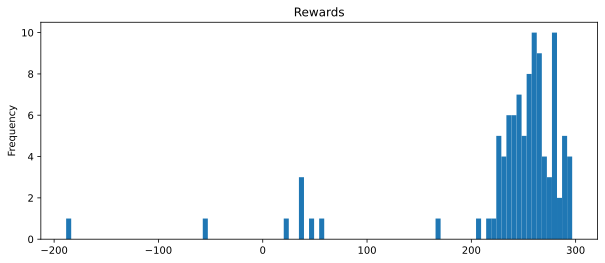

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

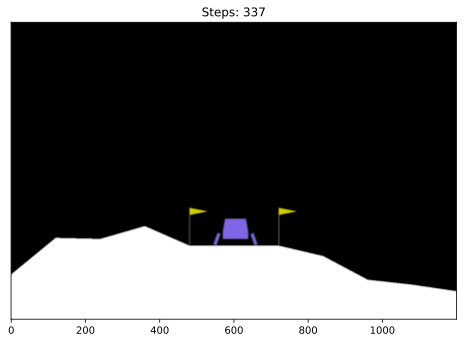

In [94]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)